# Deep Hedging for nonlinear generalized affine processes.

# Example: Butterfly Payoff

Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import style
style.use('ggplot')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from mpl_toolkits.mplot3d import Axes3D
from Functions import*
from matplotlib import rcParams

Execute if it should be run on a GPU

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 

Test it in a purely nonlinear setting:

$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^\gamma dW_t
$$

for 

\begin{align}
a_0 &\in [0.3,0.7] \\
a_1 &\in [0.4,0.6] \\
b_0 &\in [-0.2,0.2] \\
b_1 &\in [-0.1,0.1] \\
\gamma &\in [0.5,1.5]
\end{align}

Define Payoff of a Butterfly option
$$
(S_{t_n}-8)^++(S_{t_n}-12)^+-2\cdot(S_{t_n}-10)^+
$$

In [3]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
a_0 = [0.3,0.7]
a_1 = [0.4,0.6]
b_0 = [-0.2,0.2]
b_1 = [-0.1,0.1]
gamma = [0.5,1.5]
x_0 = 10.
def derivative(path):
    return tf.nn.relu(path[-1]-(x_0+2))+tf.nn.relu(path[-1]-(x_0-2))-2*tf.nn.relu(path[-1]-x_0)

price, hedge = optimal_hedge(derivative,a_0,a_1,b_0,b_1,gamma,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 10000,l_r = 0.005,BATCH_SIZE =256)

  0%|          | 11/10000 [00:06<1:41:45,  1.64it/s]

Iteration:10, Price of Hedge: 0.738514244556427, Loss: 0.4534083604812622


  0%|          | 21/10000 [00:13<1:51:19,  1.49it/s]

Iteration:20, Price of Hedge: 0.7322592735290527, Loss: 0.4273020625114441


  0%|          | 31/10000 [00:19<1:43:35,  1.60it/s]

Iteration:30, Price of Hedge: 0.7319786548614502, Loss: 0.40980324149131775


  0%|          | 41/10000 [00:26<1:53:13,  1.47it/s]

Iteration:40, Price of Hedge: 0.7315195798873901, Loss: 0.44287919998168945


  1%|          | 51/10000 [00:33<1:48:53,  1.52it/s]

Iteration:50, Price of Hedge: 0.7323291301727295, Loss: 0.40587419271469116


  1%|          | 61/10000 [00:39<1:49:58,  1.51it/s]

Iteration:60, Price of Hedge: 0.7363684177398682, Loss: 0.4111029803752899


  1%|          | 71/10000 [00:46<1:45:17,  1.57it/s]

Iteration:70, Price of Hedge: 0.7415235638618469, Loss: 0.4015812873840332


  1%|          | 81/10000 [00:52<1:56:50,  1.41it/s]

Iteration:80, Price of Hedge: 0.7450592517852783, Loss: 0.36593660712242126


  1%|          | 91/10000 [01:00<1:59:43,  1.38it/s]

Iteration:90, Price of Hedge: 0.744053065776825, Loss: 0.3663172125816345


  1%|          | 101/10000 [01:07<1:45:22,  1.57it/s]

Iteration:100, Price of Hedge: 0.7477918267250061, Loss: 0.41643303632736206


  1%|          | 111/10000 [01:13<1:44:22,  1.58it/s]

Iteration:110, Price of Hedge: 0.7463348507881165, Loss: 0.4941514730453491


  1%|          | 121/10000 [01:19<1:45:12,  1.56it/s]

Iteration:120, Price of Hedge: 0.7502138018608093, Loss: 0.43446084856987


  1%|▏         | 131/10000 [01:26<1:45:03,  1.57it/s]

Iteration:130, Price of Hedge: 0.7524021863937378, Loss: 0.39591771364212036


  1%|▏         | 141/10000 [01:32<1:47:26,  1.53it/s]

Iteration:140, Price of Hedge: 0.7488358616828918, Loss: 0.3201330006122589


  2%|▏         | 151/10000 [01:39<1:47:00,  1.53it/s]

Iteration:150, Price of Hedge: 0.7421355843544006, Loss: 0.2899205684661865


  2%|▏         | 161/10000 [01:45<1:42:16,  1.60it/s]

Iteration:160, Price of Hedge: 0.7405216693878174, Loss: 0.34659627079963684


  2%|▏         | 171/10000 [01:52<1:48:25,  1.51it/s]

Iteration:170, Price of Hedge: 0.7430997490882874, Loss: 0.32753726840019226


  2%|▏         | 181/10000 [01:58<1:44:01,  1.57it/s]

Iteration:180, Price of Hedge: 0.7480635643005371, Loss: 0.3377942740917206


  2%|▏         | 191/10000 [02:04<1:46:03,  1.54it/s]

Iteration:190, Price of Hedge: 0.7493624091148376, Loss: 0.262228786945343


  2%|▏         | 201/10000 [02:11<1:42:28,  1.59it/s]

Iteration:200, Price of Hedge: 0.751244306564331, Loss: 0.28063470125198364


  2%|▏         | 211/10000 [02:17<1:42:46,  1.59it/s]

Iteration:210, Price of Hedge: 0.7527720332145691, Loss: 0.2738931477069855


  2%|▏         | 221/10000 [02:24<1:48:11,  1.51it/s]

Iteration:220, Price of Hedge: 0.7518545389175415, Loss: 0.30352380871772766


  2%|▏         | 231/10000 [02:31<2:02:11,  1.33it/s]

Iteration:230, Price of Hedge: 0.7413517832756042, Loss: 0.2205694168806076


  2%|▏         | 241/10000 [02:38<1:58:12,  1.38it/s]

Iteration:240, Price of Hedge: 0.7400177121162415, Loss: 0.227457195520401


  3%|▎         | 251/10000 [02:45<1:46:19,  1.53it/s]

Iteration:250, Price of Hedge: 0.7386646866798401, Loss: 0.27151206135749817


  3%|▎         | 261/10000 [02:52<1:47:20,  1.51it/s]

Iteration:260, Price of Hedge: 0.7413668632507324, Loss: 0.2526901364326477


  3%|▎         | 271/10000 [02:59<1:46:37,  1.52it/s]

Iteration:270, Price of Hedge: 0.7484150528907776, Loss: 0.2179950475692749


  3%|▎         | 281/10000 [03:05<1:43:15,  1.57it/s]

Iteration:280, Price of Hedge: 0.7539188861846924, Loss: 0.2188829928636551


  3%|▎         | 291/10000 [03:11<1:42:47,  1.57it/s]

Iteration:290, Price of Hedge: 0.7490994334220886, Loss: 0.3031699061393738


  3%|▎         | 301/10000 [03:17<1:41:27,  1.59it/s]

Iteration:300, Price of Hedge: 0.7413771152496338, Loss: 0.22750961780548096


  3%|▎         | 311/10000 [03:24<1:42:12,  1.58it/s]

Iteration:310, Price of Hedge: 0.7371091842651367, Loss: 0.2039722204208374


  3%|▎         | 321/10000 [03:30<1:41:54,  1.58it/s]

Iteration:320, Price of Hedge: 0.7470645308494568, Loss: 0.18873588740825653


  3%|▎         | 331/10000 [03:37<1:42:53,  1.57it/s]

Iteration:330, Price of Hedge: 0.750531017780304, Loss: 0.20595669746398926


  3%|▎         | 341/10000 [03:43<1:43:42,  1.55it/s]

Iteration:340, Price of Hedge: 0.7530680894851685, Loss: 0.17986702919006348


  4%|▎         | 351/10000 [03:49<1:45:15,  1.53it/s]

Iteration:350, Price of Hedge: 0.7565377950668335, Loss: 0.17957176268100739


  4%|▎         | 361/10000 [03:56<1:45:35,  1.52it/s]

Iteration:360, Price of Hedge: 0.7517250180244446, Loss: 0.18262824416160583


  4%|▎         | 371/10000 [04:02<1:41:30,  1.58it/s]

Iteration:370, Price of Hedge: 0.7477871179580688, Loss: 0.23587241768836975


  4%|▍         | 381/10000 [04:09<1:52:32,  1.42it/s]

Iteration:380, Price of Hedge: 0.7451296448707581, Loss: 0.15367496013641357


  4%|▍         | 391/10000 [04:16<1:48:05,  1.48it/s]

Iteration:390, Price of Hedge: 0.7476468086242676, Loss: 0.15542787313461304


  4%|▍         | 401/10000 [04:23<1:43:34,  1.54it/s]

Iteration:400, Price of Hedge: 0.7503494620323181, Loss: 0.23240754008293152


  4%|▍         | 411/10000 [04:29<1:47:55,  1.48it/s]

Iteration:410, Price of Hedge: 0.748550295829773, Loss: 0.1724540889263153


  4%|▍         | 421/10000 [04:36<1:50:41,  1.44it/s]

Iteration:420, Price of Hedge: 0.7486057877540588, Loss: 0.28224143385887146


  4%|▍         | 431/10000 [04:43<1:47:30,  1.48it/s]

Iteration:430, Price of Hedge: 0.7475631237030029, Loss: 0.17275774478912354


  4%|▍         | 441/10000 [04:49<1:41:42,  1.57it/s]

Iteration:440, Price of Hedge: 0.7464805841445923, Loss: 0.2170821875333786


  5%|▍         | 451/10000 [04:56<1:40:12,  1.59it/s]

Iteration:450, Price of Hedge: 0.747999370098114, Loss: 0.1954830288887024


  5%|▍         | 461/10000 [05:03<1:49:45,  1.45it/s]

Iteration:460, Price of Hedge: 0.7502885460853577, Loss: 0.1537497639656067


  5%|▍         | 471/10000 [05:09<1:40:59,  1.57it/s]

Iteration:470, Price of Hedge: 0.7527492642402649, Loss: 0.1824665665626526


  5%|▍         | 481/10000 [05:16<1:38:49,  1.61it/s]

Iteration:480, Price of Hedge: 0.7503715753555298, Loss: 0.1526404768228531


  5%|▍         | 491/10000 [05:22<1:40:02,  1.58it/s]

Iteration:490, Price of Hedge: 0.7417280077934265, Loss: 0.163813978433609


  5%|▌         | 501/10000 [05:29<1:50:11,  1.44it/s]

Iteration:500, Price of Hedge: 0.749413251876831, Loss: 0.14395299553871155


  5%|▌         | 511/10000 [05:36<1:43:00,  1.54it/s]

Iteration:510, Price of Hedge: 0.7513903379440308, Loss: 0.15338774025440216


  5%|▌         | 521/10000 [05:42<1:41:37,  1.55it/s]

Iteration:520, Price of Hedge: 0.7523117065429688, Loss: 0.1817070096731186


  5%|▌         | 531/10000 [05:49<1:39:12,  1.59it/s]

Iteration:530, Price of Hedge: 0.7504101991653442, Loss: 0.16567251086235046


  5%|▌         | 541/10000 [05:55<1:46:22,  1.48it/s]

Iteration:540, Price of Hedge: 0.7556451559066772, Loss: 0.16151893138885498


  6%|▌         | 551/10000 [06:03<1:45:31,  1.49it/s]

Iteration:550, Price of Hedge: 0.7601134181022644, Loss: 0.14959493279457092


  6%|▌         | 561/10000 [06:10<1:45:28,  1.49it/s]

Iteration:560, Price of Hedge: 0.759182333946228, Loss: 0.15834510326385498


  6%|▌         | 571/10000 [06:16<1:46:33,  1.47it/s]

Iteration:570, Price of Hedge: 0.7462989091873169, Loss: 0.1731000393629074


  6%|▌         | 581/10000 [06:24<1:54:28,  1.37it/s]

Iteration:580, Price of Hedge: 0.7405462861061096, Loss: 0.17650142312049866


  6%|▌         | 591/10000 [06:30<1:38:29,  1.59it/s]

Iteration:590, Price of Hedge: 0.7418157458305359, Loss: 0.1779220700263977


  6%|▌         | 601/10000 [06:37<2:01:51,  1.29it/s]

Iteration:600, Price of Hedge: 0.7478538751602173, Loss: 0.20123833417892456


  6%|▌         | 611/10000 [06:46<2:20:34,  1.11it/s]

Iteration:610, Price of Hedge: 0.7463656663894653, Loss: 0.1791781783103943


  6%|▌         | 621/10000 [06:55<2:21:35,  1.10it/s]

Iteration:620, Price of Hedge: 0.7535507678985596, Loss: 0.15599581599235535


  6%|▋         | 631/10000 [07:04<2:18:16,  1.13it/s]

Iteration:630, Price of Hedge: 0.7549176812171936, Loss: 0.15784363448619843


  6%|▋         | 641/10000 [07:12<2:22:25,  1.10it/s]

Iteration:640, Price of Hedge: 0.7515244483947754, Loss: 0.1602194756269455


  7%|▋         | 651/10000 [07:21<2:14:57,  1.15it/s]

Iteration:650, Price of Hedge: 0.7528191804885864, Loss: 0.18043184280395508


  7%|▋         | 661/10000 [07:30<2:22:09,  1.09it/s]

Iteration:660, Price of Hedge: 0.7551882863044739, Loss: 0.18426349759101868


  7%|▋         | 671/10000 [07:39<2:14:40,  1.15it/s]

Iteration:670, Price of Hedge: 0.747038722038269, Loss: 0.1581445038318634


  7%|▋         | 681/10000 [07:46<1:48:45,  1.43it/s]

Iteration:680, Price of Hedge: 0.7430537939071655, Loss: 0.1389436572790146


  7%|▋         | 691/10000 [07:54<2:11:10,  1.18it/s]

Iteration:690, Price of Hedge: 0.7497735023498535, Loss: 0.18503616750240326


  7%|▋         | 701/10000 [08:01<1:46:40,  1.45it/s]

Iteration:700, Price of Hedge: 0.7533477544784546, Loss: 0.17579033970832825


  7%|▋         | 711/10000 [08:08<1:44:03,  1.49it/s]

Iteration:710, Price of Hedge: 0.7484062314033508, Loss: 0.15614423155784607


  7%|▋         | 721/10000 [08:15<1:53:06,  1.37it/s]

Iteration:720, Price of Hedge: 0.7494275569915771, Loss: 0.22282472252845764


  7%|▋         | 731/10000 [08:21<1:37:18,  1.59it/s]

Iteration:730, Price of Hedge: 0.7521107196807861, Loss: 0.17876192927360535


  7%|▋         | 741/10000 [08:28<1:37:23,  1.58it/s]

Iteration:740, Price of Hedge: 0.7518957853317261, Loss: 0.1546616405248642


  8%|▊         | 751/10000 [08:34<1:38:17,  1.57it/s]

Iteration:750, Price of Hedge: 0.7475273013114929, Loss: 0.14231425523757935


  8%|▊         | 761/10000 [08:40<1:35:00,  1.62it/s]

Iteration:760, Price of Hedge: 0.7405658960342407, Loss: 0.16917532682418823


  8%|▊         | 771/10000 [08:47<1:38:04,  1.57it/s]

Iteration:770, Price of Hedge: 0.7397916913032532, Loss: 0.14853745698928833


  8%|▊         | 781/10000 [08:53<1:33:35,  1.64it/s]

Iteration:780, Price of Hedge: 0.7524452209472656, Loss: 0.1697777509689331


  8%|▊         | 791/10000 [08:59<1:35:42,  1.60it/s]

Iteration:790, Price of Hedge: 0.7502747178077698, Loss: 0.16511356830596924


  8%|▊         | 801/10000 [09:05<1:37:03,  1.58it/s]

Iteration:800, Price of Hedge: 0.7472401857376099, Loss: 0.15194310247898102


  8%|▊         | 811/10000 [09:11<1:34:20,  1.62it/s]

Iteration:810, Price of Hedge: 0.7564440369606018, Loss: 0.15914574265480042


  8%|▊         | 821/10000 [09:18<1:36:49,  1.58it/s]

Iteration:820, Price of Hedge: 0.7578722238540649, Loss: 0.15461337566375732


  8%|▊         | 831/10000 [09:24<1:34:24,  1.62it/s]

Iteration:830, Price of Hedge: 0.7506210803985596, Loss: 0.14953473210334778


  8%|▊         | 841/10000 [09:30<1:38:24,  1.55it/s]

Iteration:840, Price of Hedge: 0.7436930537223816, Loss: 0.159624844789505


  9%|▊         | 851/10000 [09:37<1:41:27,  1.50it/s]

Iteration:850, Price of Hedge: 0.7436782717704773, Loss: 0.17471955716609955


  9%|▊         | 861/10000 [09:44<1:40:13,  1.52it/s]

Iteration:860, Price of Hedge: 0.7476457357406616, Loss: 0.14464767277240753


  9%|▊         | 871/10000 [09:50<1:41:09,  1.50it/s]

Iteration:870, Price of Hedge: 0.7521097660064697, Loss: 0.15074995160102844


  9%|▉         | 881/10000 [09:57<1:45:12,  1.44it/s]

Iteration:880, Price of Hedge: 0.7525748610496521, Loss: 0.1656259298324585


  9%|▉         | 891/10000 [10:03<1:36:38,  1.57it/s]

Iteration:890, Price of Hedge: 0.7479435205459595, Loss: 0.14199286699295044


  9%|▉         | 901/10000 [10:10<1:39:28,  1.52it/s]

Iteration:900, Price of Hedge: 0.7538945078849792, Loss: 0.13673275709152222


  9%|▉         | 911/10000 [10:16<1:35:47,  1.58it/s]

Iteration:910, Price of Hedge: 0.7555897235870361, Loss: 0.18481746315956116


  9%|▉         | 921/10000 [10:23<1:36:18,  1.57it/s]

Iteration:920, Price of Hedge: 0.7484390735626221, Loss: 0.21719783544540405


  9%|▉         | 931/10000 [10:29<1:33:41,  1.61it/s]

Iteration:930, Price of Hedge: 0.7500977516174316, Loss: 0.19785045087337494


  9%|▉         | 941/10000 [10:35<1:36:30,  1.56it/s]

Iteration:940, Price of Hedge: 0.7466446161270142, Loss: 0.17563670873641968


 10%|▉         | 951/10000 [10:42<1:46:53,  1.41it/s]

Iteration:950, Price of Hedge: 0.7405998110771179, Loss: 0.17881375551223755


 10%|▉         | 961/10000 [10:49<1:37:40,  1.54it/s]

Iteration:960, Price of Hedge: 0.7452402710914612, Loss: 0.15856018662452698


 10%|▉         | 971/10000 [10:55<1:36:30,  1.56it/s]

Iteration:970, Price of Hedge: 0.7453461289405823, Loss: 0.17533615231513977


 10%|▉         | 981/10000 [11:02<1:36:28,  1.56it/s]

Iteration:980, Price of Hedge: 0.7467809319496155, Loss: 0.21981418132781982


 10%|▉         | 991/10000 [11:08<1:35:18,  1.58it/s]

Iteration:990, Price of Hedge: 0.7508889436721802, Loss: 0.2065676748752594


 10%|█         | 1001/10000 [11:15<1:38:49,  1.52it/s]

Iteration:1000, Price of Hedge: 0.7419531941413879, Loss: 0.12931543588638306


 10%|█         | 1011/10000 [11:21<1:36:36,  1.55it/s]

Iteration:1010, Price of Hedge: 0.7452832460403442, Loss: 0.16871386766433716


 10%|█         | 1021/10000 [11:28<1:34:16,  1.59it/s]

Iteration:1020, Price of Hedge: 0.7464558482170105, Loss: 0.14255937933921814


 10%|█         | 1031/10000 [11:34<1:36:30,  1.55it/s]

Iteration:1030, Price of Hedge: 0.7484756112098694, Loss: 0.13019543886184692


 10%|█         | 1041/10000 [11:40<1:34:01,  1.59it/s]

Iteration:1040, Price of Hedge: 0.7557658553123474, Loss: 0.17137204110622406


 11%|█         | 1051/10000 [11:47<1:34:55,  1.57it/s]

Iteration:1050, Price of Hedge: 0.7502567172050476, Loss: 0.15908321738243103


 11%|█         | 1061/10000 [11:53<1:36:03,  1.55it/s]

Iteration:1060, Price of Hedge: 0.7492836713790894, Loss: 0.17239625751972198


 11%|█         | 1071/10000 [12:00<1:35:01,  1.57it/s]

Iteration:1070, Price of Hedge: 0.7404190301895142, Loss: 0.16946223378181458


 11%|█         | 1081/10000 [12:06<1:33:57,  1.58it/s]

Iteration:1080, Price of Hedge: 0.7416045665740967, Loss: 0.17248189449310303


 11%|█         | 1091/10000 [12:12<1:33:06,  1.59it/s]

Iteration:1090, Price of Hedge: 0.7523030638694763, Loss: 0.18173226714134216


 11%|█         | 1101/10000 [12:18<1:33:56,  1.58it/s]

Iteration:1100, Price of Hedge: 0.7538458704948425, Loss: 0.1693134605884552


 11%|█         | 1111/10000 [12:25<1:33:21,  1.59it/s]

Iteration:1110, Price of Hedge: 0.7491596937179565, Loss: 0.1471555382013321


 11%|█         | 1121/10000 [12:31<1:36:51,  1.53it/s]

Iteration:1120, Price of Hedge: 0.7411971688270569, Loss: 0.1822108030319214


 11%|█▏        | 1131/10000 [12:38<1:36:48,  1.53it/s]

Iteration:1130, Price of Hedge: 0.7407895922660828, Loss: 0.13210327923297882


 11%|█▏        | 1141/10000 [12:45<1:39:50,  1.48it/s]

Iteration:1140, Price of Hedge: 0.7550827264785767, Loss: 0.12689390778541565


 12%|█▏        | 1151/10000 [12:51<1:32:33,  1.59it/s]

Iteration:1150, Price of Hedge: 0.7628132700920105, Loss: 0.15356993675231934


 12%|█▏        | 1161/10000 [12:57<1:35:44,  1.54it/s]

Iteration:1160, Price of Hedge: 0.7529648542404175, Loss: 0.1462981104850769


 12%|█▏        | 1171/10000 [13:04<1:45:24,  1.40it/s]

Iteration:1170, Price of Hedge: 0.748189389705658, Loss: 0.13522867858409882


 12%|█▏        | 1181/10000 [13:11<1:41:17,  1.45it/s]

Iteration:1180, Price of Hedge: 0.7511423826217651, Loss: 0.1217331811785698


 12%|█▏        | 1191/10000 [13:18<1:36:40,  1.52it/s]

Iteration:1190, Price of Hedge: 0.7503644824028015, Loss: 0.11496168375015259


 12%|█▏        | 1201/10000 [13:24<1:32:49,  1.58it/s]

Iteration:1200, Price of Hedge: 0.7483578324317932, Loss: 0.18052615225315094


 12%|█▏        | 1211/10000 [13:31<1:39:24,  1.47it/s]

Iteration:1210, Price of Hedge: 0.7490333914756775, Loss: 0.14005310833454132


 12%|█▏        | 1221/10000 [13:38<1:55:40,  1.26it/s]

Iteration:1220, Price of Hedge: 0.7548185586929321, Loss: 0.13092732429504395


 12%|█▏        | 1231/10000 [13:47<2:03:21,  1.18it/s]

Iteration:1230, Price of Hedge: 0.7441223859786987, Loss: 0.12453775852918625


 12%|█▏        | 1241/10000 [13:55<2:12:05,  1.11it/s]

Iteration:1240, Price of Hedge: 0.7542237043380737, Loss: 0.16875869035720825


 13%|█▎        | 1251/10000 [14:05<2:14:12,  1.09it/s]

Iteration:1250, Price of Hedge: 0.7648468017578125, Loss: 0.13108381628990173


 13%|█▎        | 1261/10000 [14:14<2:14:33,  1.08it/s]

Iteration:1260, Price of Hedge: 0.7601500749588013, Loss: 0.18291813135147095


 13%|█▎        | 1271/10000 [14:23<2:11:08,  1.11it/s]

Iteration:1270, Price of Hedge: 0.749757707118988, Loss: 0.14480680227279663


 13%|█▎        | 1281/10000 [14:32<2:15:03,  1.08it/s]

Iteration:1280, Price of Hedge: 0.749060332775116, Loss: 0.12038777768611908


 13%|█▎        | 1291/10000 [14:41<2:14:50,  1.08it/s]

Iteration:1290, Price of Hedge: 0.7516729235649109, Loss: 0.1017414927482605


 13%|█▎        | 1301/10000 [14:50<2:01:56,  1.19it/s]

Iteration:1300, Price of Hedge: 0.7508203387260437, Loss: 0.09732542932033539


 13%|█▎        | 1311/10000 [14:58<2:01:31,  1.19it/s]

Iteration:1310, Price of Hedge: 0.7536545395851135, Loss: 0.08907056599855423


 13%|█▎        | 1321/10000 [15:07<2:00:22,  1.20it/s]

Iteration:1320, Price of Hedge: 0.7577357888221741, Loss: 0.11285712569952011


 13%|█▎        | 1331/10000 [15:15<1:59:44,  1.21it/s]

Iteration:1330, Price of Hedge: 0.754332423210144, Loss: 0.10349835455417633


 13%|█▎        | 1341/10000 [15:23<2:00:54,  1.19it/s]

Iteration:1340, Price of Hedge: 0.7507076263427734, Loss: 0.08673298358917236


 14%|█▎        | 1351/10000 [15:32<2:02:13,  1.18it/s]

Iteration:1350, Price of Hedge: 0.7445533275604248, Loss: 0.10211797058582306


 14%|█▎        | 1361/10000 [15:40<2:01:47,  1.18it/s]

Iteration:1360, Price of Hedge: 0.7459972500801086, Loss: 0.11936208605766296


 14%|█▎        | 1371/10000 [15:49<2:01:00,  1.19it/s]

Iteration:1370, Price of Hedge: 0.7477242946624756, Loss: 0.10920648276805878


 14%|█▍        | 1381/10000 [15:58<2:06:14,  1.14it/s]

Iteration:1380, Price of Hedge: 0.7524015307426453, Loss: 0.10706251859664917


 14%|█▍        | 1391/10000 [16:06<1:59:42,  1.20it/s]

Iteration:1390, Price of Hedge: 0.7568111419677734, Loss: 0.11928047239780426


 14%|█▍        | 1401/10000 [16:15<2:12:04,  1.09it/s]

Iteration:1400, Price of Hedge: 0.7575238943099976, Loss: 0.08950033783912659


 14%|█▍        | 1411/10000 [16:24<2:14:18,  1.07it/s]

Iteration:1410, Price of Hedge: 0.7556923031806946, Loss: 0.12363950908184052


 14%|█▍        | 1421/10000 [16:34<2:20:54,  1.01it/s]

Iteration:1420, Price of Hedge: 0.758432924747467, Loss: 0.1468815803527832


 14%|█▍        | 1431/10000 [16:44<2:24:50,  1.01s/it]

Iteration:1430, Price of Hedge: 0.7513770461082458, Loss: 0.0950053408741951


 14%|█▍        | 1441/10000 [16:53<2:10:11,  1.10it/s]

Iteration:1440, Price of Hedge: 0.7512211799621582, Loss: 0.09623731672763824


 15%|█▍        | 1451/10000 [17:03<2:15:04,  1.05it/s]

Iteration:1450, Price of Hedge: 0.7514015436172485, Loss: 0.07841135561466217


 15%|█▍        | 1461/10000 [17:12<2:08:54,  1.10it/s]

Iteration:1460, Price of Hedge: 0.7530167698860168, Loss: 0.12844735383987427


 15%|█▍        | 1471/10000 [17:21<2:10:58,  1.09it/s]

Iteration:1470, Price of Hedge: 0.7500616312026978, Loss: 0.1574452519416809


 15%|█▍        | 1481/10000 [17:30<2:06:39,  1.12it/s]

Iteration:1480, Price of Hedge: 0.7485807538032532, Loss: 0.09930107742547989


 15%|█▍        | 1491/10000 [17:39<2:02:30,  1.16it/s]

Iteration:1490, Price of Hedge: 0.7432436347007751, Loss: 0.12743037939071655


 15%|█▌        | 1501/10000 [17:47<1:55:18,  1.23it/s]

Iteration:1500, Price of Hedge: 0.7462793588638306, Loss: 0.08342346549034119


 15%|█▌        | 1511/10000 [17:56<2:05:47,  1.12it/s]

Iteration:1510, Price of Hedge: 0.7443772554397583, Loss: 0.13975858688354492


 15%|█▌        | 1521/10000 [18:04<1:59:34,  1.18it/s]

Iteration:1520, Price of Hedge: 0.7457681894302368, Loss: 0.1094629168510437


 15%|█▌        | 1531/10000 [18:13<1:57:08,  1.20it/s]

Iteration:1530, Price of Hedge: 0.7524093389511108, Loss: 0.12429874390363693


 15%|█▌        | 1541/10000 [18:21<2:00:27,  1.17it/s]

Iteration:1540, Price of Hedge: 0.7525264620780945, Loss: 0.11497894674539566


 16%|█▌        | 1551/10000 [18:29<1:58:05,  1.19it/s]

Iteration:1550, Price of Hedge: 0.7539737820625305, Loss: 0.10058215260505676


 16%|█▌        | 1561/10000 [18:39<2:39:20,  1.13s/it]

Iteration:1560, Price of Hedge: 0.7531996369361877, Loss: 0.09260163456201553


 16%|█▌        | 1571/10000 [18:49<2:04:05,  1.13it/s]

Iteration:1570, Price of Hedge: 0.7418811917304993, Loss: 0.10224045068025589


 16%|█▌        | 1581/10000 [18:58<2:00:27,  1.16it/s]

Iteration:1580, Price of Hedge: 0.7425728440284729, Loss: 0.09628994762897491


 16%|█▌        | 1591/10000 [19:06<1:56:20,  1.20it/s]

Iteration:1590, Price of Hedge: 0.7488344311714172, Loss: 0.09927333891391754


 16%|█▌        | 1601/10000 [19:15<1:59:17,  1.17it/s]

Iteration:1600, Price of Hedge: 0.756951093673706, Loss: 0.09379933774471283


 16%|█▌        | 1611/10000 [19:23<1:56:48,  1.20it/s]

Iteration:1610, Price of Hedge: 0.7537785768508911, Loss: 0.10149896144866943


 16%|█▌        | 1621/10000 [19:31<1:58:14,  1.18it/s]

Iteration:1620, Price of Hedge: 0.7477107048034668, Loss: 0.08327886462211609


 16%|█▋        | 1631/10000 [19:40<1:57:23,  1.19it/s]

Iteration:1630, Price of Hedge: 0.7480440735816956, Loss: 0.10754251480102539


 16%|█▋        | 1641/10000 [19:48<1:59:06,  1.17it/s]

Iteration:1640, Price of Hedge: 0.7493448853492737, Loss: 0.08003945648670197


 17%|█▋        | 1651/10000 [19:57<2:04:25,  1.12it/s]

Iteration:1650, Price of Hedge: 0.7475793361663818, Loss: 0.09121836721897125


 17%|█▋        | 1661/10000 [20:06<1:56:42,  1.19it/s]

Iteration:1660, Price of Hedge: 0.7461358308792114, Loss: 0.12620775401592255


 17%|█▋        | 1671/10000 [20:14<1:57:00,  1.19it/s]

Iteration:1670, Price of Hedge: 0.7519847750663757, Loss: 0.08636793494224548


 17%|█▋        | 1681/10000 [20:22<1:56:32,  1.19it/s]

Iteration:1680, Price of Hedge: 0.7538678050041199, Loss: 0.09260242432355881


 17%|█▋        | 1691/10000 [20:31<1:55:45,  1.20it/s]

Iteration:1690, Price of Hedge: 0.745952844619751, Loss: 0.12176382541656494


 17%|█▋        | 1701/10000 [20:40<2:01:41,  1.14it/s]

Iteration:1700, Price of Hedge: 0.7459781765937805, Loss: 0.08585900813341141


 17%|█▋        | 1711/10000 [20:49<2:03:04,  1.12it/s]

Iteration:1710, Price of Hedge: 0.7484909296035767, Loss: 0.09114347398281097


 17%|█▋        | 1721/10000 [20:58<2:06:46,  1.09it/s]

Iteration:1720, Price of Hedge: 0.7476006746292114, Loss: 0.08477713167667389


 17%|█▋        | 1731/10000 [21:07<2:01:53,  1.13it/s]

Iteration:1730, Price of Hedge: 0.7434924840927124, Loss: 0.13818290829658508


 17%|█▋        | 1741/10000 [21:16<2:04:59,  1.10it/s]

Iteration:1740, Price of Hedge: 0.7431354522705078, Loss: 0.0848780944943428


 18%|█▊        | 1751/10000 [21:25<2:02:18,  1.12it/s]

Iteration:1750, Price of Hedge: 0.7517160773277283, Loss: 0.09823694825172424


 18%|█▊        | 1761/10000 [21:34<2:05:43,  1.09it/s]

Iteration:1760, Price of Hedge: 0.7533969283103943, Loss: 0.09406758844852448


 18%|█▊        | 1771/10000 [21:43<2:02:04,  1.12it/s]

Iteration:1770, Price of Hedge: 0.753507673740387, Loss: 0.10226880013942719


 18%|█▊        | 1781/10000 [21:52<2:05:18,  1.09it/s]

Iteration:1780, Price of Hedge: 0.7469475865364075, Loss: 0.08866226673126221


 18%|█▊        | 1791/10000 [22:02<2:08:05,  1.07it/s]

Iteration:1790, Price of Hedge: 0.7450295090675354, Loss: 0.08448467403650284


 18%|█▊        | 1801/10000 [22:11<2:02:20,  1.12it/s]

Iteration:1800, Price of Hedge: 0.7411708235740662, Loss: 0.07291650772094727


 18%|█▊        | 1811/10000 [22:20<1:55:28,  1.18it/s]

Iteration:1810, Price of Hedge: 0.7424925565719604, Loss: 0.0938001424074173


 18%|█▊        | 1821/10000 [22:28<2:00:22,  1.13it/s]

Iteration:1820, Price of Hedge: 0.7502153515815735, Loss: 0.10933838784694672


 18%|█▊        | 1831/10000 [22:37<2:03:14,  1.10it/s]

Iteration:1830, Price of Hedge: 0.7497708201408386, Loss: 0.09885214269161224


 18%|█▊        | 1841/10000 [22:46<1:56:57,  1.16it/s]

Iteration:1840, Price of Hedge: 0.754787027835846, Loss: 0.10047966241836548


 19%|█▊        | 1851/10000 [22:55<1:57:52,  1.15it/s]

Iteration:1850, Price of Hedge: 0.751160740852356, Loss: 0.11155731976032257


 19%|█▊        | 1861/10000 [23:03<1:54:53,  1.18it/s]

Iteration:1860, Price of Hedge: 0.7468432188034058, Loss: 0.1405123770236969


 19%|█▊        | 1871/10000 [23:12<1:54:16,  1.19it/s]

Iteration:1870, Price of Hedge: 0.745178759098053, Loss: 0.11203662306070328


 19%|█▉        | 1881/10000 [23:20<1:51:55,  1.21it/s]

Iteration:1880, Price of Hedge: 0.7497361898422241, Loss: 0.08005247265100479


 19%|█▉        | 1891/10000 [23:28<1:52:39,  1.20it/s]

Iteration:1890, Price of Hedge: 0.75680011510849, Loss: 0.13954506814479828


 19%|█▉        | 1901/10000 [23:37<1:53:47,  1.19it/s]

Iteration:1900, Price of Hedge: 0.7546108961105347, Loss: 0.11506928503513336


 19%|█▉        | 1911/10000 [23:45<1:53:09,  1.19it/s]

Iteration:1910, Price of Hedge: 0.7497186660766602, Loss: 0.10414139926433563


 19%|█▉        | 1921/10000 [23:54<2:18:03,  1.03s/it]

Iteration:1920, Price of Hedge: 0.7423461675643921, Loss: 0.08666323125362396


 19%|█▉        | 1931/10000 [24:05<2:16:43,  1.02s/it]

Iteration:1930, Price of Hedge: 0.7510884404182434, Loss: 0.10566680878400803


 19%|█▉        | 1941/10000 [24:15<2:15:27,  1.01s/it]

Iteration:1940, Price of Hedge: 0.7515839338302612, Loss: 0.10645779222249985


 20%|█▉        | 1951/10000 [24:25<2:13:06,  1.01it/s]

Iteration:1950, Price of Hedge: 0.7416362762451172, Loss: 0.1618650257587433


 20%|█▉        | 1961/10000 [24:35<2:15:09,  1.01s/it]

Iteration:1960, Price of Hedge: 0.7483071684837341, Loss: 0.09830163419246674


 20%|█▉        | 1971/10000 [24:46<2:32:45,  1.14s/it]

Iteration:1970, Price of Hedge: 0.7399440407752991, Loss: 0.09748359024524689


 20%|█▉        | 1981/10000 [24:56<2:15:03,  1.01s/it]

Iteration:1980, Price of Hedge: 0.7504043579101562, Loss: 0.10081987082958221


 20%|█▉        | 1991/10000 [25:06<2:11:47,  1.01it/s]

Iteration:1990, Price of Hedge: 0.7463752627372742, Loss: 0.07368741184473038


 20%|██        | 2001/10000 [25:16<2:09:30,  1.03it/s]

Iteration:2000, Price of Hedge: 0.7501646876335144, Loss: 0.11233651638031006


 20%|██        | 2011/10000 [25:25<2:07:27,  1.04it/s]

Iteration:2010, Price of Hedge: 0.7530842423439026, Loss: 0.11565923690795898


 20%|██        | 2021/10000 [25:35<2:11:56,  1.01it/s]

Iteration:2020, Price of Hedge: 0.7568607330322266, Loss: 0.10652263462543488


 20%|██        | 2031/10000 [25:45<2:07:20,  1.04it/s]

Iteration:2030, Price of Hedge: 0.7526275515556335, Loss: 0.1324079930782318


 20%|██        | 2041/10000 [25:55<2:08:13,  1.03it/s]

Iteration:2040, Price of Hedge: 0.738183856010437, Loss: 0.0893281027674675


 21%|██        | 2051/10000 [26:05<2:12:38,  1.00s/it]

Iteration:2050, Price of Hedge: 0.7461764812469482, Loss: 0.11054132878780365


 21%|██        | 2061/10000 [26:14<2:06:51,  1.04it/s]

Iteration:2060, Price of Hedge: 0.7484074831008911, Loss: 0.10114675760269165


 21%|██        | 2071/10000 [26:24<2:07:36,  1.04it/s]

Iteration:2070, Price of Hedge: 0.753269612789154, Loss: 0.12060698866844177


 21%|██        | 2081/10000 [26:34<2:05:36,  1.05it/s]

Iteration:2080, Price of Hedge: 0.7603204846382141, Loss: 0.09023228287696838


 21%|██        | 2091/10000 [26:45<2:21:04,  1.07s/it]

Iteration:2090, Price of Hedge: 0.7555539011955261, Loss: 0.12727077305316925


 21%|██        | 2101/10000 [26:54<1:57:18,  1.12it/s]

Iteration:2100, Price of Hedge: 0.7517294883728027, Loss: 0.10981620848178864


 21%|██        | 2111/10000 [27:02<1:50:25,  1.19it/s]

Iteration:2110, Price of Hedge: 0.7468205094337463, Loss: 0.0814070850610733


 21%|██        | 2121/10000 [27:11<1:53:24,  1.16it/s]

Iteration:2120, Price of Hedge: 0.7431255578994751, Loss: 0.09598924964666367


 21%|██▏       | 2131/10000 [27:19<1:50:52,  1.18it/s]

Iteration:2130, Price of Hedge: 0.7503056526184082, Loss: 0.13641057908535004


 21%|██▏       | 2141/10000 [27:28<1:58:37,  1.10it/s]

Iteration:2140, Price of Hedge: 0.754104495048523, Loss: 0.08976522833108902


 22%|██▏       | 2151/10000 [27:38<2:00:05,  1.09it/s]

Iteration:2150, Price of Hedge: 0.759852945804596, Loss: 0.12287569046020508


 22%|██▏       | 2161/10000 [27:47<2:02:59,  1.06it/s]

Iteration:2160, Price of Hedge: 0.7593254446983337, Loss: 0.09597668796777725


 22%|██▏       | 2171/10000 [27:58<2:16:47,  1.05s/it]

Iteration:2170, Price of Hedge: 0.7479344606399536, Loss: 0.0784517154097557


 22%|██▏       | 2181/10000 [28:07<2:04:16,  1.05it/s]

Iteration:2180, Price of Hedge: 0.7421452403068542, Loss: 0.08265852928161621


 22%|██▏       | 2191/10000 [28:16<2:00:05,  1.08it/s]

Iteration:2190, Price of Hedge: 0.7437313199043274, Loss: 0.1210097074508667


 22%|██▏       | 2201/10000 [28:26<2:11:02,  1.01s/it]

Iteration:2200, Price of Hedge: 0.7587341666221619, Loss: 0.08876903355121613


 22%|██▏       | 2211/10000 [28:37<2:15:04,  1.04s/it]

Iteration:2210, Price of Hedge: 0.7461720705032349, Loss: 0.09486742317676544


 22%|██▏       | 2221/10000 [28:47<2:11:09,  1.01s/it]

Iteration:2220, Price of Hedge: 0.7448404431343079, Loss: 0.06309263408184052


 22%|██▏       | 2231/10000 [28:56<1:55:48,  1.12it/s]

Iteration:2230, Price of Hedge: 0.7570316791534424, Loss: 0.08087724447250366


 22%|██▏       | 2241/10000 [29:05<2:02:44,  1.05it/s]

Iteration:2240, Price of Hedge: 0.7558018565177917, Loss: 0.07212956249713898


 23%|██▎       | 2251/10000 [29:15<2:10:40,  1.01s/it]

Iteration:2250, Price of Hedge: 0.7499289512634277, Loss: 0.08186878263950348


 23%|██▎       | 2261/10000 [29:26<2:12:46,  1.03s/it]

Iteration:2260, Price of Hedge: 0.742347002029419, Loss: 0.07381868362426758


 23%|██▎       | 2271/10000 [29:36<2:05:34,  1.03it/s]

Iteration:2270, Price of Hedge: 0.7435101270675659, Loss: 0.09614932537078857


 23%|██▎       | 2281/10000 [29:45<1:58:14,  1.09it/s]

Iteration:2280, Price of Hedge: 0.7506972551345825, Loss: 0.07470624893903732


 23%|██▎       | 2291/10000 [29:54<1:49:16,  1.18it/s]

Iteration:2290, Price of Hedge: 0.7405372858047485, Loss: 0.16184589266777039


 23%|██▎       | 2301/10000 [30:03<1:59:07,  1.08it/s]

Iteration:2300, Price of Hedge: 0.738902747631073, Loss: 0.10662974417209625


 23%|██▎       | 2311/10000 [30:12<1:59:13,  1.07it/s]

Iteration:2310, Price of Hedge: 0.743463397026062, Loss: 0.09176117926836014


 23%|██▎       | 2321/10000 [30:22<2:05:23,  1.02it/s]

Iteration:2320, Price of Hedge: 0.7591918706893921, Loss: 0.09058042615652084


 23%|██▎       | 2331/10000 [30:31<1:58:27,  1.08it/s]

Iteration:2330, Price of Hedge: 0.7596904039382935, Loss: 0.08142793923616409


 23%|██▎       | 2341/10000 [30:41<2:03:42,  1.03it/s]

Iteration:2340, Price of Hedge: 0.7484434843063354, Loss: 0.10112975537776947


 24%|██▎       | 2351/10000 [30:50<2:05:59,  1.01it/s]

Iteration:2350, Price of Hedge: 0.737812340259552, Loss: 0.09950307011604309


 24%|██▎       | 2361/10000 [30:59<1:55:01,  1.11it/s]

Iteration:2360, Price of Hedge: 0.7363312244415283, Loss: 0.08620063215494156


 24%|██▎       | 2371/10000 [31:08<1:48:58,  1.17it/s]

Iteration:2370, Price of Hedge: 0.7484831213951111, Loss: 0.11865857243537903


 24%|██▍       | 2381/10000 [31:16<1:48:42,  1.17it/s]

Iteration:2380, Price of Hedge: 0.7575473189353943, Loss: 0.10981304198503494


 24%|██▍       | 2391/10000 [31:25<1:58:07,  1.07it/s]

Iteration:2390, Price of Hedge: 0.7558067440986633, Loss: 0.08025319874286652


 24%|██▍       | 2401/10000 [31:34<1:56:32,  1.09it/s]

Iteration:2400, Price of Hedge: 0.74515700340271, Loss: 0.09817880392074585


 24%|██▍       | 2411/10000 [31:43<1:50:50,  1.14it/s]

Iteration:2410, Price of Hedge: 0.7474355697631836, Loss: 0.0991985946893692


 24%|██▍       | 2421/10000 [31:52<1:54:10,  1.11it/s]

Iteration:2420, Price of Hedge: 0.7530776262283325, Loss: 0.13552135229110718


 24%|██▍       | 2431/10000 [32:02<1:58:50,  1.06it/s]

Iteration:2430, Price of Hedge: 0.7510092258453369, Loss: 0.09575068950653076


 24%|██▍       | 2441/10000 [32:11<1:49:56,  1.15it/s]

Iteration:2440, Price of Hedge: 0.7467724680900574, Loss: 0.0808764100074768


 25%|██▍       | 2451/10000 [32:20<1:53:01,  1.11it/s]

Iteration:2450, Price of Hedge: 0.7381455898284912, Loss: 0.10294996947050095


 25%|██▍       | 2461/10000 [32:29<1:56:05,  1.08it/s]

Iteration:2460, Price of Hedge: 0.743395209312439, Loss: 0.136420339345932


 25%|██▍       | 2471/10000 [32:38<1:55:57,  1.08it/s]

Iteration:2470, Price of Hedge: 0.7565637230873108, Loss: 0.1239645704627037


 25%|██▍       | 2481/10000 [32:47<2:04:36,  1.01it/s]

Iteration:2480, Price of Hedge: 0.75899338722229, Loss: 0.10163279622793198


 25%|██▍       | 2491/10000 [32:57<2:02:25,  1.02it/s]

Iteration:2490, Price of Hedge: 0.7464882731437683, Loss: 0.0946585088968277


 25%|██▌       | 2501/10000 [33:08<2:10:03,  1.04s/it]

Iteration:2500, Price of Hedge: 0.745865523815155, Loss: 0.06374195963144302


 25%|██▌       | 2511/10000 [33:18<2:09:05,  1.03s/it]

Iteration:2510, Price of Hedge: 0.7586586475372314, Loss: 0.07854324579238892


 25%|██▌       | 2521/10000 [33:28<2:00:50,  1.03it/s]

Iteration:2520, Price of Hedge: 0.7475615739822388, Loss: 0.1543600857257843


 25%|██▌       | 2531/10000 [33:38<1:57:10,  1.06it/s]

Iteration:2530, Price of Hedge: 0.7485032081604004, Loss: 0.12598702311515808


 25%|██▌       | 2541/10000 [33:48<2:13:50,  1.08s/it]

Iteration:2540, Price of Hedge: 0.742538332939148, Loss: 0.11321286112070084


 26%|██▌       | 2551/10000 [33:57<1:49:15,  1.14it/s]

Iteration:2550, Price of Hedge: 0.7474370002746582, Loss: 0.10604946315288544


 26%|██▌       | 2561/10000 [34:07<2:01:54,  1.02it/s]

Iteration:2560, Price of Hedge: 0.749470055103302, Loss: 0.10294367372989655


 26%|██▌       | 2571/10000 [34:16<1:54:29,  1.08it/s]

Iteration:2570, Price of Hedge: 0.7450045943260193, Loss: 0.10041250288486481


 26%|██▌       | 2581/10000 [34:25<1:54:56,  1.08it/s]

Iteration:2580, Price of Hedge: 0.7317508459091187, Loss: 0.10096335411071777


 26%|██▌       | 2591/10000 [34:34<1:54:21,  1.08it/s]

Iteration:2590, Price of Hedge: 0.7372255921363831, Loss: 0.08491099625825882


 26%|██▌       | 2601/10000 [34:45<2:10:03,  1.05s/it]

Iteration:2600, Price of Hedge: 0.7606446146965027, Loss: 0.09269900619983673


 26%|██▌       | 2611/10000 [34:55<2:00:52,  1.02it/s]

Iteration:2610, Price of Hedge: 0.7503385543823242, Loss: 0.10537460446357727


 26%|██▌       | 2621/10000 [35:05<2:04:23,  1.01s/it]

Iteration:2620, Price of Hedge: 0.7351331114768982, Loss: 0.11700847744941711


 26%|██▋       | 2631/10000 [35:16<2:08:55,  1.05s/it]

Iteration:2630, Price of Hedge: 0.7472224235534668, Loss: 0.09630536288022995


 26%|██▋       | 2641/10000 [35:25<1:58:39,  1.03it/s]

Iteration:2640, Price of Hedge: 0.7588045597076416, Loss: 0.09478790313005447


 27%|██▋       | 2651/10000 [35:34<1:51:22,  1.10it/s]

Iteration:2650, Price of Hedge: 0.7527428865432739, Loss: 0.11411042511463165


 27%|██▋       | 2661/10000 [35:43<1:57:01,  1.05it/s]

Iteration:2660, Price of Hedge: 0.7490279078483582, Loss: 0.08876468241214752


 27%|██▋       | 2671/10000 [35:54<2:04:11,  1.02s/it]

Iteration:2670, Price of Hedge: 0.7477365136146545, Loss: 0.08163105696439743


 27%|██▋       | 2681/10000 [36:03<2:01:24,  1.00it/s]

Iteration:2680, Price of Hedge: 0.7449759244918823, Loss: 0.12304732203483582


 27%|██▋       | 2691/10000 [36:13<1:49:58,  1.11it/s]

Iteration:2690, Price of Hedge: 0.7504161596298218, Loss: 0.108371801674366


 27%|██▋       | 2701/10000 [36:22<1:54:18,  1.06it/s]

Iteration:2700, Price of Hedge: 0.7526131868362427, Loss: 0.08821956068277359


 27%|██▋       | 2711/10000 [36:31<1:55:33,  1.05it/s]

Iteration:2710, Price of Hedge: 0.7414491176605225, Loss: 0.11776190996170044


 27%|██▋       | 2721/10000 [36:41<2:02:56,  1.01s/it]

Iteration:2720, Price of Hedge: 0.7381120920181274, Loss: 0.08408858627080917


 27%|██▋       | 2731/10000 [36:51<1:59:14,  1.02it/s]

Iteration:2730, Price of Hedge: 0.7362967729568481, Loss: 0.07240734994411469


 27%|██▋       | 2741/10000 [37:01<1:52:52,  1.07it/s]

Iteration:2740, Price of Hedge: 0.7394402623176575, Loss: 0.09716930240392685


 28%|██▊       | 2751/10000 [37:10<1:50:58,  1.09it/s]

Iteration:2750, Price of Hedge: 0.745593249797821, Loss: 0.10875174403190613


 28%|██▊       | 2761/10000 [37:19<1:53:44,  1.06it/s]

Iteration:2760, Price of Hedge: 0.7511176466941833, Loss: 0.11184022575616837


 28%|██▊       | 2771/10000 [37:29<1:52:38,  1.07it/s]

Iteration:2770, Price of Hedge: 0.7548372745513916, Loss: 0.07981409132480621


 28%|██▊       | 2781/10000 [37:37<1:43:21,  1.16it/s]

Iteration:2780, Price of Hedge: 0.7575411200523376, Loss: 0.08167465031147003


 28%|██▊       | 2791/10000 [37:46<1:44:37,  1.15it/s]

Iteration:2790, Price of Hedge: 0.7522777915000916, Loss: 0.10605638474225998


 28%|██▊       | 2801/10000 [37:54<1:43:06,  1.16it/s]

Iteration:2800, Price of Hedge: 0.7523576617240906, Loss: 0.11382077634334564


 28%|██▊       | 2811/10000 [38:03<1:45:06,  1.14it/s]

Iteration:2810, Price of Hedge: 0.7517570853233337, Loss: 0.10187769681215286


 28%|██▊       | 2821/10000 [38:12<1:49:32,  1.09it/s]

Iteration:2820, Price of Hedge: 0.749434769153595, Loss: 0.08429812639951706


 28%|██▊       | 2831/10000 [38:22<1:51:51,  1.07it/s]

Iteration:2830, Price of Hedge: 0.7455655336380005, Loss: 0.09934613853693008


 28%|██▊       | 2841/10000 [38:31<1:49:03,  1.09it/s]

Iteration:2840, Price of Hedge: 0.7580781579017639, Loss: 0.0894487202167511


 29%|██▊       | 2851/10000 [38:41<2:09:13,  1.08s/it]

Iteration:2850, Price of Hedge: 0.752426028251648, Loss: 0.09354943037033081


 29%|██▊       | 2861/10000 [38:52<2:11:28,  1.10s/it]

Iteration:2860, Price of Hedge: 0.737170934677124, Loss: 0.07963422685861588


 29%|██▊       | 2871/10000 [39:02<2:03:20,  1.04s/it]

Iteration:2870, Price of Hedge: 0.7456470131874084, Loss: 0.12926827371120453


 29%|██▉       | 2881/10000 [39:12<1:44:09,  1.14it/s]

Iteration:2880, Price of Hedge: 0.7441880702972412, Loss: 0.10520948469638824


 29%|██▉       | 2891/10000 [39:20<1:39:04,  1.20it/s]

Iteration:2890, Price of Hedge: 0.7415844202041626, Loss: 0.11146672070026398


 29%|██▉       | 2901/10000 [39:29<1:39:54,  1.18it/s]

Iteration:2900, Price of Hedge: 0.7406390905380249, Loss: 0.09290015697479248


 29%|██▉       | 2911/10000 [39:37<1:39:03,  1.19it/s]

Iteration:2910, Price of Hedge: 0.7447466254234314, Loss: 0.08310277760028839


 29%|██▉       | 2921/10000 [39:46<1:38:38,  1.20it/s]

Iteration:2920, Price of Hedge: 0.7595977783203125, Loss: 0.07290341705083847


 29%|██▉       | 2931/10000 [39:54<1:41:15,  1.16it/s]

Iteration:2930, Price of Hedge: 0.758014440536499, Loss: 0.10785215348005295


 29%|██▉       | 2941/10000 [40:03<1:45:47,  1.11it/s]

Iteration:2940, Price of Hedge: 0.7346353530883789, Loss: 0.09494491666555405


 30%|██▉       | 2951/10000 [40:12<1:51:23,  1.05it/s]

Iteration:2950, Price of Hedge: 0.7419828772544861, Loss: 0.09074322879314423


 30%|██▉       | 2961/10000 [40:21<1:44:11,  1.13it/s]

Iteration:2960, Price of Hedge: 0.7548129558563232, Loss: 0.08020465075969696


 30%|██▉       | 2971/10000 [40:32<2:15:13,  1.15s/it]

Iteration:2970, Price of Hedge: 0.758358359336853, Loss: 0.11701790988445282


 30%|██▉       | 2981/10000 [40:42<1:58:01,  1.01s/it]

Iteration:2980, Price of Hedge: 0.7457818984985352, Loss: 0.08915817737579346


 30%|██▉       | 2991/10000 [40:53<2:12:15,  1.13s/it]

Iteration:2990, Price of Hedge: 0.7377256751060486, Loss: 0.10957235097885132


 30%|███       | 3001/10000 [41:04<2:11:39,  1.13s/it]

Iteration:3000, Price of Hedge: 0.7463247179985046, Loss: 0.10604556649923325


 30%|███       | 3011/10000 [41:15<2:02:50,  1.05s/it]

Iteration:3010, Price of Hedge: 0.7461642622947693, Loss: 0.08350347727537155


 30%|███       | 3021/10000 [41:24<1:45:29,  1.10it/s]

Iteration:3020, Price of Hedge: 0.746565580368042, Loss: 0.10217149555683136


 30%|███       | 3031/10000 [41:33<1:46:54,  1.09it/s]

Iteration:3030, Price of Hedge: 0.746940553188324, Loss: 0.103446364402771


 30%|███       | 3041/10000 [41:43<1:52:49,  1.03it/s]

Iteration:3040, Price of Hedge: 0.7521559596061707, Loss: 0.11326960474252701


 31%|███       | 3051/10000 [41:52<1:46:35,  1.09it/s]

Iteration:3050, Price of Hedge: 0.740647554397583, Loss: 0.11827629804611206


 31%|███       | 3061/10000 [42:01<1:43:10,  1.12it/s]

Iteration:3060, Price of Hedge: 0.7373351454734802, Loss: 0.0906580239534378


 31%|███       | 3071/10000 [42:10<1:35:58,  1.20it/s]

Iteration:3070, Price of Hedge: 0.7440301179885864, Loss: 0.09607313573360443


 31%|███       | 3081/10000 [42:18<1:36:35,  1.19it/s]

Iteration:3080, Price of Hedge: 0.7583456635475159, Loss: 0.09274207055568695


 31%|███       | 3091/10000 [42:26<1:37:31,  1.18it/s]

Iteration:3090, Price of Hedge: 0.754884660243988, Loss: 0.09240025281906128


 31%|███       | 3101/10000 [42:35<1:46:23,  1.08it/s]

Iteration:3100, Price of Hedge: 0.7560997009277344, Loss: 0.08350302278995514


 31%|███       | 3111/10000 [42:44<1:42:49,  1.12it/s]

Iteration:3110, Price of Hedge: 0.7576063275337219, Loss: 0.10564783960580826


 31%|███       | 3121/10000 [42:53<1:43:39,  1.11it/s]

Iteration:3120, Price of Hedge: 0.746690034866333, Loss: 0.09106133878231049


 31%|███▏      | 3131/10000 [43:02<1:37:13,  1.18it/s]

Iteration:3130, Price of Hedge: 0.7366269826889038, Loss: 0.07741738855838776


 31%|███▏      | 3141/10000 [43:10<1:38:26,  1.16it/s]

Iteration:3140, Price of Hedge: 0.7671294808387756, Loss: 0.08494376391172409


 32%|███▏      | 3151/10000 [43:19<1:40:51,  1.13it/s]

Iteration:3150, Price of Hedge: 0.765025794506073, Loss: 0.09881560504436493


 32%|███▏      | 3161/10000 [43:28<1:45:51,  1.08it/s]

Iteration:3160, Price of Hedge: 0.7641947865486145, Loss: 0.09285501390695572


 32%|███▏      | 3171/10000 [43:37<1:44:14,  1.09it/s]

Iteration:3170, Price of Hedge: 0.750659704208374, Loss: 0.10238036513328552


 32%|███▏      | 3181/10000 [43:48<2:00:27,  1.06s/it]

Iteration:3180, Price of Hedge: 0.7512335777282715, Loss: 0.1211053729057312


 32%|███▏      | 3191/10000 [43:57<1:41:40,  1.12it/s]

Iteration:3190, Price of Hedge: 0.7474958896636963, Loss: 0.07195153087377548


 32%|███▏      | 3201/10000 [44:06<1:41:39,  1.11it/s]

Iteration:3200, Price of Hedge: 0.7462353110313416, Loss: 0.11023993790149689


 32%|███▏      | 3211/10000 [44:14<1:35:08,  1.19it/s]

Iteration:3210, Price of Hedge: 0.7464150190353394, Loss: 0.08786545693874359


 32%|███▏      | 3221/10000 [44:22<1:33:59,  1.20it/s]

Iteration:3220, Price of Hedge: 0.7551759481430054, Loss: 0.07586677372455597


 32%|███▏      | 3231/10000 [44:31<1:35:48,  1.18it/s]

Iteration:3230, Price of Hedge: 0.7537343502044678, Loss: 0.07552716135978699


 32%|███▏      | 3241/10000 [44:39<1:34:54,  1.19it/s]

Iteration:3240, Price of Hedge: 0.7352702021598816, Loss: 0.08941592276096344


 33%|███▎      | 3251/10000 [44:50<1:53:26,  1.01s/it]

Iteration:3250, Price of Hedge: 0.745521605014801, Loss: 0.10202145576477051


 33%|███▎      | 3261/10000 [44:59<1:38:59,  1.13it/s]

Iteration:3260, Price of Hedge: 0.7526254653930664, Loss: 0.10284269601106644


 33%|███▎      | 3271/10000 [45:08<1:40:52,  1.11it/s]

Iteration:3270, Price of Hedge: 0.7488492131233215, Loss: 0.07966522127389908


 33%|███▎      | 3281/10000 [45:17<1:47:34,  1.04it/s]

Iteration:3280, Price of Hedge: 0.7570652365684509, Loss: 0.11670172214508057


 33%|███▎      | 3291/10000 [45:26<1:39:24,  1.12it/s]

Iteration:3290, Price of Hedge: 0.7685784101486206, Loss: 0.10564538836479187


 33%|███▎      | 3301/10000 [45:35<1:41:47,  1.10it/s]

Iteration:3300, Price of Hedge: 0.750137448310852, Loss: 0.10824860632419586


 33%|███▎      | 3311/10000 [45:44<1:40:04,  1.11it/s]

Iteration:3310, Price of Hedge: 0.742987334728241, Loss: 0.09130997210741043


 33%|███▎      | 3321/10000 [45:53<1:48:54,  1.02it/s]

Iteration:3320, Price of Hedge: 0.7482529878616333, Loss: 0.11735796928405762


 33%|███▎      | 3331/10000 [46:03<1:42:06,  1.09it/s]

Iteration:3330, Price of Hedge: 0.7480044364929199, Loss: 0.09811729937791824


 33%|███▎      | 3341/10000 [46:12<1:38:44,  1.12it/s]

Iteration:3340, Price of Hedge: 0.7515566349029541, Loss: 0.1208508312702179


 34%|███▎      | 3351/10000 [46:21<1:33:07,  1.19it/s]

Iteration:3350, Price of Hedge: 0.7437138557434082, Loss: 0.13653191924095154


 34%|███▎      | 3361/10000 [46:29<1:33:49,  1.18it/s]

Iteration:3360, Price of Hedge: 0.7494710683822632, Loss: 0.10772642493247986


 34%|███▎      | 3371/10000 [46:38<1:44:30,  1.06it/s]

Iteration:3370, Price of Hedge: 0.7498073577880859, Loss: 0.09268731623888016


 34%|███▍      | 3381/10000 [46:47<1:40:50,  1.09it/s]

Iteration:3380, Price of Hedge: 0.7479137182235718, Loss: 0.0847141295671463


 34%|███▍      | 3391/10000 [46:56<1:33:24,  1.18it/s]

Iteration:3390, Price of Hedge: 0.7444231510162354, Loss: 0.07446907460689545


 34%|███▍      | 3401/10000 [47:04<1:36:26,  1.14it/s]

Iteration:3400, Price of Hedge: 0.7504177093505859, Loss: 0.08830961585044861


 34%|███▍      | 3411/10000 [47:13<1:34:34,  1.16it/s]

Iteration:3410, Price of Hedge: 0.7570453882217407, Loss: 0.08334171772003174


 34%|███▍      | 3421/10000 [47:22<1:33:50,  1.17it/s]

Iteration:3420, Price of Hedge: 0.7483618855476379, Loss: 0.08004414290189743


 34%|███▍      | 3431/10000 [47:31<1:38:01,  1.12it/s]

Iteration:3430, Price of Hedge: 0.748541533946991, Loss: 0.10011722147464752


 34%|███▍      | 3441/10000 [47:40<1:39:05,  1.10it/s]

Iteration:3440, Price of Hedge: 0.7485300898551941, Loss: 0.10513068735599518


 35%|███▍      | 3451/10000 [47:49<1:33:11,  1.17it/s]

Iteration:3450, Price of Hedge: 0.7549363374710083, Loss: 0.09595877677202225


 35%|███▍      | 3461/10000 [47:57<1:40:40,  1.08it/s]

Iteration:3460, Price of Hedge: 0.7466545104980469, Loss: 0.09520497918128967


 35%|███▍      | 3471/10000 [48:07<1:41:27,  1.07it/s]

Iteration:3470, Price of Hedge: 0.7450323104858398, Loss: 0.09589265286922455


 35%|███▍      | 3481/10000 [48:16<1:36:41,  1.12it/s]

Iteration:3480, Price of Hedge: 0.7511147260665894, Loss: 0.06535793840885162


 35%|███▍      | 3491/10000 [48:25<1:40:15,  1.08it/s]

Iteration:3490, Price of Hedge: 0.7595131397247314, Loss: 0.10455547273159027


 35%|███▌      | 3501/10000 [48:34<1:37:40,  1.11it/s]

Iteration:3500, Price of Hedge: 0.7455374002456665, Loss: 0.128619983792305


 35%|███▌      | 3511/10000 [48:43<1:37:10,  1.11it/s]

Iteration:3510, Price of Hedge: 0.7460468411445618, Loss: 0.09731454402208328


 35%|███▌      | 3521/10000 [48:53<1:48:05,  1.00s/it]

Iteration:3520, Price of Hedge: 0.7551350593566895, Loss: 0.08202804625034332


 35%|███▌      | 3531/10000 [49:02<1:34:09,  1.15it/s]

Iteration:3530, Price of Hedge: 0.7503998279571533, Loss: 0.08732849359512329


 35%|███▌      | 3541/10000 [49:10<1:32:43,  1.16it/s]

Iteration:3540, Price of Hedge: 0.7517387866973877, Loss: 0.10215334594249725


 36%|███▌      | 3551/10000 [49:19<1:32:09,  1.17it/s]

Iteration:3550, Price of Hedge: 0.7568398118019104, Loss: 0.07940587401390076


 36%|███▌      | 3561/10000 [49:28<1:41:56,  1.05it/s]

Iteration:3560, Price of Hedge: 0.7584097981452942, Loss: 0.05361033231019974


 36%|███▌      | 3571/10000 [49:38<1:37:19,  1.10it/s]

Iteration:3570, Price of Hedge: 0.7503924369812012, Loss: 0.08403966575860977


 36%|███▌      | 3581/10000 [49:47<1:39:41,  1.07it/s]

Iteration:3580, Price of Hedge: 0.744475781917572, Loss: 0.08321668207645416


 36%|███▌      | 3591/10000 [49:56<1:35:44,  1.12it/s]

Iteration:3590, Price of Hedge: 0.7508193850517273, Loss: 0.08908454328775406


 36%|███▌      | 3601/10000 [50:05<1:40:04,  1.07it/s]

Iteration:3600, Price of Hedge: 0.7592119574546814, Loss: 0.11120012402534485


 36%|███▌      | 3611/10000 [50:14<1:29:55,  1.18it/s]

Iteration:3610, Price of Hedge: 0.7563319206237793, Loss: 0.085466668009758


 36%|███▌      | 3621/10000 [50:23<1:31:07,  1.17it/s]

Iteration:3620, Price of Hedge: 0.7471194863319397, Loss: 0.08442297577857971


 36%|███▋      | 3631/10000 [50:31<1:28:10,  1.20it/s]

Iteration:3630, Price of Hedge: 0.7500369548797607, Loss: 0.0874793604016304


 36%|███▋      | 3641/10000 [50:40<1:37:29,  1.09it/s]

Iteration:3640, Price of Hedge: 0.7523929476737976, Loss: 0.08818100392818451


 37%|███▋      | 3651/10000 [50:49<1:35:15,  1.11it/s]

Iteration:3650, Price of Hedge: 0.7443487644195557, Loss: 0.08961361646652222


 37%|███▋      | 3661/10000 [50:58<1:31:21,  1.16it/s]

Iteration:3660, Price of Hedge: 0.7493682503700256, Loss: 0.08923262357711792


 37%|███▋      | 3671/10000 [51:07<1:37:41,  1.08it/s]

Iteration:3670, Price of Hedge: 0.7528674602508545, Loss: 0.09922078251838684


 37%|███▋      | 3681/10000 [51:16<1:34:46,  1.11it/s]

Iteration:3680, Price of Hedge: 0.7383111119270325, Loss: 0.1129470020532608


 37%|███▋      | 3691/10000 [51:25<1:38:29,  1.07it/s]

Iteration:3690, Price of Hedge: 0.751470685005188, Loss: 0.10522565245628357


 37%|███▋      | 3701/10000 [51:34<1:33:04,  1.13it/s]

Iteration:3700, Price of Hedge: 0.7562790513038635, Loss: 0.09141535311937332


 37%|███▋      | 3711/10000 [51:44<1:37:20,  1.08it/s]

Iteration:3710, Price of Hedge: 0.7518697381019592, Loss: 0.1067475825548172


 37%|███▋      | 3721/10000 [51:52<1:30:21,  1.16it/s]

Iteration:3720, Price of Hedge: 0.7490426301956177, Loss: 0.12494999915361404


 37%|███▋      | 3731/10000 [52:02<1:44:43,  1.00s/it]

Iteration:3730, Price of Hedge: 0.7475976347923279, Loss: 0.08359521627426147


 37%|███▋      | 3741/10000 [52:13<1:47:49,  1.03s/it]

Iteration:3740, Price of Hedge: 0.7493813633918762, Loss: 0.10378915816545486


 38%|███▊      | 3751/10000 [52:22<1:39:04,  1.05it/s]

Iteration:3750, Price of Hedge: 0.7535365223884583, Loss: 0.12891626358032227


 38%|███▊      | 3761/10000 [52:32<1:41:33,  1.02it/s]

Iteration:3760, Price of Hedge: 0.7564156651496887, Loss: 0.1063917949795723


 38%|███▊      | 3771/10000 [52:41<1:32:24,  1.12it/s]

Iteration:3770, Price of Hedge: 0.7442388534545898, Loss: 0.0940340906381607


 38%|███▊      | 3781/10000 [52:52<1:50:35,  1.07s/it]

Iteration:3780, Price of Hedge: 0.7427750825881958, Loss: 0.09581131488084793


 38%|███▊      | 3791/10000 [53:02<1:39:00,  1.05it/s]

Iteration:3790, Price of Hedge: 0.7404976487159729, Loss: 0.09201250225305557


 38%|███▊      | 3801/10000 [53:11<1:32:19,  1.12it/s]

Iteration:3800, Price of Hedge: 0.7556934356689453, Loss: 0.0908626914024353


 38%|███▊      | 3811/10000 [53:20<1:37:23,  1.06it/s]

Iteration:3810, Price of Hedge: 0.75235915184021, Loss: 0.0926915779709816


 38%|███▊      | 3821/10000 [53:30<1:35:01,  1.08it/s]

Iteration:3820, Price of Hedge: 0.7475447654724121, Loss: 0.07997073978185654


 38%|███▊      | 3831/10000 [53:39<1:39:26,  1.03it/s]

Iteration:3830, Price of Hedge: 0.749360978603363, Loss: 0.09690351784229279


 38%|███▊      | 3841/10000 [53:49<1:48:04,  1.05s/it]

Iteration:3840, Price of Hedge: 0.7458121180534363, Loss: 0.11026827991008759


 39%|███▊      | 3851/10000 [53:59<1:40:05,  1.02it/s]

Iteration:3850, Price of Hedge: 0.7458323240280151, Loss: 0.09306852519512177


 39%|███▊      | 3861/10000 [54:09<1:43:08,  1.01s/it]

Iteration:3860, Price of Hedge: 0.7498847842216492, Loss: 0.10404264181852341


 39%|███▊      | 3871/10000 [54:19<1:38:46,  1.03it/s]

Iteration:3870, Price of Hedge: 0.7380427122116089, Loss: 0.0939934253692627


 39%|███▉      | 3881/10000 [54:29<1:41:20,  1.01it/s]

Iteration:3880, Price of Hedge: 0.7413721084594727, Loss: 0.08977854251861572


 39%|███▉      | 3891/10000 [54:38<1:35:52,  1.06it/s]

Iteration:3890, Price of Hedge: 0.754252552986145, Loss: 0.09381769597530365


 39%|███▉      | 3901/10000 [54:48<1:42:09,  1.01s/it]

Iteration:3900, Price of Hedge: 0.7623901963233948, Loss: 0.09298667311668396


 39%|███▉      | 3911/10000 [54:58<1:41:14,  1.00it/s]

Iteration:3910, Price of Hedge: 0.7433068752288818, Loss: 0.07436151057481766


 39%|███▉      | 3921/10000 [55:07<1:31:14,  1.11it/s]

Iteration:3920, Price of Hedge: 0.7445154190063477, Loss: 0.09374938905239105


 39%|███▉      | 3931/10000 [55:16<1:30:26,  1.12it/s]

Iteration:3930, Price of Hedge: 0.7543026208877563, Loss: 0.08800064027309418


 39%|███▉      | 3941/10000 [55:26<1:35:08,  1.06it/s]

Iteration:3940, Price of Hedge: 0.7517334818840027, Loss: 0.11041998863220215


 40%|███▉      | 3951/10000 [55:35<1:30:46,  1.11it/s]

Iteration:3950, Price of Hedge: 0.744601845741272, Loss: 0.11229925602674484


 40%|███▉      | 3961/10000 [55:44<1:33:02,  1.08it/s]

Iteration:3960, Price of Hedge: 0.7495964765548706, Loss: 0.07418064773082733


 40%|███▉      | 3971/10000 [55:53<1:32:04,  1.09it/s]

Iteration:3970, Price of Hedge: 0.7488983273506165, Loss: 0.09238871186971664


 40%|███▉      | 3981/10000 [56:03<1:49:38,  1.09s/it]

Iteration:3980, Price of Hedge: 0.7509034276008606, Loss: 0.10044731199741364


 40%|███▉      | 3991/10000 [56:13<1:37:04,  1.03it/s]

Iteration:3990, Price of Hedge: 0.7478906512260437, Loss: 0.12666422128677368


 40%|████      | 4001/10000 [56:23<1:32:58,  1.08it/s]

Iteration:4000, Price of Hedge: 0.7518132925033569, Loss: 0.09103915095329285


 40%|████      | 4011/10000 [56:32<1:39:12,  1.01it/s]

Iteration:4010, Price of Hedge: 0.7522748112678528, Loss: 0.09638804942369461


 40%|████      | 4021/10000 [56:42<1:36:28,  1.03it/s]

Iteration:4020, Price of Hedge: 0.7374867796897888, Loss: 0.10909949243068695


 40%|████      | 4031/10000 [56:53<1:40:15,  1.01s/it]

Iteration:4030, Price of Hedge: 0.7529368996620178, Loss: 0.0782296359539032


 40%|████      | 4041/10000 [57:03<1:38:09,  1.01it/s]

Iteration:4040, Price of Hedge: 0.7613314986228943, Loss: 0.09061741828918457


 41%|████      | 4051/10000 [57:11<1:24:39,  1.17it/s]

Iteration:4050, Price of Hedge: 0.7559462189674377, Loss: 0.0895586758852005


 41%|████      | 4061/10000 [57:20<1:23:45,  1.18it/s]

Iteration:4060, Price of Hedge: 0.7443630695343018, Loss: 0.09052138030529022


 41%|████      | 4071/10000 [57:28<1:23:25,  1.18it/s]

Iteration:4070, Price of Hedge: 0.7577433586120605, Loss: 0.12030991911888123


 41%|████      | 4081/10000 [57:37<1:24:09,  1.17it/s]

Iteration:4080, Price of Hedge: 0.7614158987998962, Loss: 0.08705490827560425


 41%|████      | 4091/10000 [57:45<1:22:41,  1.19it/s]

Iteration:4090, Price of Hedge: 0.7454290390014648, Loss: 0.14361420273780823


 41%|████      | 4101/10000 [57:54<1:28:32,  1.11it/s]

Iteration:4100, Price of Hedge: 0.7528154850006104, Loss: 0.11989171802997589


 41%|████      | 4111/10000 [58:04<1:43:10,  1.05s/it]

Iteration:4110, Price of Hedge: 0.7562731504440308, Loss: 0.11432895064353943


 41%|████      | 4121/10000 [58:14<1:36:46,  1.01it/s]

Iteration:4120, Price of Hedge: 0.750105619430542, Loss: 0.09448782354593277


 41%|████▏     | 4131/10000 [58:23<1:25:00,  1.15it/s]

Iteration:4130, Price of Hedge: 0.7535312175750732, Loss: 0.07661433517932892


 41%|████▏     | 4141/10000 [58:31<1:23:22,  1.17it/s]

Iteration:4140, Price of Hedge: 0.7459745407104492, Loss: 0.07649818807840347


 42%|████▏     | 4151/10000 [58:40<1:32:14,  1.06it/s]

Iteration:4150, Price of Hedge: 0.743062436580658, Loss: 0.08870644867420197


 42%|████▏     | 4161/10000 [58:50<1:36:42,  1.01it/s]

Iteration:4160, Price of Hedge: 0.7534210681915283, Loss: 0.08154619485139847


 42%|████▏     | 4171/10000 [59:00<1:29:59,  1.08it/s]

Iteration:4170, Price of Hedge: 0.7524687647819519, Loss: 0.10676369071006775


 42%|████▏     | 4181/10000 [59:10<1:32:48,  1.05it/s]

Iteration:4180, Price of Hedge: 0.7496138215065002, Loss: 0.09935148060321808


 42%|████▏     | 4191/10000 [59:18<1:24:04,  1.15it/s]

Iteration:4190, Price of Hedge: 0.7537245750427246, Loss: 0.09380494058132172


 42%|████▏     | 4201/10000 [59:27<1:24:11,  1.15it/s]

Iteration:4200, Price of Hedge: 0.7504100203514099, Loss: 0.13665008544921875


 42%|████▏     | 4211/10000 [59:36<1:21:16,  1.19it/s]

Iteration:4210, Price of Hedge: 0.738917887210846, Loss: 0.10221586376428604


 42%|████▏     | 4221/10000 [59:44<1:23:38,  1.15it/s]

Iteration:4220, Price of Hedge: 0.7365002632141113, Loss: 0.07914425432682037


 42%|████▏     | 4231/10000 [59:53<1:22:09,  1.17it/s]

Iteration:4230, Price of Hedge: 0.7460729479789734, Loss: 0.11242789030075073


 42%|████▏     | 4241/10000 [1:00:02<1:33:42,  1.02it/s]

Iteration:4240, Price of Hedge: 0.7469547390937805, Loss: 0.10014282912015915


 43%|████▎     | 4251/10000 [1:00:12<1:32:06,  1.04it/s]

Iteration:4250, Price of Hedge: 0.7405257225036621, Loss: 0.08031190186738968


 43%|████▎     | 4261/10000 [1:00:21<1:26:14,  1.11it/s]

Iteration:4260, Price of Hedge: 0.7566500306129456, Loss: 0.08793081343173981


 43%|████▎     | 4271/10000 [1:00:30<1:27:01,  1.10it/s]

Iteration:4270, Price of Hedge: 0.7559971213340759, Loss: 0.10184216499328613


 43%|████▎     | 4281/10000 [1:00:38<1:20:04,  1.19it/s]

Iteration:4280, Price of Hedge: 0.7512972950935364, Loss: 0.08256709575653076


 43%|████▎     | 4291/10000 [1:00:47<1:23:08,  1.14it/s]

Iteration:4290, Price of Hedge: 0.7548903822898865, Loss: 0.07995963841676712


 43%|████▎     | 4301/10000 [1:00:56<1:25:30,  1.11it/s]

Iteration:4300, Price of Hedge: 0.7533531188964844, Loss: 0.08650688827037811


 43%|████▎     | 4311/10000 [1:01:04<1:20:15,  1.18it/s]

Iteration:4310, Price of Hedge: 0.7420127987861633, Loss: 0.11855558305978775


 43%|████▎     | 4321/10000 [1:01:13<1:19:40,  1.19it/s]

Iteration:4320, Price of Hedge: 0.7436035871505737, Loss: 0.11150340735912323


 43%|████▎     | 4331/10000 [1:01:21<1:18:08,  1.21it/s]

Iteration:4330, Price of Hedge: 0.7554562091827393, Loss: 0.07683563232421875


 43%|████▎     | 4341/10000 [1:01:30<1:18:11,  1.21it/s]

Iteration:4340, Price of Hedge: 0.7657898664474487, Loss: 0.1005728542804718


 44%|████▎     | 4351/10000 [1:01:38<1:19:00,  1.19it/s]

Iteration:4350, Price of Hedge: 0.752609133720398, Loss: 0.08220525085926056


 44%|████▎     | 4361/10000 [1:01:46<1:18:51,  1.19it/s]

Iteration:4360, Price of Hedge: 0.7404546737670898, Loss: 0.08460769802331924


 44%|████▎     | 4371/10000 [1:01:56<1:26:25,  1.09it/s]

Iteration:4370, Price of Hedge: 0.7480958700180054, Loss: 0.07944579422473907


 44%|████▍     | 4381/10000 [1:02:05<1:28:23,  1.06it/s]

Iteration:4380, Price of Hedge: 0.7625418901443481, Loss: 0.07524684816598892


 44%|████▍     | 4391/10000 [1:02:15<1:27:54,  1.06it/s]

Iteration:4390, Price of Hedge: 0.7563759684562683, Loss: 0.09497036039829254


 44%|████▍     | 4401/10000 [1:02:24<1:25:24,  1.09it/s]

Iteration:4400, Price of Hedge: 0.7447336316108704, Loss: 0.07741294056177139


 44%|████▍     | 4411/10000 [1:02:33<1:25:06,  1.09it/s]

Iteration:4410, Price of Hedge: 0.7520816922187805, Loss: 0.09594060480594635


 44%|████▍     | 4421/10000 [1:02:42<1:25:25,  1.09it/s]

Iteration:4420, Price of Hedge: 0.7647174596786499, Loss: 0.1138257086277008


 44%|████▍     | 4431/10000 [1:02:52<1:31:27,  1.01it/s]

Iteration:4430, Price of Hedge: 0.7557825446128845, Loss: 0.0913168340921402


 44%|████▍     | 4441/10000 [1:03:01<1:25:14,  1.09it/s]

Iteration:4440, Price of Hedge: 0.7423639893531799, Loss: 0.08352808654308319


 45%|████▍     | 4451/10000 [1:03:10<1:24:15,  1.10it/s]

Iteration:4450, Price of Hedge: 0.745424211025238, Loss: 0.09988416731357574


 45%|████▍     | 4461/10000 [1:03:19<1:23:40,  1.10it/s]

Iteration:4460, Price of Hedge: 0.7522370219230652, Loss: 0.09864024817943573


 45%|████▍     | 4471/10000 [1:03:29<1:23:53,  1.10it/s]

Iteration:4470, Price of Hedge: 0.746212363243103, Loss: 0.08849276602268219


 45%|████▍     | 4481/10000 [1:03:37<1:21:54,  1.12it/s]

Iteration:4480, Price of Hedge: 0.7526428699493408, Loss: 0.08142737299203873


 45%|████▍     | 4491/10000 [1:03:47<1:22:28,  1.11it/s]

Iteration:4490, Price of Hedge: 0.7403247356414795, Loss: 0.08668211102485657


 45%|████▌     | 4501/10000 [1:03:57<1:42:28,  1.12s/it]

Iteration:4500, Price of Hedge: 0.7479438781738281, Loss: 0.08633872866630554


 45%|████▌     | 4511/10000 [1:04:08<1:50:20,  1.21s/it]

Iteration:4510, Price of Hedge: 0.7688643336296082, Loss: 0.0951661467552185


 45%|████▌     | 4521/10000 [1:04:20<1:41:21,  1.11s/it]

Iteration:4520, Price of Hedge: 0.7493528723716736, Loss: 0.0772525817155838


 45%|████▌     | 4531/10000 [1:04:31<1:30:58,  1.00it/s]

Iteration:4530, Price of Hedge: 0.744086503982544, Loss: 0.08735258877277374


 45%|████▌     | 4541/10000 [1:04:40<1:24:14,  1.08it/s]

Iteration:4540, Price of Hedge: 0.742871880531311, Loss: 0.11350205540657043


 46%|████▌     | 4551/10000 [1:04:49<1:17:52,  1.17it/s]

Iteration:4550, Price of Hedge: 0.7472434639930725, Loss: 0.09899256378412247


 46%|████▌     | 4561/10000 [1:04:58<1:21:07,  1.12it/s]

Iteration:4560, Price of Hedge: 0.7527306079864502, Loss: 0.09311084449291229


 46%|████▌     | 4571/10000 [1:05:06<1:16:11,  1.19it/s]

Iteration:4570, Price of Hedge: 0.7482166886329651, Loss: 0.10379211604595184


 46%|████▌     | 4581/10000 [1:05:15<1:14:55,  1.21it/s]

Iteration:4580, Price of Hedge: 0.7397852540016174, Loss: 0.11510205268859863


 46%|████▌     | 4591/10000 [1:05:23<1:15:33,  1.19it/s]

Iteration:4590, Price of Hedge: 0.7423228025436401, Loss: 0.07787725329399109


 46%|████▌     | 4601/10000 [1:05:31<1:15:18,  1.19it/s]

Iteration:4600, Price of Hedge: 0.7491045594215393, Loss: 0.09447690844535828


 46%|████▌     | 4611/10000 [1:05:40<1:14:33,  1.20it/s]

Iteration:4610, Price of Hedge: 0.7426480650901794, Loss: 0.08514002710580826


 46%|████▌     | 4621/10000 [1:05:48<1:15:59,  1.18it/s]

Iteration:4620, Price of Hedge: 0.7525710463523865, Loss: 0.08115456998348236


 46%|████▋     | 4631/10000 [1:05:57<1:22:22,  1.09it/s]

Iteration:4630, Price of Hedge: 0.7520706057548523, Loss: 0.08059652149677277


 46%|████▋     | 4641/10000 [1:06:06<1:25:42,  1.04it/s]

Iteration:4640, Price of Hedge: 0.7423254251480103, Loss: 0.1051814928650856


 47%|████▋     | 4651/10000 [1:06:16<1:24:20,  1.06it/s]

Iteration:4650, Price of Hedge: 0.7478319406509399, Loss: 0.08250243961811066


 47%|████▋     | 4661/10000 [1:06:25<1:21:02,  1.10it/s]

Iteration:4660, Price of Hedge: 0.7529132962226868, Loss: 0.07772435247898102


 47%|████▋     | 4671/10000 [1:06:34<1:19:09,  1.12it/s]

Iteration:4670, Price of Hedge: 0.7475196123123169, Loss: 0.09644103050231934


 47%|████▋     | 4681/10000 [1:06:43<1:19:39,  1.11it/s]

Iteration:4680, Price of Hedge: 0.748758852481842, Loss: 0.10017786920070648


 47%|████▋     | 4691/10000 [1:06:53<1:30:04,  1.02s/it]

Iteration:4690, Price of Hedge: 0.7587465643882751, Loss: 0.07067463546991348


 47%|████▋     | 4701/10000 [1:07:03<1:23:11,  1.06it/s]

Iteration:4700, Price of Hedge: 0.742974042892456, Loss: 0.09837484359741211


 47%|████▋     | 4711/10000 [1:07:12<1:18:52,  1.12it/s]

Iteration:4710, Price of Hedge: 0.7463491559028625, Loss: 0.09879589825868607


 47%|████▋     | 4721/10000 [1:07:21<1:18:33,  1.12it/s]

Iteration:4720, Price of Hedge: 0.7646290063858032, Loss: 0.10758256167173386


 47%|████▋     | 4731/10000 [1:07:30<1:18:49,  1.11it/s]

Iteration:4730, Price of Hedge: 0.7579861283302307, Loss: 0.15487489104270935


 47%|████▋     | 4741/10000 [1:07:39<1:18:10,  1.12it/s]

Iteration:4740, Price of Hedge: 0.7641950249671936, Loss: 0.08818680047988892


 48%|████▊     | 4751/10000 [1:07:48<1:19:14,  1.10it/s]

Iteration:4750, Price of Hedge: 0.7540741562843323, Loss: 0.07028140127658844


 48%|████▊     | 4761/10000 [1:07:57<1:17:28,  1.13it/s]

Iteration:4760, Price of Hedge: 0.7470985651016235, Loss: 0.12709960341453552


 48%|████▊     | 4771/10000 [1:08:06<1:17:36,  1.12it/s]

Iteration:4770, Price of Hedge: 0.7355807423591614, Loss: 0.08588516712188721


 48%|████▊     | 4781/10000 [1:08:15<1:20:02,  1.09it/s]

Iteration:4780, Price of Hedge: 0.742989718914032, Loss: 0.10133247822523117


 48%|████▊     | 4791/10000 [1:08:24<1:16:18,  1.14it/s]

Iteration:4790, Price of Hedge: 0.7536646127700806, Loss: 0.1365697681903839


 48%|████▊     | 4801/10000 [1:08:32<1:12:26,  1.20it/s]

Iteration:4800, Price of Hedge: 0.7539790868759155, Loss: 0.09187202900648117


 48%|████▊     | 4811/10000 [1:08:40<1:11:30,  1.21it/s]

Iteration:4810, Price of Hedge: 0.7502895593643188, Loss: 0.10743215680122375


 48%|████▊     | 4821/10000 [1:08:49<1:13:37,  1.17it/s]

Iteration:4820, Price of Hedge: 0.7470462322235107, Loss: 0.10300565510988235


 48%|████▊     | 4831/10000 [1:08:58<1:16:51,  1.12it/s]

Iteration:4830, Price of Hedge: 0.7420743703842163, Loss: 0.10148394107818604


 48%|████▊     | 4841/10000 [1:09:07<1:24:38,  1.02it/s]

Iteration:4840, Price of Hedge: 0.7551040053367615, Loss: 0.11038581281900406


 49%|████▊     | 4851/10000 [1:09:17<1:26:10,  1.00s/it]

Iteration:4850, Price of Hedge: 0.755855143070221, Loss: 0.09235096722841263


 49%|████▊     | 4861/10000 [1:09:25<1:11:56,  1.19it/s]

Iteration:4860, Price of Hedge: 0.7514444589614868, Loss: 0.09562424570322037


 49%|████▊     | 4871/10000 [1:09:36<1:28:06,  1.03s/it]

Iteration:4870, Price of Hedge: 0.7405012845993042, Loss: 0.08346276730298996


 49%|████▉     | 4881/10000 [1:09:46<1:25:14,  1.00it/s]

Iteration:4880, Price of Hedge: 0.7505030035972595, Loss: 0.09222005307674408


 49%|████▉     | 4891/10000 [1:09:54<1:11:21,  1.19it/s]

Iteration:4890, Price of Hedge: 0.7597225308418274, Loss: 0.1102319210767746


 49%|████▉     | 4901/10000 [1:10:04<1:22:07,  1.03it/s]

Iteration:4900, Price of Hedge: 0.755509078502655, Loss: 0.09370429068803787


 49%|████▉     | 4911/10000 [1:10:13<1:18:54,  1.07it/s]

Iteration:4910, Price of Hedge: 0.7466875910758972, Loss: 0.0969715267419815


 49%|████▉     | 4921/10000 [1:10:23<1:28:50,  1.05s/it]

Iteration:4920, Price of Hedge: 0.7448344826698303, Loss: 0.08798881620168686


 49%|████▉     | 4931/10000 [1:10:33<1:20:49,  1.05it/s]

Iteration:4930, Price of Hedge: 0.7540770769119263, Loss: 0.10447745025157928


 49%|████▉     | 4941/10000 [1:10:42<1:17:40,  1.09it/s]

Iteration:4940, Price of Hedge: 0.7531845569610596, Loss: 0.10440162569284439


 50%|████▉     | 4951/10000 [1:10:52<1:33:37,  1.11s/it]

Iteration:4950, Price of Hedge: 0.7556657791137695, Loss: 0.0889020562171936


 50%|████▉     | 4961/10000 [1:11:03<1:24:56,  1.01s/it]

Iteration:4960, Price of Hedge: 0.7531517148017883, Loss: 0.09535782039165497


 50%|████▉     | 4971/10000 [1:11:13<1:30:12,  1.08s/it]

Iteration:4970, Price of Hedge: 0.7552191019058228, Loss: 0.08813652396202087


 50%|████▉     | 4981/10000 [1:11:25<1:34:53,  1.13s/it]

Iteration:4980, Price of Hedge: 0.7546501755714417, Loss: 0.09552837163209915


 50%|████▉     | 4991/10000 [1:11:35<1:18:13,  1.07it/s]

Iteration:4990, Price of Hedge: 0.7465851902961731, Loss: 0.07998746633529663


 50%|█████     | 5001/10000 [1:11:45<1:24:35,  1.02s/it]

Iteration:5000, Price of Hedge: 0.7450975179672241, Loss: 0.1221092939376831


 50%|█████     | 5011/10000 [1:11:54<1:16:14,  1.09it/s]

Iteration:5010, Price of Hedge: 0.7450851202011108, Loss: 0.0782017707824707


 50%|█████     | 5021/10000 [1:12:04<1:23:40,  1.01s/it]

Iteration:5020, Price of Hedge: 0.7430557012557983, Loss: 0.0835237205028534


 50%|█████     | 5031/10000 [1:12:15<1:30:34,  1.09s/it]

Iteration:5030, Price of Hedge: 0.7448923587799072, Loss: 0.08253925293684006


 50%|█████     | 5041/10000 [1:12:24<1:15:45,  1.09it/s]

Iteration:5040, Price of Hedge: 0.7498881816864014, Loss: 0.07715026289224625


 51%|█████     | 5051/10000 [1:12:34<1:22:22,  1.00it/s]

Iteration:5050, Price of Hedge: 0.7560643553733826, Loss: 0.08376364409923553


 51%|█████     | 5061/10000 [1:12:43<1:16:20,  1.08it/s]

Iteration:5060, Price of Hedge: 0.7604336142539978, Loss: 0.07539052516222


 51%|█████     | 5071/10000 [1:12:53<1:25:04,  1.04s/it]

Iteration:5070, Price of Hedge: 0.7523809671401978, Loss: 0.0904318317770958


 51%|█████     | 5081/10000 [1:13:02<1:12:24,  1.13it/s]

Iteration:5080, Price of Hedge: 0.7431449294090271, Loss: 0.08610223233699799


 51%|█████     | 5091/10000 [1:13:12<1:20:09,  1.02it/s]

Iteration:5090, Price of Hedge: 0.751969575881958, Loss: 0.12321227043867111


 51%|█████     | 5101/10000 [1:13:22<1:24:24,  1.03s/it]

Iteration:5100, Price of Hedge: 0.7519705891609192, Loss: 0.10675321519374847


 51%|█████     | 5111/10000 [1:13:32<1:23:31,  1.03s/it]

Iteration:5110, Price of Hedge: 0.7543724775314331, Loss: 0.11345100402832031


 51%|█████     | 5121/10000 [1:13:43<1:15:43,  1.07it/s]

Iteration:5120, Price of Hedge: 0.7514721751213074, Loss: 0.11064501106739044


 51%|█████▏    | 5131/10000 [1:13:52<1:15:53,  1.07it/s]

Iteration:5130, Price of Hedge: 0.7412265539169312, Loss: 0.10393235832452774


 51%|█████▏    | 5141/10000 [1:14:01<1:16:41,  1.06it/s]

Iteration:5140, Price of Hedge: 0.7499849796295166, Loss: 0.11019345372915268


 52%|█████▏    | 5151/10000 [1:14:11<1:18:19,  1.03it/s]

Iteration:5150, Price of Hedge: 0.7487751841545105, Loss: 0.08130800724029541


 52%|█████▏    | 5161/10000 [1:14:21<1:18:24,  1.03it/s]

Iteration:5160, Price of Hedge: 0.756443977355957, Loss: 0.08942714333534241


 52%|█████▏    | 5171/10000 [1:14:29<1:09:51,  1.15it/s]

Iteration:5170, Price of Hedge: 0.7549432516098022, Loss: 0.09289239346981049


 52%|█████▏    | 5181/10000 [1:14:38<1:16:49,  1.05it/s]

Iteration:5180, Price of Hedge: 0.7438250780105591, Loss: 0.08000433444976807


 52%|█████▏    | 5191/10000 [1:14:48<1:15:39,  1.06it/s]

Iteration:5190, Price of Hedge: 0.7431332468986511, Loss: 0.09713000059127808


 52%|█████▏    | 5201/10000 [1:14:58<1:20:09,  1.00s/it]

Iteration:5200, Price of Hedge: 0.7510640025138855, Loss: 0.08882959187030792


 52%|█████▏    | 5211/10000 [1:15:08<1:15:26,  1.06it/s]

Iteration:5210, Price of Hedge: 0.7585301399230957, Loss: 0.08527112007141113


 52%|█████▏    | 5221/10000 [1:15:17<1:15:59,  1.05it/s]

Iteration:5220, Price of Hedge: 0.759475827217102, Loss: 0.10172821581363678


 52%|█████▏    | 5231/10000 [1:15:26<1:11:40,  1.11it/s]

Iteration:5230, Price of Hedge: 0.7533032894134521, Loss: 0.08887624740600586


 52%|█████▏    | 5241/10000 [1:15:35<1:07:26,  1.18it/s]

Iteration:5240, Price of Hedge: 0.7522963285446167, Loss: 0.0938912183046341


 53%|█████▎    | 5251/10000 [1:15:44<1:11:16,  1.11it/s]

Iteration:5250, Price of Hedge: 0.7483947277069092, Loss: 0.1323162317276001


 53%|█████▎    | 5261/10000 [1:15:52<1:08:09,  1.16it/s]

Iteration:5260, Price of Hedge: 0.749584972858429, Loss: 0.09788616746664047


 53%|█████▎    | 5271/10000 [1:16:02<1:20:02,  1.02s/it]

Iteration:5270, Price of Hedge: 0.752199113368988, Loss: 0.13053596019744873


 53%|█████▎    | 5281/10000 [1:16:13<1:24:16,  1.07s/it]

Iteration:5280, Price of Hedge: 0.7533116936683655, Loss: 0.08204738795757294


 53%|█████▎    | 5291/10000 [1:16:23<1:13:40,  1.07it/s]

Iteration:5290, Price of Hedge: 0.7545376420021057, Loss: 0.07873737066984177


 53%|█████▎    | 5301/10000 [1:16:32<1:18:56,  1.01s/it]

Iteration:5300, Price of Hedge: 0.7543864250183105, Loss: 0.08218438178300858


 53%|█████▎    | 5311/10000 [1:16:42<1:12:27,  1.08it/s]

Iteration:5310, Price of Hedge: 0.7458151578903198, Loss: 0.08499117940664291


 53%|█████▎    | 5321/10000 [1:16:51<1:19:35,  1.02s/it]

Iteration:5320, Price of Hedge: 0.7498732209205627, Loss: 0.13324493169784546


 53%|█████▎    | 5331/10000 [1:17:02<1:20:23,  1.03s/it]

Iteration:5330, Price of Hedge: 0.751985490322113, Loss: 0.08974902331829071


 53%|█████▎    | 5341/10000 [1:17:11<1:15:55,  1.02it/s]

Iteration:5340, Price of Hedge: 0.7576407790184021, Loss: 0.09059459716081619


 54%|█████▎    | 5351/10000 [1:17:21<1:12:21,  1.07it/s]

Iteration:5350, Price of Hedge: 0.7562766075134277, Loss: 0.09377770125865936


 54%|█████▎    | 5361/10000 [1:17:30<1:13:22,  1.05it/s]

Iteration:5360, Price of Hedge: 0.7480239272117615, Loss: 0.10734311491250992


 54%|█████▎    | 5371/10000 [1:17:40<1:11:59,  1.07it/s]

Iteration:5370, Price of Hedge: 0.7484081983566284, Loss: 0.08515124768018723


 54%|█████▍    | 5381/10000 [1:17:50<1:20:53,  1.05s/it]

Iteration:5380, Price of Hedge: 0.7510263919830322, Loss: 0.07595860213041306


 54%|█████▍    | 5391/10000 [1:18:00<1:11:06,  1.08it/s]

Iteration:5390, Price of Hedge: 0.7562772631645203, Loss: 0.07546542584896088


 54%|█████▍    | 5401/10000 [1:18:09<1:11:39,  1.07it/s]

Iteration:5400, Price of Hedge: 0.7554506063461304, Loss: 0.08574940264225006


 54%|█████▍    | 5411/10000 [1:18:19<1:13:40,  1.04it/s]

Iteration:5410, Price of Hedge: 0.7529765367507935, Loss: 0.08956727385520935


 54%|█████▍    | 5421/10000 [1:18:28<1:09:09,  1.10it/s]

Iteration:5420, Price of Hedge: 0.7521902918815613, Loss: 0.110749252140522


 54%|█████▍    | 5431/10000 [1:18:38<1:16:01,  1.00it/s]

Iteration:5430, Price of Hedge: 0.7484489679336548, Loss: 0.09482812881469727


 54%|█████▍    | 5441/10000 [1:18:47<1:05:57,  1.15it/s]

Iteration:5440, Price of Hedge: 0.7409793734550476, Loss: 0.0888761430978775


 55%|█████▍    | 5451/10000 [1:18:57<1:15:42,  1.00it/s]

Iteration:5450, Price of Hedge: 0.7461164593696594, Loss: 0.08617725968360901


 55%|█████▍    | 5461/10000 [1:19:06<1:05:10,  1.16it/s]

Iteration:5460, Price of Hedge: 0.7581706047058105, Loss: 0.10139289498329163


 55%|█████▍    | 5471/10000 [1:19:16<1:14:42,  1.01it/s]

Iteration:5470, Price of Hedge: 0.7554777264595032, Loss: 0.09543879330158234


 55%|█████▍    | 5481/10000 [1:19:26<1:16:52,  1.02s/it]

Iteration:5480, Price of Hedge: 0.7416490912437439, Loss: 0.07677414268255234


 55%|█████▍    | 5491/10000 [1:19:35<1:13:11,  1.03it/s]

Iteration:5490, Price of Hedge: 0.747821033000946, Loss: 0.08904173225164413


 55%|█████▌    | 5501/10000 [1:19:45<1:15:05,  1.00s/it]

Iteration:5500, Price of Hedge: 0.742102324962616, Loss: 0.11269783973693848


 55%|█████▌    | 5511/10000 [1:19:55<1:13:24,  1.02it/s]

Iteration:5510, Price of Hedge: 0.7401001453399658, Loss: 0.10068081319332123


 55%|█████▌    | 5521/10000 [1:20:05<1:07:38,  1.10it/s]

Iteration:5520, Price of Hedge: 0.7484055757522583, Loss: 0.10304388403892517


 55%|█████▌    | 5531/10000 [1:20:15<1:20:55,  1.09s/it]

Iteration:5530, Price of Hedge: 0.7514456510543823, Loss: 0.10478357970714569


 55%|█████▌    | 5541/10000 [1:20:25<1:14:56,  1.01s/it]

Iteration:5540, Price of Hedge: 0.7564440965652466, Loss: 0.08366619050502777


 56%|█████▌    | 5551/10000 [1:20:35<1:13:38,  1.01it/s]

Iteration:5550, Price of Hedge: 0.7511470317840576, Loss: 0.08595031499862671


 56%|█████▌    | 5561/10000 [1:20:45<1:15:01,  1.01s/it]

Iteration:5560, Price of Hedge: 0.7420817613601685, Loss: 0.0825815200805664


 56%|█████▌    | 5571/10000 [1:20:55<1:20:45,  1.09s/it]

Iteration:5570, Price of Hedge: 0.748275876045227, Loss: 0.0808095633983612


 56%|█████▌    | 5581/10000 [1:21:06<1:18:24,  1.06s/it]

Iteration:5580, Price of Hedge: 0.7595600485801697, Loss: 0.08707770705223083


 56%|█████▌    | 5591/10000 [1:21:15<1:03:49,  1.15it/s]

Iteration:5590, Price of Hedge: 0.7574633955955505, Loss: 0.10084342956542969


 56%|█████▌    | 5601/10000 [1:21:24<1:09:59,  1.05it/s]

Iteration:5600, Price of Hedge: 0.7494247555732727, Loss: 0.07333549857139587


 56%|█████▌    | 5611/10000 [1:21:33<1:02:15,  1.17it/s]

Iteration:5610, Price of Hedge: 0.7376633882522583, Loss: 0.1417381316423416


 56%|█████▌    | 5621/10000 [1:21:41<1:03:46,  1.14it/s]

Iteration:5620, Price of Hedge: 0.7357494831085205, Loss: 0.0989958867430687


 56%|█████▋    | 5631/10000 [1:21:50<1:02:14,  1.17it/s]

Iteration:5630, Price of Hedge: 0.7460816502571106, Loss: 0.09561232477426529


 56%|█████▋    | 5641/10000 [1:21:58<1:00:47,  1.20it/s]

Iteration:5640, Price of Hedge: 0.7588523626327515, Loss: 0.08354619145393372


 57%|█████▋    | 5651/10000 [1:22:07<1:00:28,  1.20it/s]

Iteration:5650, Price of Hedge: 0.7426815629005432, Loss: 0.07914339005947113


 57%|█████▋    | 5661/10000 [1:22:15<1:02:51,  1.15it/s]

Iteration:5660, Price of Hedge: 0.7449023723602295, Loss: 0.10115625709295273


 57%|█████▋    | 5671/10000 [1:22:24<1:00:01,  1.20it/s]

Iteration:5670, Price of Hedge: 0.7512044906616211, Loss: 0.10632379353046417


 57%|█████▋    | 5681/10000 [1:22:32<59:12,  1.22it/s]  

Iteration:5680, Price of Hedge: 0.7385831475257874, Loss: 0.10106679052114487


 57%|█████▋    | 5691/10000 [1:22:40<59:45,  1.20it/s]  

Iteration:5690, Price of Hedge: 0.7471070885658264, Loss: 0.09760304540395737


 57%|█████▋    | 5701/10000 [1:22:49<59:25,  1.21it/s]  

Iteration:5700, Price of Hedge: 0.7434414029121399, Loss: 0.09242827445268631


 57%|█████▋    | 5711/10000 [1:22:57<1:03:38,  1.12it/s]

Iteration:5710, Price of Hedge: 0.7365480065345764, Loss: 0.10910705476999283


 57%|█████▋    | 5721/10000 [1:23:06<1:00:34,  1.18it/s]

Iteration:5720, Price of Hedge: 0.7499201893806458, Loss: 0.08309026062488556


 57%|█████▋    | 5731/10000 [1:23:15<1:07:41,  1.05it/s]

Iteration:5730, Price of Hedge: 0.751710832118988, Loss: 0.06400719285011292


 57%|█████▋    | 5741/10000 [1:23:25<1:09:22,  1.02it/s]

Iteration:5740, Price of Hedge: 0.7391898036003113, Loss: 0.09710635989904404


 58%|█████▊    | 5751/10000 [1:23:35<1:07:44,  1.05it/s]

Iteration:5750, Price of Hedge: 0.7439073324203491, Loss: 0.10015067458152771


 58%|█████▊    | 5761/10000 [1:23:44<1:08:20,  1.03it/s]

Iteration:5760, Price of Hedge: 0.7517015933990479, Loss: 0.08779539912939072


 58%|█████▊    | 5771/10000 [1:23:54<1:06:28,  1.06it/s]

Iteration:5770, Price of Hedge: 0.7550934553146362, Loss: 0.0787823349237442


 58%|█████▊    | 5781/10000 [1:24:04<1:07:56,  1.04it/s]

Iteration:5780, Price of Hedge: 0.7518104314804077, Loss: 0.107956163585186


 58%|█████▊    | 5791/10000 [1:24:14<1:15:23,  1.07s/it]

Iteration:5790, Price of Hedge: 0.7535258531570435, Loss: 0.10394225269556046


 58%|█████▊    | 5801/10000 [1:24:24<1:09:03,  1.01it/s]

Iteration:5800, Price of Hedge: 0.7545937895774841, Loss: 0.10278196632862091


 58%|█████▊    | 5811/10000 [1:24:33<1:05:27,  1.07it/s]

Iteration:5810, Price of Hedge: 0.7503711581230164, Loss: 0.08569119870662689


 58%|█████▊    | 5821/10000 [1:24:43<1:06:36,  1.05it/s]

Iteration:5820, Price of Hedge: 0.7434716820716858, Loss: 0.09317781031131744


 58%|█████▊    | 5831/10000 [1:24:53<1:07:28,  1.03it/s]

Iteration:5830, Price of Hedge: 0.7458776831626892, Loss: 0.09829926490783691


 58%|█████▊    | 5841/10000 [1:25:03<1:13:26,  1.06s/it]

Iteration:5840, Price of Hedge: 0.7520910501480103, Loss: 0.06946482509374619


 59%|█████▊    | 5851/10000 [1:25:13<1:05:09,  1.06it/s]

Iteration:5850, Price of Hedge: 0.7459579706192017, Loss: 0.12318125367164612


 59%|█████▊    | 5861/10000 [1:25:23<1:11:08,  1.03s/it]

Iteration:5860, Price of Hedge: 0.7451096773147583, Loss: 0.1013902798295021


 59%|█████▊    | 5871/10000 [1:25:33<1:05:33,  1.05it/s]

Iteration:5870, Price of Hedge: 0.7517656683921814, Loss: 0.07366462051868439


 59%|█████▉    | 5881/10000 [1:25:43<1:05:51,  1.04it/s]

Iteration:5880, Price of Hedge: 0.7555064558982849, Loss: 0.10032746195793152


 59%|█████▉    | 5891/10000 [1:25:52<1:02:41,  1.09it/s]

Iteration:5890, Price of Hedge: 0.7586562037467957, Loss: 0.08970414847135544


 59%|█████▉    | 5901/10000 [1:26:01<1:04:50,  1.05it/s]

Iteration:5900, Price of Hedge: 0.7475956678390503, Loss: 0.10356546938419342


 59%|█████▉    | 5911/10000 [1:26:11<1:05:31,  1.04it/s]

Iteration:5910, Price of Hedge: 0.7386139035224915, Loss: 0.08898124098777771


 59%|█████▉    | 5921/10000 [1:26:21<1:08:00,  1.00s/it]

Iteration:5920, Price of Hedge: 0.7391048669815063, Loss: 0.09374119341373444


 59%|█████▉    | 5931/10000 [1:26:31<1:04:38,  1.05it/s]

Iteration:5930, Price of Hedge: 0.7499150633811951, Loss: 0.06922508776187897


 59%|█████▉    | 5941/10000 [1:26:40<1:04:40,  1.05it/s]

Iteration:5940, Price of Hedge: 0.7507137060165405, Loss: 0.10249172151088715


 60%|█████▉    | 5951/10000 [1:26:50<1:03:39,  1.06it/s]

Iteration:5950, Price of Hedge: 0.7500259876251221, Loss: 0.10125894844532013


 60%|█████▉    | 5961/10000 [1:27:00<1:09:00,  1.03s/it]

Iteration:5960, Price of Hedge: 0.7492759227752686, Loss: 0.130916029214859


 60%|█████▉    | 5971/10000 [1:27:10<1:06:40,  1.01it/s]

Iteration:5970, Price of Hedge: 0.7593504190444946, Loss: 0.11691495776176453


 60%|█████▉    | 5981/10000 [1:27:20<1:04:49,  1.03it/s]

Iteration:5980, Price of Hedge: 0.7630138993263245, Loss: 0.09955280274152756


 60%|█████▉    | 5991/10000 [1:27:29<1:05:56,  1.01it/s]

Iteration:5990, Price of Hedge: 0.7443972229957581, Loss: 0.13734538853168488


 60%|██████    | 6001/10000 [1:27:39<1:04:45,  1.03it/s]

Iteration:6000, Price of Hedge: 0.733549952507019, Loss: 0.09283773601055145


 60%|██████    | 6011/10000 [1:27:49<1:04:52,  1.02it/s]

Iteration:6010, Price of Hedge: 0.7369040846824646, Loss: 0.13510991632938385


 60%|██████    | 6021/10000 [1:27:59<1:07:22,  1.02s/it]

Iteration:6020, Price of Hedge: 0.745052695274353, Loss: 0.09276322275400162


 60%|██████    | 6031/10000 [1:28:09<1:05:09,  1.02it/s]

Iteration:6030, Price of Hedge: 0.7548018097877502, Loss: 0.09792604297399521


 60%|██████    | 6041/10000 [1:28:19<1:10:06,  1.06s/it]

Iteration:6040, Price of Hedge: 0.7469208240509033, Loss: 0.10862404108047485


 61%|██████    | 6051/10000 [1:28:29<1:03:13,  1.04it/s]

Iteration:6050, Price of Hedge: 0.7434044480323792, Loss: 0.08471962809562683


 61%|██████    | 6061/10000 [1:28:39<1:01:52,  1.06it/s]

Iteration:6060, Price of Hedge: 0.7546378970146179, Loss: 0.11296774446964264


 61%|██████    | 6071/10000 [1:28:48<1:04:05,  1.02it/s]

Iteration:6070, Price of Hedge: 0.7548708319664001, Loss: 0.07872077822685242


 61%|██████    | 6081/10000 [1:28:58<1:10:25,  1.08s/it]

Iteration:6080, Price of Hedge: 0.7409709095954895, Loss: 0.06717632710933685


 61%|██████    | 6091/10000 [1:29:09<1:08:04,  1.04s/it]

Iteration:6090, Price of Hedge: 0.7483110427856445, Loss: 0.071719229221344


 61%|██████    | 6101/10000 [1:29:19<1:06:02,  1.02s/it]

Iteration:6100, Price of Hedge: 0.752640962600708, Loss: 0.09963051974773407


 61%|██████    | 6111/10000 [1:29:28<1:00:52,  1.06it/s]

Iteration:6110, Price of Hedge: 0.7476654648780823, Loss: 0.0872376412153244


 61%|██████    | 6121/10000 [1:29:38<1:02:51,  1.03it/s]

Iteration:6120, Price of Hedge: 0.7457897067070007, Loss: 0.07399752736091614


 61%|██████▏   | 6131/10000 [1:29:48<1:01:14,  1.05it/s]

Iteration:6130, Price of Hedge: 0.7388085722923279, Loss: 0.09886237233877182


 61%|██████▏   | 6141/10000 [1:29:57<56:56,  1.13it/s]  

Iteration:6140, Price of Hedge: 0.7452641725540161, Loss: 0.1035945937037468


 62%|██████▏   | 6151/10000 [1:30:06<57:47,  1.11it/s]

Iteration:6150, Price of Hedge: 0.7517821192741394, Loss: 0.09000197052955627


 62%|██████▏   | 6161/10000 [1:30:14<52:04,  1.23it/s]

Iteration:6160, Price of Hedge: 0.754631757736206, Loss: 0.07466500252485275


 62%|██████▏   | 6171/10000 [1:30:23<57:20,  1.11it/s]

Iteration:6170, Price of Hedge: 0.7567824125289917, Loss: 0.089087575674057


 62%|██████▏   | 6181/10000 [1:30:32<57:19,  1.11it/s]

Iteration:6180, Price of Hedge: 0.7331356406211853, Loss: 0.08732035756111145


 62%|██████▏   | 6191/10000 [1:30:40<52:04,  1.22it/s]

Iteration:6190, Price of Hedge: 0.7415516376495361, Loss: 0.09707454591989517


 62%|██████▏   | 6201/10000 [1:30:48<54:18,  1.17it/s]

Iteration:6200, Price of Hedge: 0.7527266144752502, Loss: 0.09164951741695404


 62%|██████▏   | 6211/10000 [1:30:58<1:01:31,  1.03it/s]

Iteration:6210, Price of Hedge: 0.7518165707588196, Loss: 0.09516047686338425


 62%|██████▏   | 6221/10000 [1:31:08<57:55,  1.09it/s]  

Iteration:6220, Price of Hedge: 0.7359167337417603, Loss: 0.09260556101799011


 62%|██████▏   | 6231/10000 [1:31:16<50:25,  1.25it/s]

Iteration:6230, Price of Hedge: 0.7459393739700317, Loss: 0.08699622750282288


 62%|██████▏   | 6241/10000 [1:31:25<56:43,  1.10it/s]

Iteration:6240, Price of Hedge: 0.7583995461463928, Loss: 0.10465435683727264


 63%|██████▎   | 6251/10000 [1:31:33<54:32,  1.15it/s]

Iteration:6250, Price of Hedge: 0.7467492818832397, Loss: 0.08341139554977417


 63%|██████▎   | 6261/10000 [1:31:42<51:54,  1.20it/s]

Iteration:6260, Price of Hedge: 0.7464450001716614, Loss: 0.07139406353235245


 63%|██████▎   | 6271/10000 [1:31:50<56:16,  1.10it/s]

Iteration:6270, Price of Hedge: 0.7534589767456055, Loss: 0.0884198546409607


 63%|██████▎   | 6281/10000 [1:31:59<56:29,  1.10it/s]

Iteration:6280, Price of Hedge: 0.752362847328186, Loss: 0.07471670210361481


 63%|██████▎   | 6291/10000 [1:32:08<56:17,  1.10it/s]

Iteration:6290, Price of Hedge: 0.7443133592605591, Loss: 0.09821122139692307


 63%|██████▎   | 6301/10000 [1:32:18<1:01:18,  1.01it/s]

Iteration:6300, Price of Hedge: 0.7475892305374146, Loss: 0.07483167946338654


 63%|██████▎   | 6311/10000 [1:32:27<56:58,  1.08it/s]  

Iteration:6310, Price of Hedge: 0.7596184611320496, Loss: 0.09605734050273895


 63%|██████▎   | 6321/10000 [1:32:36<54:04,  1.13it/s]

Iteration:6320, Price of Hedge: 0.7475941181182861, Loss: 0.11215940862894058


 63%|██████▎   | 6331/10000 [1:32:44<49:46,  1.23it/s]

Iteration:6330, Price of Hedge: 0.752795398235321, Loss: 0.09955945611000061


 63%|██████▎   | 6341/10000 [1:32:53<53:37,  1.14it/s]

Iteration:6340, Price of Hedge: 0.7530227899551392, Loss: 0.08992987126111984


 64%|██████▎   | 6351/10000 [1:33:02<53:16,  1.14it/s]

Iteration:6350, Price of Hedge: 0.7477779984474182, Loss: 0.10527785867452621


 64%|██████▎   | 6361/10000 [1:33:11<55:40,  1.09it/s]

Iteration:6360, Price of Hedge: 0.7606678605079651, Loss: 0.07139744609594345


 64%|██████▎   | 6371/10000 [1:33:19<50:04,  1.21it/s]

Iteration:6370, Price of Hedge: 0.7562073469161987, Loss: 0.07329147309064865


 64%|██████▍   | 6381/10000 [1:33:27<49:00,  1.23it/s]

Iteration:6380, Price of Hedge: 0.7493391633033752, Loss: 0.08335483819246292


 64%|██████▍   | 6391/10000 [1:33:37<55:14,  1.09it/s]

Iteration:6390, Price of Hedge: 0.7389452457427979, Loss: 0.07190557569265366


 64%|██████▍   | 6401/10000 [1:33:45<52:46,  1.14it/s]

Iteration:6400, Price of Hedge: 0.7434372901916504, Loss: 0.10796786099672318


 64%|██████▍   | 6411/10000 [1:33:54<48:13,  1.24it/s]

Iteration:6410, Price of Hedge: 0.7575355172157288, Loss: 0.10184839367866516


 64%|██████▍   | 6421/10000 [1:34:03<56:36,  1.05it/s]

Iteration:6420, Price of Hedge: 0.7507604360580444, Loss: 0.09664949029684067


 64%|██████▍   | 6431/10000 [1:34:12<56:30,  1.05it/s]

Iteration:6430, Price of Hedge: 0.7431150674819946, Loss: 0.08795210719108582


 64%|██████▍   | 6441/10000 [1:34:22<59:56,  1.01s/it]  

Iteration:6440, Price of Hedge: 0.7345550060272217, Loss: 0.09632530063390732


 65%|██████▍   | 6451/10000 [1:34:31<52:52,  1.12it/s]

Iteration:6450, Price of Hedge: 0.7451565861701965, Loss: 0.07599794864654541


 65%|██████▍   | 6461/10000 [1:34:40<48:52,  1.21it/s]

Iteration:6460, Price of Hedge: 0.7506443858146667, Loss: 0.08026120066642761


 65%|██████▍   | 6471/10000 [1:34:48<49:41,  1.18it/s]

Iteration:6470, Price of Hedge: 0.7495291233062744, Loss: 0.07770083099603653


 65%|██████▍   | 6481/10000 [1:34:57<52:57,  1.11it/s]

Iteration:6480, Price of Hedge: 0.7590458989143372, Loss: 0.08989252150058746


 65%|██████▍   | 6491/10000 [1:35:06<49:32,  1.18it/s]

Iteration:6490, Price of Hedge: 0.7613311409950256, Loss: 0.09489591419696808


 65%|██████▌   | 6501/10000 [1:35:15<54:42,  1.07it/s]

Iteration:6500, Price of Hedge: 0.7455154657363892, Loss: 0.10486218333244324


 65%|██████▌   | 6511/10000 [1:35:24<54:01,  1.08it/s]

Iteration:6510, Price of Hedge: 0.7333915829658508, Loss: 0.09034968167543411


 65%|██████▌   | 6521/10000 [1:35:32<46:12,  1.25it/s]

Iteration:6520, Price of Hedge: 0.7389178276062012, Loss: 0.10067006200551987


 65%|██████▌   | 6531/10000 [1:35:41<52:37,  1.10it/s]

Iteration:6530, Price of Hedge: 0.7594083547592163, Loss: 0.10283300280570984


 65%|██████▌   | 6541/10000 [1:35:51<56:12,  1.03it/s]

Iteration:6540, Price of Hedge: 0.7455946803092957, Loss: 0.0860239714384079


 66%|██████▌   | 6551/10000 [1:36:00<52:17,  1.10it/s]

Iteration:6550, Price of Hedge: 0.7524253129959106, Loss: 0.09150882065296173


 66%|██████▌   | 6561/10000 [1:36:10<51:12,  1.12it/s]

Iteration:6560, Price of Hedge: 0.7618779540061951, Loss: 0.09932518750429153


 66%|██████▌   | 6571/10000 [1:36:19<1:00:15,  1.05s/it]

Iteration:6570, Price of Hedge: 0.7534469366073608, Loss: 0.09130093455314636


 66%|██████▌   | 6581/10000 [1:36:31<1:02:16,  1.09s/it]

Iteration:6580, Price of Hedge: 0.746901273727417, Loss: 0.12629275023937225


 66%|██████▌   | 6591/10000 [1:36:41<59:20,  1.04s/it]  

Iteration:6590, Price of Hedge: 0.7526478171348572, Loss: 0.08837981522083282


 66%|██████▌   | 6601/10000 [1:36:52<1:01:16,  1.08s/it]

Iteration:6600, Price of Hedge: 0.7545709013938904, Loss: 0.07431704550981522


 66%|██████▌   | 6611/10000 [1:37:03<1:05:09,  1.15s/it]

Iteration:6610, Price of Hedge: 0.7442392110824585, Loss: 0.11785034835338593


 66%|██████▌   | 6621/10000 [1:37:14<1:02:33,  1.11s/it]

Iteration:6620, Price of Hedge: 0.7481027841567993, Loss: 0.11281999945640564


 66%|██████▋   | 6631/10000 [1:37:25<59:06,  1.05s/it]  

Iteration:6630, Price of Hedge: 0.7474343776702881, Loss: 0.08652898669242859


 66%|██████▋   | 6641/10000 [1:37:35<57:59,  1.04s/it]  

Iteration:6640, Price of Hedge: 0.7544819116592407, Loss: 0.07813248783349991


 67%|██████▋   | 6651/10000 [1:37:46<58:13,  1.04s/it]

Iteration:6650, Price of Hedge: 0.755778968334198, Loss: 0.08355279266834259


 67%|██████▋   | 6661/10000 [1:37:56<56:41,  1.02s/it]  

Iteration:6660, Price of Hedge: 0.7463386654853821, Loss: 0.08794163167476654


 67%|██████▋   | 6671/10000 [1:38:06<58:58,  1.06s/it]

Iteration:6670, Price of Hedge: 0.7501180768013, Loss: 0.08796186745166779


 67%|██████▋   | 6681/10000 [1:38:17<59:51,  1.08s/it]

Iteration:6680, Price of Hedge: 0.7581077218055725, Loss: 0.06469912827014923


 67%|██████▋   | 6691/10000 [1:38:28<1:02:49,  1.14s/it]

Iteration:6690, Price of Hedge: 0.752720296382904, Loss: 0.09534265100955963


 67%|██████▋   | 6701/10000 [1:38:39<1:01:24,  1.12s/it]

Iteration:6700, Price of Hedge: 0.7330145239830017, Loss: 0.08618723601102829


 67%|██████▋   | 6711/10000 [1:38:50<58:18,  1.06s/it]  

Iteration:6710, Price of Hedge: 0.7467736005783081, Loss: 0.08696350455284119


 67%|██████▋   | 6721/10000 [1:39:01<1:01:38,  1.13s/it]

Iteration:6720, Price of Hedge: 0.744886040687561, Loss: 0.09580264240503311


 67%|██████▋   | 6731/10000 [1:39:13<1:02:05,  1.14s/it]

Iteration:6730, Price of Hedge: 0.7521464228630066, Loss: 0.09851235151290894


 67%|██████▋   | 6741/10000 [1:39:23<56:45,  1.04s/it]  

Iteration:6740, Price of Hedge: 0.7503636479377747, Loss: 0.079892098903656


 68%|██████▊   | 6751/10000 [1:39:34<56:36,  1.05s/it]

Iteration:6750, Price of Hedge: 0.7429668307304382, Loss: 0.09084191173315048


 68%|██████▊   | 6761/10000 [1:39:44<54:57,  1.02s/it]

Iteration:6760, Price of Hedge: 0.7465838193893433, Loss: 0.11401580274105072


 68%|██████▊   | 6771/10000 [1:39:54<56:06,  1.04s/it]

Iteration:6770, Price of Hedge: 0.7524173855781555, Loss: 0.09204551577568054


 68%|██████▊   | 6781/10000 [1:40:05<55:28,  1.03s/it]

Iteration:6780, Price of Hedge: 0.7531183362007141, Loss: 0.09497353434562683


 68%|██████▊   | 6791/10000 [1:40:15<54:20,  1.02s/it]

Iteration:6790, Price of Hedge: 0.7434936165809631, Loss: 0.08958510309457779


 68%|██████▊   | 6801/10000 [1:40:26<58:15,  1.09s/it]  

Iteration:6800, Price of Hedge: 0.7467882037162781, Loss: 0.10407068580389023


 68%|██████▊   | 6811/10000 [1:40:37<55:14,  1.04s/it]

Iteration:6810, Price of Hedge: 0.7453832626342773, Loss: 0.09398985654115677


 68%|██████▊   | 6821/10000 [1:40:47<55:54,  1.06s/it]

Iteration:6820, Price of Hedge: 0.7479062080383301, Loss: 0.0890452116727829


 68%|██████▊   | 6831/10000 [1:40:58<55:23,  1.05s/it]

Iteration:6830, Price of Hedge: 0.7517248392105103, Loss: 0.08390063047409058


 68%|██████▊   | 6841/10000 [1:41:09<1:00:32,  1.15s/it]

Iteration:6840, Price of Hedge: 0.7439413070678711, Loss: 0.10985516756772995


 69%|██████▊   | 6851/10000 [1:41:20<53:15,  1.01s/it]  

Iteration:6850, Price of Hedge: 0.7500147223472595, Loss: 0.09249831736087799


 69%|██████▊   | 6861/10000 [1:41:30<53:24,  1.02s/it]

Iteration:6860, Price of Hedge: 0.7498761415481567, Loss: 0.09317567199468613


 69%|██████▊   | 6871/10000 [1:41:41<54:26,  1.04s/it]

Iteration:6870, Price of Hedge: 0.7500439286231995, Loss: 0.07088655233383179


 69%|██████▉   | 6881/10000 [1:41:51<53:52,  1.04s/it]

Iteration:6880, Price of Hedge: 0.747374951839447, Loss: 0.07794849574565887


 69%|██████▉   | 6891/10000 [1:42:01<52:37,  1.02s/it]

Iteration:6890, Price of Hedge: 0.7509831786155701, Loss: 0.0934455394744873


 69%|██████▉   | 6901/10000 [1:42:12<53:31,  1.04s/it]

Iteration:6900, Price of Hedge: 0.7457159757614136, Loss: 0.07977913320064545


 69%|██████▉   | 6911/10000 [1:42:22<52:01,  1.01s/it]

Iteration:6910, Price of Hedge: 0.753911554813385, Loss: 0.12572789192199707


 69%|██████▉   | 6921/10000 [1:42:32<52:00,  1.01s/it]

Iteration:6920, Price of Hedge: 0.7510248422622681, Loss: 0.09738139808177948


 69%|██████▉   | 6931/10000 [1:42:42<51:22,  1.00s/it]

Iteration:6930, Price of Hedge: 0.7433609962463379, Loss: 0.0827433168888092


 69%|██████▉   | 6941/10000 [1:42:52<54:11,  1.06s/it]

Iteration:6940, Price of Hedge: 0.7404382824897766, Loss: 0.10416649281978607


 70%|██████▉   | 6951/10000 [1:43:02<49:21,  1.03it/s]

Iteration:6950, Price of Hedge: 0.7489506006240845, Loss: 0.08371792733669281


 70%|██████▉   | 6961/10000 [1:43:12<47:22,  1.07it/s]

Iteration:6960, Price of Hedge: 0.756046712398529, Loss: 0.08951270580291748


 70%|██████▉   | 6971/10000 [1:43:20<41:27,  1.22it/s]

Iteration:6970, Price of Hedge: 0.7545745968818665, Loss: 0.07531638443470001


 70%|██████▉   | 6981/10000 [1:43:28<42:07,  1.19it/s]

Iteration:6980, Price of Hedge: 0.7547978758811951, Loss: 0.09603188931941986


 70%|██████▉   | 6991/10000 [1:43:38<47:47,  1.05it/s]

Iteration:6990, Price of Hedge: 0.7405582666397095, Loss: 0.10035833716392517


 70%|███████   | 7001/10000 [1:43:48<47:44,  1.05it/s]

Iteration:7000, Price of Hedge: 0.7409822940826416, Loss: 0.07741010189056396


 70%|███████   | 7011/10000 [1:43:57<47:56,  1.04it/s]

Iteration:7010, Price of Hedge: 0.7580838799476624, Loss: 0.09236858785152435


 70%|███████   | 7021/10000 [1:44:06<47:31,  1.04it/s]

Iteration:7020, Price of Hedge: 0.7481865882873535, Loss: 0.06710612773895264


 70%|███████   | 7031/10000 [1:44:16<45:00,  1.10it/s]

Iteration:7030, Price of Hedge: 0.7510754466056824, Loss: 0.10393533110618591


 70%|███████   | 7041/10000 [1:44:25<45:20,  1.09it/s]

Iteration:7040, Price of Hedge: 0.7420530319213867, Loss: 0.09406320750713348


 71%|███████   | 7051/10000 [1:44:34<44:36,  1.10it/s]

Iteration:7050, Price of Hedge: 0.742585301399231, Loss: 0.0796872228384018


 71%|███████   | 7061/10000 [1:44:43<44:19,  1.11it/s]

Iteration:7060, Price of Hedge: 0.7577593922615051, Loss: 0.0947711169719696


 71%|███████   | 7071/10000 [1:44:52<45:39,  1.07it/s]

Iteration:7070, Price of Hedge: 0.7640411257743835, Loss: 0.09000492095947266


 71%|███████   | 7081/10000 [1:45:02<49:59,  1.03s/it]

Iteration:7080, Price of Hedge: 0.7550556063652039, Loss: 0.09818412363529205


 71%|███████   | 7091/10000 [1:45:12<51:09,  1.06s/it]

Iteration:7090, Price of Hedge: 0.7399384379386902, Loss: 0.07537449896335602


 71%|███████   | 7101/10000 [1:45:22<46:22,  1.04it/s]

Iteration:7100, Price of Hedge: 0.7549147009849548, Loss: 0.08624253422021866


 71%|███████   | 7111/10000 [1:45:31<43:57,  1.10it/s]

Iteration:7110, Price of Hedge: 0.7651602029800415, Loss: 0.09313464164733887


 71%|███████   | 7121/10000 [1:45:40<40:23,  1.19it/s]

Iteration:7120, Price of Hedge: 0.7596872448921204, Loss: 0.09817333519458771


 71%|███████▏  | 7131/10000 [1:45:48<40:19,  1.19it/s]

Iteration:7130, Price of Hedge: 0.7488972544670105, Loss: 0.12853863835334778


 71%|███████▏  | 7141/10000 [1:45:58<44:52,  1.06it/s]

Iteration:7140, Price of Hedge: 0.7448647618293762, Loss: 0.11288435757160187


 72%|███████▏  | 7151/10000 [1:46:07<43:21,  1.10it/s]

Iteration:7150, Price of Hedge: 0.7427017688751221, Loss: 0.10332592576742172


 72%|███████▏  | 7161/10000 [1:46:14<37:40,  1.26it/s]

Iteration:7160, Price of Hedge: 0.7598752975463867, Loss: 0.09263031929731369


 72%|███████▏  | 7171/10000 [1:46:24<48:58,  1.04s/it]

Iteration:7170, Price of Hedge: 0.7432261109352112, Loss: 0.0836414098739624


 72%|███████▏  | 7181/10000 [1:46:34<46:09,  1.02it/s]

Iteration:7180, Price of Hedge: 0.7403223514556885, Loss: 0.09285237640142441


 72%|███████▏  | 7191/10000 [1:46:43<40:51,  1.15it/s]

Iteration:7190, Price of Hedge: 0.7516897916793823, Loss: 0.08006738126277924


 72%|███████▏  | 7201/10000 [1:46:53<48:27,  1.04s/it]

Iteration:7200, Price of Hedge: 0.7565165162086487, Loss: 0.0682552382349968


 72%|███████▏  | 7211/10000 [1:47:03<46:16,  1.00it/s]

Iteration:7210, Price of Hedge: 0.761376678943634, Loss: 0.07567524909973145


 72%|███████▏  | 7221/10000 [1:47:14<47:16,  1.02s/it]

Iteration:7220, Price of Hedge: 0.752429187297821, Loss: 0.09917042404413223


 72%|███████▏  | 7231/10000 [1:47:23<39:50,  1.16it/s]

Iteration:7230, Price of Hedge: 0.7500619292259216, Loss: 0.0873662531375885


 72%|███████▏  | 7241/10000 [1:47:33<47:19,  1.03s/it]

Iteration:7240, Price of Hedge: 0.7490158081054688, Loss: 0.10042725503444672


 73%|███████▎  | 7251/10000 [1:47:43<46:13,  1.01s/it]

Iteration:7250, Price of Hedge: 0.7544261813163757, Loss: 0.08189266920089722


 73%|███████▎  | 7261/10000 [1:47:52<44:10,  1.03it/s]

Iteration:7260, Price of Hedge: 0.7472728490829468, Loss: 0.10714026540517807


 73%|███████▎  | 7271/10000 [1:48:01<39:35,  1.15it/s]

Iteration:7270, Price of Hedge: 0.7567749619483948, Loss: 0.08066998422145844


 73%|███████▎  | 7281/10000 [1:48:11<43:04,  1.05it/s]

Iteration:7280, Price of Hedge: 0.7576950788497925, Loss: 0.08692257851362228


 73%|███████▎  | 7291/10000 [1:48:20<44:27,  1.02it/s]

Iteration:7290, Price of Hedge: 0.7558517456054688, Loss: 0.08024328947067261


 73%|███████▎  | 7301/10000 [1:48:30<43:22,  1.04it/s]

Iteration:7300, Price of Hedge: 0.7468729019165039, Loss: 0.11731287837028503


 73%|███████▎  | 7311/10000 [1:48:40<43:25,  1.03it/s]

Iteration:7310, Price of Hedge: 0.7466888427734375, Loss: 0.09378957003355026


 73%|███████▎  | 7321/10000 [1:48:49<39:37,  1.13it/s]

Iteration:7320, Price of Hedge: 0.7561940550804138, Loss: 0.07861542701721191


 73%|███████▎  | 7331/10000 [1:48:58<38:39,  1.15it/s]

Iteration:7330, Price of Hedge: 0.7532265782356262, Loss: 0.11257845908403397


 73%|███████▎  | 7341/10000 [1:49:08<46:43,  1.05s/it]

Iteration:7340, Price of Hedge: 0.7580591440200806, Loss: 0.08676472306251526


 74%|███████▎  | 7351/10000 [1:49:18<41:32,  1.06it/s]

Iteration:7350, Price of Hedge: 0.7531318664550781, Loss: 0.09618750959634781


 74%|███████▎  | 7361/10000 [1:49:26<36:44,  1.20it/s]

Iteration:7360, Price of Hedge: 0.7510920166969299, Loss: 0.08615235984325409


 74%|███████▎  | 7371/10000 [1:49:36<42:44,  1.03it/s]

Iteration:7370, Price of Hedge: 0.7571304440498352, Loss: 0.0906897634267807


 74%|███████▍  | 7381/10000 [1:49:44<36:43,  1.19it/s]

Iteration:7380, Price of Hedge: 0.7523640990257263, Loss: 0.09426725655794144


 74%|███████▍  | 7391/10000 [1:49:54<41:37,  1.04it/s]

Iteration:7390, Price of Hedge: 0.746146023273468, Loss: 0.11147214472293854


 74%|███████▍  | 7401/10000 [1:50:03<40:17,  1.07it/s]

Iteration:7400, Price of Hedge: 0.7532972693443298, Loss: 0.09258021414279938


 74%|███████▍  | 7411/10000 [1:50:11<34:43,  1.24it/s]

Iteration:7410, Price of Hedge: 0.7507176399230957, Loss: 0.09473296999931335


 74%|███████▍  | 7421/10000 [1:50:20<41:59,  1.02it/s]

Iteration:7420, Price of Hedge: 0.7468987107276917, Loss: 0.0793747678399086


 74%|███████▍  | 7431/10000 [1:50:30<42:13,  1.01it/s]

Iteration:7430, Price of Hedge: 0.7489373683929443, Loss: 0.07680708169937134


 74%|███████▍  | 7441/10000 [1:50:40<40:57,  1.04it/s]

Iteration:7440, Price of Hedge: 0.7385215759277344, Loss: 0.08723141998052597


 75%|███████▍  | 7451/10000 [1:50:50<42:16,  1.00it/s]

Iteration:7450, Price of Hedge: 0.739252507686615, Loss: 0.09055279940366745


 75%|███████▍  | 7461/10000 [1:51:00<40:54,  1.03it/s]

Iteration:7460, Price of Hedge: 0.7478527426719666, Loss: 0.09327373653650284


 75%|███████▍  | 7471/10000 [1:51:10<40:00,  1.05it/s]

Iteration:7470, Price of Hedge: 0.754386305809021, Loss: 0.10889474302530289


 75%|███████▍  | 7481/10000 [1:51:18<37:27,  1.12it/s]

Iteration:7480, Price of Hedge: 0.7498214244842529, Loss: 0.09369304031133652


 75%|███████▍  | 7491/10000 [1:51:28<38:31,  1.09it/s]

Iteration:7490, Price of Hedge: 0.7451540231704712, Loss: 0.09733623266220093


 75%|███████▌  | 7501/10000 [1:51:36<34:36,  1.20it/s]

Iteration:7500, Price of Hedge: 0.748110294342041, Loss: 0.0926312804222107


 75%|███████▌  | 7511/10000 [1:51:46<40:55,  1.01it/s]

Iteration:7510, Price of Hedge: 0.7554583549499512, Loss: 0.10389573872089386


 75%|███████▌  | 7521/10000 [1:51:55<34:45,  1.19it/s]

Iteration:7520, Price of Hedge: 0.7509899139404297, Loss: 0.11465880274772644


 75%|███████▌  | 7531/10000 [1:52:04<40:19,  1.02it/s]

Iteration:7530, Price of Hedge: 0.7421947121620178, Loss: 0.07289547473192215


 75%|███████▌  | 7541/10000 [1:52:14<42:13,  1.03s/it]

Iteration:7540, Price of Hedge: 0.7521150708198547, Loss: 0.11034542322158813


 76%|███████▌  | 7551/10000 [1:52:24<42:25,  1.04s/it]

Iteration:7550, Price of Hedge: 0.7466692328453064, Loss: 0.07819150388240814


 76%|███████▌  | 7561/10000 [1:52:35<42:35,  1.05s/it]

Iteration:7560, Price of Hedge: 0.7448395490646362, Loss: 0.10164384543895721


 76%|███████▌  | 7571/10000 [1:52:46<42:37,  1.05s/it]

Iteration:7570, Price of Hedge: 0.7585030794143677, Loss: 0.07925622910261154


 76%|███████▌  | 7581/10000 [1:52:56<42:38,  1.06s/it]

Iteration:7580, Price of Hedge: 0.7516539096832275, Loss: 0.09543538093566895


 76%|███████▌  | 7591/10000 [1:53:06<42:03,  1.05s/it]

Iteration:7590, Price of Hedge: 0.7407976984977722, Loss: 0.09944195300340652


 76%|███████▌  | 7601/10000 [1:53:17<42:52,  1.07s/it]

Iteration:7600, Price of Hedge: 0.7502925992012024, Loss: 0.10434693843126297


 76%|███████▌  | 7611/10000 [1:53:28<42:01,  1.06s/it]

Iteration:7610, Price of Hedge: 0.7628145813941956, Loss: 0.08295829594135284


 76%|███████▌  | 7621/10000 [1:53:38<41:32,  1.05s/it]

Iteration:7620, Price of Hedge: 0.7604735493659973, Loss: 0.0876908004283905


 76%|███████▋  | 7631/10000 [1:53:49<39:58,  1.01s/it]

Iteration:7630, Price of Hedge: 0.7445409893989563, Loss: 0.08445531874895096


 76%|███████▋  | 7641/10000 [1:53:59<40:14,  1.02s/it]

Iteration:7640, Price of Hedge: 0.7483929395675659, Loss: 0.08777838945388794


 77%|███████▋  | 7651/10000 [1:54:09<40:59,  1.05s/it]

Iteration:7650, Price of Hedge: 0.748430073261261, Loss: 0.0884576290845871


 77%|███████▋  | 7661/10000 [1:54:19<36:28,  1.07it/s]

Iteration:7660, Price of Hedge: 0.7530774474143982, Loss: 0.07974177598953247


 77%|███████▋  | 7671/10000 [1:54:28<36:17,  1.07it/s]

Iteration:7670, Price of Hedge: 0.7543584704399109, Loss: 0.08748288452625275


 77%|███████▋  | 7681/10000 [1:54:38<38:17,  1.01it/s]

Iteration:7680, Price of Hedge: 0.7552940845489502, Loss: 0.10554061830043793


 77%|███████▋  | 7691/10000 [1:54:47<37:01,  1.04it/s]

Iteration:7690, Price of Hedge: 0.7437953352928162, Loss: 0.08074118942022324


 77%|███████▋  | 7701/10000 [1:54:57<35:14,  1.09it/s]

Iteration:7700, Price of Hedge: 0.7494831681251526, Loss: 0.10220152139663696


 77%|███████▋  | 7711/10000 [1:55:06<38:01,  1.00it/s]

Iteration:7710, Price of Hedge: 0.7532238960266113, Loss: 0.10027281939983368


 77%|███████▋  | 7721/10000 [1:55:16<35:28,  1.07it/s]

Iteration:7720, Price of Hedge: 0.7498515844345093, Loss: 0.09455721080303192


 77%|███████▋  | 7731/10000 [1:55:26<37:41,  1.00it/s]

Iteration:7730, Price of Hedge: 0.7476053833961487, Loss: 0.11898884177207947


 77%|███████▋  | 7741/10000 [1:55:35<36:04,  1.04it/s]

Iteration:7740, Price of Hedge: 0.7393758296966553, Loss: 0.07738848775625229


 78%|███████▊  | 7751/10000 [1:55:44<36:05,  1.04it/s]

Iteration:7750, Price of Hedge: 0.7538079023361206, Loss: 0.08417948335409164


 78%|███████▊  | 7761/10000 [1:55:54<35:49,  1.04it/s]

Iteration:7760, Price of Hedge: 0.7625625729560852, Loss: 0.09220223873853683


 78%|███████▊  | 7771/10000 [1:56:04<36:01,  1.03it/s]

Iteration:7770, Price of Hedge: 0.7549156546592712, Loss: 0.09606288373470306


 78%|███████▊  | 7781/10000 [1:56:14<37:36,  1.02s/it]

Iteration:7780, Price of Hedge: 0.7586867213249207, Loss: 0.07882695645093918


 78%|███████▊  | 7791/10000 [1:56:24<39:54,  1.08s/it]

Iteration:7790, Price of Hedge: 0.7537916898727417, Loss: 0.11624497175216675


 78%|███████▊  | 7801/10000 [1:56:35<38:43,  1.06s/it]

Iteration:7800, Price of Hedge: 0.7320191264152527, Loss: 0.12071315199136734


 78%|███████▊  | 7811/10000 [1:56:45<37:25,  1.03s/it]

Iteration:7810, Price of Hedge: 0.7423849701881409, Loss: 0.09667111933231354


 78%|███████▊  | 7821/10000 [1:56:55<36:43,  1.01s/it]

Iteration:7820, Price of Hedge: 0.757238507270813, Loss: 0.09266629815101624


 78%|███████▊  | 7831/10000 [1:57:05<36:04,  1.00it/s]

Iteration:7830, Price of Hedge: 0.7649968266487122, Loss: 0.08342655748128891


 78%|███████▊  | 7841/10000 [1:57:14<31:05,  1.16it/s]

Iteration:7840, Price of Hedge: 0.7496837377548218, Loss: 0.07544106245040894


 79%|███████▊  | 7851/10000 [1:57:23<32:31,  1.10it/s]

Iteration:7850, Price of Hedge: 0.7373906970024109, Loss: 0.08098697662353516


 79%|███████▊  | 7861/10000 [1:57:31<30:49,  1.16it/s]

Iteration:7860, Price of Hedge: 0.7380351424217224, Loss: 0.06609046459197998


 79%|███████▊  | 7871/10000 [1:57:40<28:57,  1.23it/s]

Iteration:7870, Price of Hedge: 0.7499570250511169, Loss: 0.07946936786174774


 79%|███████▉  | 7881/10000 [1:57:48<29:02,  1.22it/s]

Iteration:7880, Price of Hedge: 0.740972638130188, Loss: 0.06393491476774216


 79%|███████▉  | 7891/10000 [1:57:58<34:03,  1.03it/s]

Iteration:7890, Price of Hedge: 0.7482906579971313, Loss: 0.09454095363616943


 79%|███████▉  | 7901/10000 [1:58:07<34:44,  1.01it/s]

Iteration:7900, Price of Hedge: 0.7446062564849854, Loss: 0.08897902071475983


 79%|███████▉  | 7911/10000 [1:58:17<33:14,  1.05it/s]

Iteration:7910, Price of Hedge: 0.7388100624084473, Loss: 0.07860307395458221


 79%|███████▉  | 7921/10000 [1:58:26<31:37,  1.10it/s]

Iteration:7920, Price of Hedge: 0.746482253074646, Loss: 0.13910000026226044


 79%|███████▉  | 7931/10000 [1:58:35<30:54,  1.12it/s]

Iteration:7930, Price of Hedge: 0.7497484087944031, Loss: 0.09930544346570969


 79%|███████▉  | 7941/10000 [1:58:45<32:37,  1.05it/s]

Iteration:7940, Price of Hedge: 0.7505656480789185, Loss: 0.09068574011325836


 80%|███████▉  | 7951/10000 [1:58:54<31:42,  1.08it/s]

Iteration:7950, Price of Hedge: 0.7494845390319824, Loss: 0.09165622293949127


 80%|███████▉  | 7961/10000 [1:59:03<30:43,  1.11it/s]

Iteration:7960, Price of Hedge: 0.7505863904953003, Loss: 0.0869511067867279


 80%|███████▉  | 7971/10000 [1:59:12<30:39,  1.10it/s]

Iteration:7970, Price of Hedge: 0.7485349774360657, Loss: 0.08057640492916107


 80%|███████▉  | 7981/10000 [1:59:21<30:43,  1.10it/s]

Iteration:7980, Price of Hedge: 0.7507786154747009, Loss: 0.14303575456142426


 80%|███████▉  | 7991/10000 [1:59:30<29:10,  1.15it/s]

Iteration:7990, Price of Hedge: 0.7496019005775452, Loss: 0.10727278888225555


 80%|████████  | 8001/10000 [1:59:39<27:26,  1.21it/s]

Iteration:8000, Price of Hedge: 0.743826150894165, Loss: 0.08080311119556427


 80%|████████  | 8011/10000 [1:59:47<27:04,  1.22it/s]

Iteration:8010, Price of Hedge: 0.7455582618713379, Loss: 0.065465047955513


 80%|████████  | 8021/10000 [1:59:56<29:29,  1.12it/s]

Iteration:8020, Price of Hedge: 0.7456246018409729, Loss: 0.10885798186063766


 80%|████████  | 8031/10000 [2:00:04<26:22,  1.24it/s]

Iteration:8030, Price of Hedge: 0.7526771426200867, Loss: 0.1089719757437706


 80%|████████  | 8041/10000 [2:00:13<28:30,  1.15it/s]

Iteration:8040, Price of Hedge: 0.7424855828285217, Loss: 0.07766257226467133


 81%|████████  | 8051/10000 [2:00:21<25:53,  1.25it/s]

Iteration:8050, Price of Hedge: 0.753203272819519, Loss: 0.07091014087200165


 81%|████████  | 8061/10000 [2:00:29<28:39,  1.13it/s]

Iteration:8060, Price of Hedge: 0.7527677416801453, Loss: 0.10130017250776291


 81%|████████  | 8071/10000 [2:00:38<27:21,  1.18it/s]

Iteration:8070, Price of Hedge: 0.7411936521530151, Loss: 0.11797117441892624


 81%|████████  | 8081/10000 [2:00:46<26:07,  1.22it/s]

Iteration:8080, Price of Hedge: 0.7409136891365051, Loss: 0.11338450014591217


 81%|████████  | 8091/10000 [2:00:55<28:15,  1.13it/s]

Iteration:8090, Price of Hedge: 0.7307382225990295, Loss: 0.12326022982597351


 81%|████████  | 8101/10000 [2:01:03<25:51,  1.22it/s]

Iteration:8100, Price of Hedge: 0.7430281043052673, Loss: 0.09548409283161163


 81%|████████  | 8111/10000 [2:01:12<27:27,  1.15it/s]

Iteration:8110, Price of Hedge: 0.7591310739517212, Loss: 0.0787837952375412


 81%|████████  | 8121/10000 [2:01:21<29:04,  1.08it/s]

Iteration:8120, Price of Hedge: 0.752572774887085, Loss: 0.1129138171672821


 81%|████████▏ | 8131/10000 [2:01:30<27:50,  1.12it/s]

Iteration:8130, Price of Hedge: 0.734724223613739, Loss: 0.08157505840063095


 81%|████████▏ | 8141/10000 [2:01:39<27:48,  1.11it/s]

Iteration:8140, Price of Hedge: 0.7474519610404968, Loss: 0.09063971042633057


 82%|████████▏ | 8151/10000 [2:01:48<26:12,  1.18it/s]

Iteration:8150, Price of Hedge: 0.7532814145088196, Loss: 0.09611911326646805


 82%|████████▏ | 8161/10000 [2:01:56<26:22,  1.16it/s]

Iteration:8160, Price of Hedge: 0.751104474067688, Loss: 0.10472355782985687


 82%|████████▏ | 8171/10000 [2:02:06<31:07,  1.02s/it]

Iteration:8170, Price of Hedge: 0.7486934661865234, Loss: 0.09739642590284348


 82%|████████▏ | 8181/10000 [2:02:16<29:17,  1.04it/s]

Iteration:8180, Price of Hedge: 0.755463719367981, Loss: 0.08440994471311569


 82%|████████▏ | 8191/10000 [2:02:25<26:44,  1.13it/s]

Iteration:8190, Price of Hedge: 0.7487967014312744, Loss: 0.10375024378299713


 82%|████████▏ | 8201/10000 [2:02:35<29:18,  1.02it/s]

Iteration:8200, Price of Hedge: 0.7494053840637207, Loss: 0.10417849570512772


 82%|████████▏ | 8211/10000 [2:02:44<25:27,  1.17it/s]

Iteration:8210, Price of Hedge: 0.7511862516403198, Loss: 0.08624935150146484


 82%|████████▏ | 8221/10000 [2:02:53<29:14,  1.01it/s]

Iteration:8220, Price of Hedge: 0.7618529200553894, Loss: 0.10939699411392212


 82%|████████▏ | 8231/10000 [2:03:04<31:20,  1.06s/it]

Iteration:8230, Price of Hedge: 0.745185375213623, Loss: 0.0839848741889


 82%|████████▏ | 8241/10000 [2:03:15<31:34,  1.08s/it]

Iteration:8240, Price of Hedge: 0.745060384273529, Loss: 0.08549864590167999


 83%|████████▎ | 8251/10000 [2:03:26<32:07,  1.10s/it]

Iteration:8250, Price of Hedge: 0.7587071657180786, Loss: 0.07975132763385773


 83%|████████▎ | 8261/10000 [2:03:36<30:17,  1.05s/it]

Iteration:8260, Price of Hedge: 0.7555761337280273, Loss: 0.1050088182091713


 83%|████████▎ | 8271/10000 [2:03:47<30:58,  1.07s/it]

Iteration:8270, Price of Hedge: 0.7488777041435242, Loss: 0.09081927686929703


 83%|████████▎ | 8281/10000 [2:03:57<30:32,  1.07s/it]

Iteration:8280, Price of Hedge: 0.7468429207801819, Loss: 0.11439576745033264


 83%|████████▎ | 8291/10000 [2:04:07<28:38,  1.01s/it]

Iteration:8290, Price of Hedge: 0.7553185820579529, Loss: 0.09404073655605316


 83%|████████▎ | 8301/10000 [2:04:18<29:56,  1.06s/it]

Iteration:8300, Price of Hedge: 0.7461008429527283, Loss: 0.06798124313354492


 83%|████████▎ | 8311/10000 [2:04:28<28:52,  1.03s/it]

Iteration:8310, Price of Hedge: 0.7357869148254395, Loss: 0.08098907023668289


 83%|████████▎ | 8321/10000 [2:04:39<29:00,  1.04s/it]

Iteration:8320, Price of Hedge: 0.7452994585037231, Loss: 0.11142418533563614


 83%|████████▎ | 8331/10000 [2:04:49<29:30,  1.06s/it]

Iteration:8330, Price of Hedge: 0.7527775168418884, Loss: 0.07868020236492157


 83%|████████▎ | 8341/10000 [2:05:00<29:09,  1.05s/it]

Iteration:8340, Price of Hedge: 0.7462969422340393, Loss: 0.08463829010725021


 84%|████████▎ | 8351/10000 [2:05:10<28:20,  1.03s/it]

Iteration:8350, Price of Hedge: 0.7534664869308472, Loss: 0.0848919004201889


 84%|████████▎ | 8361/10000 [2:05:20<25:30,  1.07it/s]

Iteration:8360, Price of Hedge: 0.7624605298042297, Loss: 0.09291904419660568


 84%|████████▎ | 8371/10000 [2:05:30<26:32,  1.02it/s]

Iteration:8370, Price of Hedge: 0.7470101714134216, Loss: 0.08384151011705399


 84%|████████▍ | 8381/10000 [2:05:39<26:00,  1.04it/s]

Iteration:8380, Price of Hedge: 0.7423842549324036, Loss: 0.07105734199285507


 84%|████████▍ | 8391/10000 [2:05:49<26:42,  1.00it/s]

Iteration:8390, Price of Hedge: 0.7488946914672852, Loss: 0.09117328375577927


 84%|████████▍ | 8401/10000 [2:05:59<25:45,  1.03it/s]

Iteration:8400, Price of Hedge: 0.7579942345619202, Loss: 0.07706144452095032


 84%|████████▍ | 8411/10000 [2:06:09<26:17,  1.01it/s]

Iteration:8410, Price of Hedge: 0.7525092959403992, Loss: 0.0921042338013649


 84%|████████▍ | 8421/10000 [2:06:18<24:50,  1.06it/s]

Iteration:8420, Price of Hedge: 0.745705246925354, Loss: 0.07061973214149475


 84%|████████▍ | 8431/10000 [2:06:28<25:39,  1.02it/s]

Iteration:8430, Price of Hedge: 0.7637932300567627, Loss: 0.0783587247133255


 84%|████████▍ | 8441/10000 [2:06:38<25:43,  1.01it/s]

Iteration:8440, Price of Hedge: 0.7659949660301208, Loss: 0.07814162969589233


 85%|████████▍ | 8451/10000 [2:06:47<24:41,  1.05it/s]

Iteration:8450, Price of Hedge: 0.7479402422904968, Loss: 0.11526323109865189


 85%|████████▍ | 8461/10000 [2:06:57<24:54,  1.03it/s]

Iteration:8460, Price of Hedge: 0.7407515645027161, Loss: 0.0685139074921608


 85%|████████▍ | 8471/10000 [2:07:07<25:21,  1.00it/s]

Iteration:8470, Price of Hedge: 0.7529950141906738, Loss: 0.10183560848236084


 85%|████████▍ | 8481/10000 [2:07:17<24:45,  1.02it/s]

Iteration:8480, Price of Hedge: 0.7524978518486023, Loss: 0.09762072563171387


 85%|████████▍ | 8491/10000 [2:07:27<24:47,  1.01it/s]

Iteration:8490, Price of Hedge: 0.7397027015686035, Loss: 0.08060461282730103


 85%|████████▌ | 8501/10000 [2:07:36<23:03,  1.08it/s]

Iteration:8500, Price of Hedge: 0.749255359172821, Loss: 0.09123340249061584


 85%|████████▌ | 8511/10000 [2:07:45<22:22,  1.11it/s]

Iteration:8510, Price of Hedge: 0.7582723498344421, Loss: 0.10252414643764496


 85%|████████▌ | 8521/10000 [2:07:53<19:44,  1.25it/s]

Iteration:8520, Price of Hedge: 0.749191164970398, Loss: 0.09455114603042603


 85%|████████▌ | 8531/10000 [2:08:02<22:11,  1.10it/s]

Iteration:8530, Price of Hedge: 0.7463533878326416, Loss: 0.0982208400964737


 85%|████████▌ | 8541/10000 [2:08:11<21:45,  1.12it/s]

Iteration:8540, Price of Hedge: 0.7421209216117859, Loss: 0.12125720083713531


 86%|████████▌ | 8551/10000 [2:08:20<20:22,  1.19it/s]

Iteration:8550, Price of Hedge: 0.754830002784729, Loss: 0.10497929155826569


 86%|████████▌ | 8561/10000 [2:08:28<20:36,  1.16it/s]

Iteration:8560, Price of Hedge: 0.7513658404350281, Loss: 0.0930798202753067


 86%|████████▌ | 8571/10000 [2:08:37<21:31,  1.11it/s]

Iteration:8570, Price of Hedge: 0.7495186924934387, Loss: 0.11936549097299576


 86%|████████▌ | 8581/10000 [2:08:46<21:48,  1.08it/s]

Iteration:8580, Price of Hedge: 0.7501988410949707, Loss: 0.08050010353326797


 86%|████████▌ | 8591/10000 [2:08:54<18:41,  1.26it/s]

Iteration:8590, Price of Hedge: 0.7472314834594727, Loss: 0.08710631728172302


 86%|████████▌ | 8601/10000 [2:09:03<20:38,  1.13it/s]

Iteration:8600, Price of Hedge: 0.7462570667266846, Loss: 0.07661505043506622


 86%|████████▌ | 8611/10000 [2:09:12<20:27,  1.13it/s]

Iteration:8610, Price of Hedge: 0.7421779632568359, Loss: 0.0765090137720108


 86%|████████▌ | 8621/10000 [2:09:21<18:49,  1.22it/s]

Iteration:8620, Price of Hedge: 0.7416472434997559, Loss: 0.07222525775432587


 86%|████████▋ | 8631/10000 [2:09:29<20:33,  1.11it/s]

Iteration:8630, Price of Hedge: 0.7537505626678467, Loss: 0.08782884478569031


 86%|████████▋ | 8641/10000 [2:09:39<20:23,  1.11it/s]

Iteration:8640, Price of Hedge: 0.762744128704071, Loss: 0.11172963678836823


 87%|████████▋ | 8651/10000 [2:09:47<19:36,  1.15it/s]

Iteration:8650, Price of Hedge: 0.7507553100585938, Loss: 0.07906726747751236


 87%|████████▋ | 8661/10000 [2:09:57<22:21,  1.00s/it]

Iteration:8660, Price of Hedge: 0.7386531829833984, Loss: 0.12248888611793518


 87%|████████▋ | 8671/10000 [2:10:07<21:51,  1.01it/s]

Iteration:8670, Price of Hedge: 0.751501739025116, Loss: 0.0802406594157219


 87%|████████▋ | 8681/10000 [2:10:16<20:00,  1.10it/s]

Iteration:8680, Price of Hedge: 0.7523014545440674, Loss: 0.10715167224407196


 87%|████████▋ | 8691/10000 [2:10:25<19:24,  1.12it/s]

Iteration:8690, Price of Hedge: 0.7461997866630554, Loss: 0.10408131778240204


 87%|████████▋ | 8701/10000 [2:10:34<19:34,  1.11it/s]

Iteration:8700, Price of Hedge: 0.7470372319221497, Loss: 0.09175147861242294


 87%|████████▋ | 8711/10000 [2:10:43<20:03,  1.07it/s]

Iteration:8710, Price of Hedge: 0.7544511556625366, Loss: 0.11312346160411835


 87%|████████▋ | 8721/10000 [2:10:53<19:04,  1.12it/s]

Iteration:8720, Price of Hedge: 0.7476956844329834, Loss: 0.12976185977458954


 87%|████████▋ | 8731/10000 [2:11:01<17:18,  1.22it/s]

Iteration:8730, Price of Hedge: 0.7486441731452942, Loss: 0.12088422477245331


 87%|████████▋ | 8741/10000 [2:11:09<18:28,  1.14it/s]

Iteration:8740, Price of Hedge: 0.7561883330345154, Loss: 0.10304377228021622


 88%|████████▊ | 8751/10000 [2:11:19<19:05,  1.09it/s]

Iteration:8750, Price of Hedge: 0.7495406270027161, Loss: 0.0933704674243927


 88%|████████▊ | 8761/10000 [2:11:28<18:57,  1.09it/s]

Iteration:8760, Price of Hedge: 0.7440890073776245, Loss: 0.12961885333061218


 88%|████████▊ | 8771/10000 [2:11:36<17:11,  1.19it/s]

Iteration:8770, Price of Hedge: 0.7479305267333984, Loss: 0.10578669607639313


 88%|████████▊ | 8781/10000 [2:11:46<19:15,  1.05it/s]

Iteration:8780, Price of Hedge: 0.7501519322395325, Loss: 0.11854129284620285


 88%|████████▊ | 8791/10000 [2:11:55<17:14,  1.17it/s]

Iteration:8790, Price of Hedge: 0.7550375461578369, Loss: 0.08675026893615723


 88%|████████▊ | 8801/10000 [2:12:03<17:49,  1.12it/s]

Iteration:8800, Price of Hedge: 0.748055636882782, Loss: 0.08792382478713989


 88%|████████▊ | 8811/10000 [2:12:12<17:01,  1.16it/s]

Iteration:8810, Price of Hedge: 0.7530500888824463, Loss: 0.0801500529050827


 88%|████████▊ | 8821/10000 [2:12:20<15:31,  1.27it/s]

Iteration:8820, Price of Hedge: 0.7602770924568176, Loss: 0.07992160320281982


 88%|████████▊ | 8831/10000 [2:12:28<15:46,  1.24it/s]

Iteration:8830, Price of Hedge: 0.7584085464477539, Loss: 0.08023422956466675


 88%|████████▊ | 8841/10000 [2:12:37<17:51,  1.08it/s]

Iteration:8840, Price of Hedge: 0.7462468147277832, Loss: 0.07640599459409714


 89%|████████▊ | 8851/10000 [2:12:46<16:40,  1.15it/s]

Iteration:8850, Price of Hedge: 0.7378196120262146, Loss: 0.09927065670490265


 89%|████████▊ | 8861/10000 [2:12:58<32:06,  1.69s/it]

Iteration:8860, Price of Hedge: 0.7460704445838928, Loss: 0.08682473003864288


 89%|████████▊ | 8871/10000 [2:13:09<18:41,  1.01it/s]

Iteration:8870, Price of Hedge: 0.7505606412887573, Loss: 0.09440422803163528


 89%|████████▉ | 8881/10000 [2:13:18<17:06,  1.09it/s]

Iteration:8880, Price of Hedge: 0.7472116351127625, Loss: 0.11289827525615692


 89%|████████▉ | 8891/10000 [2:13:27<17:46,  1.04it/s]

Iteration:8890, Price of Hedge: 0.7523812055587769, Loss: 0.06173427402973175


 89%|████████▉ | 8901/10000 [2:13:37<17:53,  1.02it/s]

Iteration:8900, Price of Hedge: 0.7555677890777588, Loss: 0.12387266755104065


 89%|████████▉ | 8911/10000 [2:13:45<15:11,  1.20it/s]

Iteration:8910, Price of Hedge: 0.7471395134925842, Loss: 0.09719866514205933


 89%|████████▉ | 8921/10000 [2:13:56<18:15,  1.01s/it]

Iteration:8920, Price of Hedge: 0.7480404376983643, Loss: 0.08627744019031525


 89%|████████▉ | 8931/10000 [2:14:06<18:02,  1.01s/it]

Iteration:8930, Price of Hedge: 0.7494484186172485, Loss: 0.08596628159284592


 89%|████████▉ | 8941/10000 [2:14:16<17:10,  1.03it/s]

Iteration:8940, Price of Hedge: 0.752186119556427, Loss: 0.10074097663164139


 90%|████████▉ | 8951/10000 [2:14:25<16:51,  1.04it/s]

Iteration:8950, Price of Hedge: 0.7495127320289612, Loss: 0.08271283656358719


 90%|████████▉ | 8961/10000 [2:14:35<16:39,  1.04it/s]

Iteration:8960, Price of Hedge: 0.7605018615722656, Loss: 0.0821477472782135


 90%|████████▉ | 8971/10000 [2:14:44<16:17,  1.05it/s]

Iteration:8970, Price of Hedge: 0.750893771648407, Loss: 0.09434710443019867


 90%|████████▉ | 8981/10000 [2:14:54<16:39,  1.02it/s]

Iteration:8980, Price of Hedge: 0.7374235391616821, Loss: 0.09471239149570465


 90%|████████▉ | 8991/10000 [2:15:03<15:50,  1.06it/s]

Iteration:8990, Price of Hedge: 0.7480043172836304, Loss: 0.08953232318162918


 90%|█████████ | 9001/10000 [2:15:13<16:06,  1.03it/s]

Iteration:9000, Price of Hedge: 0.7465662360191345, Loss: 0.115060955286026


 90%|█████████ | 9011/10000 [2:15:23<15:44,  1.05it/s]

Iteration:9010, Price of Hedge: 0.7354474663734436, Loss: 0.08520664274692535


 90%|█████████ | 9021/10000 [2:15:32<15:54,  1.03it/s]

Iteration:9020, Price of Hedge: 0.7453223466873169, Loss: 0.10365451872348785


 90%|█████████ | 9031/10000 [2:15:42<15:55,  1.01it/s]

Iteration:9030, Price of Hedge: 0.7705802321434021, Loss: 0.07748135924339294


 90%|█████████ | 9041/10000 [2:15:51<15:06,  1.06it/s]

Iteration:9040, Price of Hedge: 0.7525709271430969, Loss: 0.07585963606834412


 91%|█████████ | 9051/10000 [2:16:01<14:51,  1.06it/s]

Iteration:9050, Price of Hedge: 0.7458891272544861, Loss: 0.10327592492103577


 91%|█████████ | 9061/10000 [2:16:10<14:42,  1.06it/s]

Iteration:9060, Price of Hedge: 0.7455779910087585, Loss: 0.10942427068948746


 91%|█████████ | 9071/10000 [2:16:20<14:54,  1.04it/s]

Iteration:9070, Price of Hedge: 0.7464975714683533, Loss: 0.0849725753068924


 91%|█████████ | 9081/10000 [2:16:30<15:26,  1.01s/it]

Iteration:9080, Price of Hedge: 0.7524969577789307, Loss: 0.10599390417337418


 91%|█████████ | 9091/10000 [2:16:39<15:06,  1.00it/s]

Iteration:9090, Price of Hedge: 0.7595771551132202, Loss: 0.09861817210912704


 91%|█████████ | 9101/10000 [2:16:49<13:52,  1.08it/s]

Iteration:9100, Price of Hedge: 0.7540926933288574, Loss: 0.08243034780025482


 91%|█████████ | 9111/10000 [2:16:58<14:10,  1.04it/s]

Iteration:9110, Price of Hedge: 0.7540340423583984, Loss: 0.10377530753612518


 91%|█████████ | 9121/10000 [2:17:08<14:23,  1.02it/s]

Iteration:9120, Price of Hedge: 0.751816987991333, Loss: 0.08359434455633163


 91%|█████████▏| 9131/10000 [2:17:17<13:23,  1.08it/s]

Iteration:9130, Price of Hedge: 0.7531436681747437, Loss: 0.09229511022567749


 91%|█████████▏| 9141/10000 [2:17:27<13:47,  1.04it/s]

Iteration:9140, Price of Hedge: 0.7472989559173584, Loss: 0.07660853862762451


 92%|█████████▏| 9151/10000 [2:17:37<13:23,  1.06it/s]

Iteration:9150, Price of Hedge: 0.7524247169494629, Loss: 0.08007308095693588


 92%|█████████▏| 9161/10000 [2:17:46<13:10,  1.06it/s]

Iteration:9160, Price of Hedge: 0.7476303577423096, Loss: 0.08881983160972595


 92%|█████████▏| 9171/10000 [2:17:56<13:22,  1.03it/s]

Iteration:9170, Price of Hedge: 0.7477394938468933, Loss: 0.10278365015983582


 92%|█████████▏| 9181/10000 [2:18:05<13:33,  1.01it/s]

Iteration:9180, Price of Hedge: 0.7436969876289368, Loss: 0.07664429396390915


 92%|█████████▏| 9191/10000 [2:18:15<12:50,  1.05it/s]

Iteration:9190, Price of Hedge: 0.7427793741226196, Loss: 0.07491840422153473


 92%|█████████▏| 9201/10000 [2:18:24<12:27,  1.07it/s]

Iteration:9200, Price of Hedge: 0.7500053644180298, Loss: 0.10421116650104523


 92%|█████████▏| 9211/10000 [2:18:34<12:59,  1.01it/s]

Iteration:9210, Price of Hedge: 0.7375392317771912, Loss: 0.08375436067581177


 92%|█████████▏| 9221/10000 [2:18:44<13:42,  1.06s/it]

Iteration:9220, Price of Hedge: 0.745993971824646, Loss: 0.08617322146892548


 92%|█████████▏| 9231/10000 [2:18:55<13:48,  1.08s/it]

Iteration:9230, Price of Hedge: 0.7559811472892761, Loss: 0.09016717970371246


 92%|█████████▏| 9241/10000 [2:19:05<12:38,  1.00it/s]

Iteration:9240, Price of Hedge: 0.751387357711792, Loss: 0.08874532580375671


 93%|█████████▎| 9251/10000 [2:19:16<13:47,  1.11s/it]

Iteration:9250, Price of Hedge: 0.7423672676086426, Loss: 0.1264832615852356


 93%|█████████▎| 9261/10000 [2:19:27<13:22,  1.09s/it]

Iteration:9260, Price of Hedge: 0.7443905472755432, Loss: 0.09480363875627518


 93%|█████████▎| 9271/10000 [2:19:37<13:05,  1.08s/it]

Iteration:9270, Price of Hedge: 0.748580813407898, Loss: 0.08234340697526932


 93%|█████████▎| 9281/10000 [2:19:48<12:55,  1.08s/it]

Iteration:9280, Price of Hedge: 0.7452777028083801, Loss: 0.0696757584810257


 93%|█████████▎| 9291/10000 [2:19:59<12:42,  1.08s/it]

Iteration:9290, Price of Hedge: 0.7517095804214478, Loss: 0.10008503496646881


 93%|█████████▎| 9301/10000 [2:20:09<12:06,  1.04s/it]

Iteration:9300, Price of Hedge: 0.75506991147995, Loss: 0.07393849641084671


 93%|█████████▎| 9311/10000 [2:20:20<11:55,  1.04s/it]

Iteration:9310, Price of Hedge: 0.7493719458580017, Loss: 0.07712781429290771


 93%|█████████▎| 9321/10000 [2:20:30<12:07,  1.07s/it]

Iteration:9320, Price of Hedge: 0.7373671531677246, Loss: 0.08969324827194214


 93%|█████████▎| 9331/10000 [2:20:40<10:24,  1.07it/s]

Iteration:9330, Price of Hedge: 0.7548719644546509, Loss: 0.09603022038936615


 93%|█████████▎| 9341/10000 [2:20:49<09:58,  1.10it/s]

Iteration:9340, Price of Hedge: 0.753774881362915, Loss: 0.08413830399513245


 94%|█████████▎| 9351/10000 [2:20:58<10:10,  1.06it/s]

Iteration:9350, Price of Hedge: 0.7336698174476624, Loss: 0.0877014696598053


 94%|█████████▎| 9361/10000 [2:21:08<10:13,  1.04it/s]

Iteration:9360, Price of Hedge: 0.7332773208618164, Loss: 0.11057713627815247


 94%|█████████▎| 9371/10000 [2:21:18<10:29,  1.00s/it]

Iteration:9370, Price of Hedge: 0.7459833025932312, Loss: 0.12201936542987823


 94%|█████████▍| 9381/10000 [2:21:28<10:05,  1.02it/s]

Iteration:9380, Price of Hedge: 0.7507423162460327, Loss: 0.10957571119070053


 94%|█████████▍| 9391/10000 [2:21:37<09:21,  1.09it/s]

Iteration:9390, Price of Hedge: 0.7441691160202026, Loss: 0.10171835124492645


 94%|█████████▍| 9401/10000 [2:21:47<09:43,  1.03it/s]

Iteration:9400, Price of Hedge: 0.7465469837188721, Loss: 0.08420642465353012


 94%|█████████▍| 9411/10000 [2:21:56<09:28,  1.04it/s]

Iteration:9410, Price of Hedge: 0.7569015026092529, Loss: 0.07692219316959381


 94%|█████████▍| 9421/10000 [2:22:06<09:27,  1.02it/s]

Iteration:9420, Price of Hedge: 0.7551503777503967, Loss: 0.08804864436388016


 94%|█████████▍| 9431/10000 [2:22:16<09:13,  1.03it/s]

Iteration:9430, Price of Hedge: 0.74322110414505, Loss: 0.09105508029460907


 94%|█████████▍| 9441/10000 [2:22:25<09:00,  1.03it/s]

Iteration:9440, Price of Hedge: 0.7407059669494629, Loss: 0.08488926291465759


 95%|█████████▍| 9451/10000 [2:22:35<08:41,  1.05it/s]

Iteration:9450, Price of Hedge: 0.7520971298217773, Loss: 0.09633190929889679


 95%|█████████▍| 9461/10000 [2:22:44<08:27,  1.06it/s]

Iteration:9460, Price of Hedge: 0.7560586333274841, Loss: 0.08439064770936966


 95%|█████████▍| 9471/10000 [2:22:54<08:38,  1.02it/s]

Iteration:9470, Price of Hedge: 0.7433239817619324, Loss: 0.0892600417137146


 95%|█████████▍| 9481/10000 [2:23:04<08:16,  1.04it/s]

Iteration:9480, Price of Hedge: 0.7455337643623352, Loss: 0.0748893991112709


 95%|█████████▍| 9491/10000 [2:23:13<08:08,  1.04it/s]

Iteration:9490, Price of Hedge: 0.7548624873161316, Loss: 0.10754366219043732


 95%|█████████▌| 9501/10000 [2:23:23<07:31,  1.10it/s]

Iteration:9500, Price of Hedge: 0.7543267607688904, Loss: 0.07689535617828369


 95%|█████████▌| 9511/10000 [2:23:31<06:39,  1.23it/s]

Iteration:9510, Price of Hedge: 0.7319158911705017, Loss: 0.10044170916080475


 95%|█████████▌| 9521/10000 [2:23:39<06:55,  1.15it/s]

Iteration:9520, Price of Hedge: 0.748869776725769, Loss: 0.09899567067623138


 95%|█████████▌| 9531/10000 [2:23:49<07:41,  1.02it/s]

Iteration:9530, Price of Hedge: 0.7481318712234497, Loss: 0.07557601481676102


 95%|█████████▌| 9541/10000 [2:23:59<07:17,  1.05it/s]

Iteration:9540, Price of Hedge: 0.7456274628639221, Loss: 0.11072499305009842


 96%|█████████▌| 9551/10000 [2:24:08<07:12,  1.04it/s]

Iteration:9550, Price of Hedge: 0.7518100738525391, Loss: 0.08284042775630951


 96%|█████████▌| 9561/10000 [2:24:18<06:41,  1.09it/s]

Iteration:9560, Price of Hedge: 0.7556152939796448, Loss: 0.09811326116323471


 96%|█████████▌| 9571/10000 [2:24:27<06:35,  1.09it/s]

Iteration:9570, Price of Hedge: 0.748852014541626, Loss: 0.07962430268526077


 96%|█████████▌| 9581/10000 [2:24:36<06:25,  1.09it/s]

Iteration:9580, Price of Hedge: 0.7491669058799744, Loss: 0.09130896627902985


 96%|█████████▌| 9591/10000 [2:24:46<06:35,  1.03it/s]

Iteration:9590, Price of Hedge: 0.7422272562980652, Loss: 0.12454202771186829


 96%|█████████▌| 9601/10000 [2:24:55<06:16,  1.06it/s]

Iteration:9600, Price of Hedge: 0.7364777326583862, Loss: 0.07191982865333557


 96%|█████████▌| 9611/10000 [2:25:04<05:57,  1.09it/s]

Iteration:9610, Price of Hedge: 0.7514658570289612, Loss: 0.07678961753845215


 96%|█████████▌| 9621/10000 [2:25:14<06:03,  1.04it/s]

Iteration:9620, Price of Hedge: 0.7652641534805298, Loss: 0.08685582131147385


 96%|█████████▋| 9631/10000 [2:25:23<05:45,  1.07it/s]

Iteration:9630, Price of Hedge: 0.7598260641098022, Loss: 0.0852692499756813


 96%|█████████▋| 9641/10000 [2:25:33<05:45,  1.04it/s]

Iteration:9640, Price of Hedge: 0.727037250995636, Loss: 0.08869687467813492


 97%|█████████▋| 9651/10000 [2:25:43<05:34,  1.04it/s]

Iteration:9650, Price of Hedge: 0.7434219121932983, Loss: 0.08455447852611542


 97%|█████████▋| 9661/10000 [2:25:52<05:20,  1.06it/s]

Iteration:9660, Price of Hedge: 0.7592029571533203, Loss: 0.09827551990747452


 97%|█████████▋| 9671/10000 [2:26:01<05:09,  1.06it/s]

Iteration:9670, Price of Hedge: 0.746174156665802, Loss: 0.09500151872634888


 97%|█████████▋| 9681/10000 [2:26:11<05:12,  1.02it/s]

Iteration:9680, Price of Hedge: 0.7358311414718628, Loss: 0.11480864137411118


 97%|█████████▋| 9691/10000 [2:26:21<05:07,  1.00it/s]

Iteration:9690, Price of Hedge: 0.7522619366645813, Loss: 0.09462511539459229


 97%|█████████▋| 9701/10000 [2:26:31<04:47,  1.04it/s]

Iteration:9700, Price of Hedge: 0.7570384740829468, Loss: 0.10688085108995438


 97%|█████████▋| 9711/10000 [2:26:40<04:36,  1.05it/s]

Iteration:9710, Price of Hedge: 0.746961236000061, Loss: 0.08531445264816284


 97%|█████████▋| 9721/10000 [2:26:50<04:30,  1.03it/s]

Iteration:9720, Price of Hedge: 0.7599995136260986, Loss: 0.07441896200180054


 97%|█████████▋| 9731/10000 [2:26:59<04:19,  1.04it/s]

Iteration:9730, Price of Hedge: 0.7551757097244263, Loss: 0.07326507568359375


 97%|█████████▋| 9741/10000 [2:27:09<04:08,  1.04it/s]

Iteration:9740, Price of Hedge: 0.7494779229164124, Loss: 0.08683723211288452


 98%|█████████▊| 9751/10000 [2:27:18<03:56,  1.05it/s]

Iteration:9750, Price of Hedge: 0.7450394630432129, Loss: 0.09494025260210037


 98%|█████████▊| 9761/10000 [2:27:28<03:52,  1.03it/s]

Iteration:9760, Price of Hedge: 0.7478991150856018, Loss: 0.0964474231004715


 98%|█████████▊| 9771/10000 [2:27:38<03:32,  1.08it/s]

Iteration:9770, Price of Hedge: 0.7430974245071411, Loss: 0.0732395201921463


 98%|█████████▊| 9781/10000 [2:27:47<03:30,  1.04it/s]

Iteration:9780, Price of Hedge: 0.7557803392410278, Loss: 0.08386214822530746


 98%|█████████▊| 9791/10000 [2:27:57<03:28,  1.00it/s]

Iteration:9790, Price of Hedge: 0.75425124168396, Loss: 0.09034685790538788


 98%|█████████▊| 9801/10000 [2:28:07<03:14,  1.02it/s]

Iteration:9800, Price of Hedge: 0.7485619783401489, Loss: 0.11364438384771347


 98%|█████████▊| 9811/10000 [2:28:17<03:05,  1.02it/s]

Iteration:9810, Price of Hedge: 0.7476246356964111, Loss: 0.07084000110626221


 98%|█████████▊| 9821/10000 [2:28:27<02:55,  1.02it/s]

Iteration:9820, Price of Hedge: 0.7546159029006958, Loss: 0.07374612987041473


 98%|█████████▊| 9831/10000 [2:28:37<02:45,  1.02it/s]

Iteration:9830, Price of Hedge: 0.7508863210678101, Loss: 0.09503646939992905


 98%|█████████▊| 9841/10000 [2:28:47<02:38,  1.01it/s]

Iteration:9840, Price of Hedge: 0.7438046336174011, Loss: 0.08533462882041931


 99%|█████████▊| 9851/10000 [2:28:57<02:26,  1.02it/s]

Iteration:9850, Price of Hedge: 0.7465099692344666, Loss: 0.09764412045478821


 99%|█████████▊| 9861/10000 [2:29:06<02:18,  1.01it/s]

Iteration:9860, Price of Hedge: 0.7586928009986877, Loss: 0.08595266193151474


 99%|█████████▊| 9871/10000 [2:29:16<02:02,  1.05it/s]

Iteration:9870, Price of Hedge: 0.7686492800712585, Loss: 0.08303293585777283


 99%|█████████▉| 9881/10000 [2:29:26<01:54,  1.04it/s]

Iteration:9880, Price of Hedge: 0.7594570517539978, Loss: 0.10254085063934326


 99%|█████████▉| 9891/10000 [2:29:35<01:46,  1.03it/s]

Iteration:9890, Price of Hedge: 0.7537464499473572, Loss: 0.08222076296806335


 99%|█████████▉| 9901/10000 [2:29:45<01:35,  1.04it/s]

Iteration:9900, Price of Hedge: 0.745588481426239, Loss: 0.08554740995168686


 99%|█████████▉| 9911/10000 [2:29:54<01:24,  1.05it/s]

Iteration:9910, Price of Hedge: 0.7539902925491333, Loss: 0.07761837542057037


 99%|█████████▉| 9921/10000 [2:30:04<01:18,  1.01it/s]

Iteration:9920, Price of Hedge: 0.7507430911064148, Loss: 0.10613182932138443


 99%|█████████▉| 9931/10000 [2:30:14<01:05,  1.06it/s]

Iteration:9930, Price of Hedge: 0.7441644668579102, Loss: 0.07393588125705719


 99%|█████████▉| 9941/10000 [2:30:24<00:58,  1.01it/s]

Iteration:9940, Price of Hedge: 0.7446173429489136, Loss: 0.10720299929380417


100%|█████████▉| 9951/10000 [2:30:33<00:48,  1.01it/s]

Iteration:9950, Price of Hedge: 0.7463629841804504, Loss: 0.0816379189491272


100%|█████████▉| 9961/10000 [2:30:42<00:34,  1.13it/s]

Iteration:9960, Price of Hedge: 0.7516792416572571, Loss: 0.0816524401307106


100%|█████████▉| 9971/10000 [2:30:52<00:28,  1.00it/s]

Iteration:9970, Price of Hedge: 0.7353357076644897, Loss: 0.09934557974338531


100%|█████████▉| 9981/10000 [2:31:02<00:18,  1.03it/s]

Iteration:9980, Price of Hedge: 0.7406073808670044, Loss: 0.1420658379793167


100%|█████████▉| 9991/10000 [2:31:12<00:09,  1.00s/it]

Iteration:9990, Price of Hedge: 0.7542869448661804, Loss: 0.10037751495838165


100%|██████████| 10000/10000 [2:31:21<00:00,  1.10it/s]


In [4]:
#########Load the model if desired:

#hedge=keras.models.load_model('model_butterfly.h5')

Illustrate the computed hedging strategy

In [5]:
# Increase the size of xticks and yticks
labelsize = 18
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

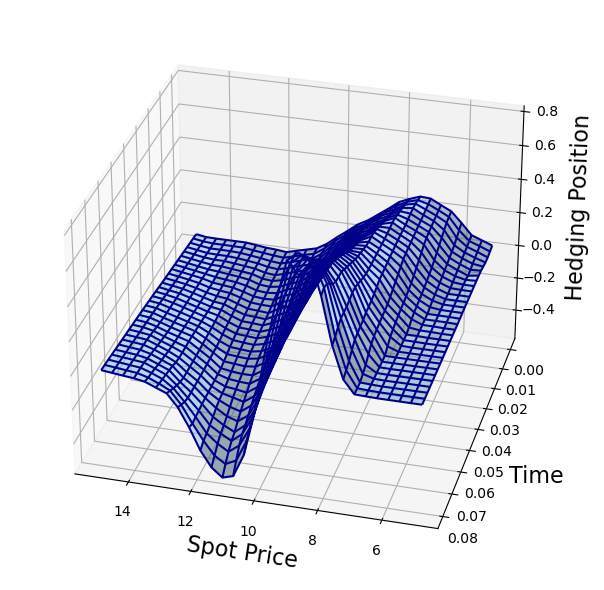

In [6]:
nr_discrete_points = 30 # Number of discrete points for the grid
# Create list of times and values
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
# Empty grid
grid = np.zeros((nr_discrete_points,nr_discrete_points))
#grid_Delta_hedge = np.zeros((nr_discrete_points,nr_discrete_points))
# Fill the grid with the values of the trained hedge
for i in range(len(times)):
    for j in range(len(values)):
        grid[i,j] = hedge([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        #grid_Delta_hedge[i,j] = BS_Delta(0.5,0,values[j],T-times[i],x_0)

# 3D PLOT
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.plot_wireframe(X, Y , grid_Delta_hedge,color = "darkred",label = "Delta-Hedge")
ax.plot_surface(X, Y , grid,color = "lightskyblue",alpha = 0.5)
ax.plot_wireframe(X, Y , grid,color = "darkblue",label = "Hedge")

ax.view_init(30, 105)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
#plt.legend()
plt.tight_layout()

#plt.legend()
plt.savefig('eps/fig_butterfly_hedge_3d.eps', format='eps')
plt.show()

Depict the Hedging Error

In [7]:
BATCH_SIZE = 50000 # Nr of Samples for the Histogram
t_k = np.linspace(0,T,n+1)
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


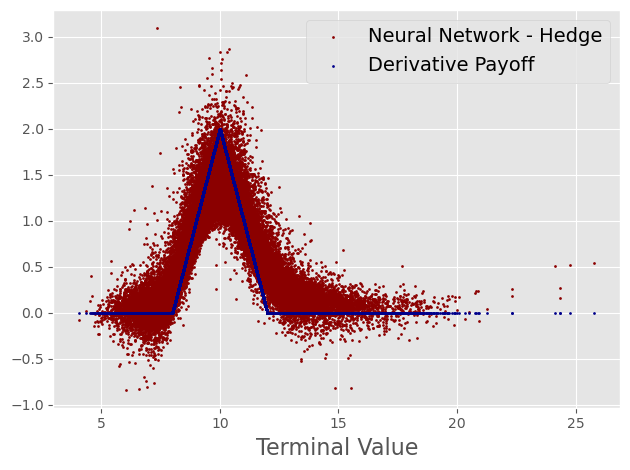

In [8]:
style.use('ggplot')
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "darkred",label = "Neural Network - Hedge",s=2)
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative Payoff",s=2)
plt.xlabel("Terminal Value", fontsize=16)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('eps/fig_butterfly_hedging_mc.eps', format='eps')
plt.show()


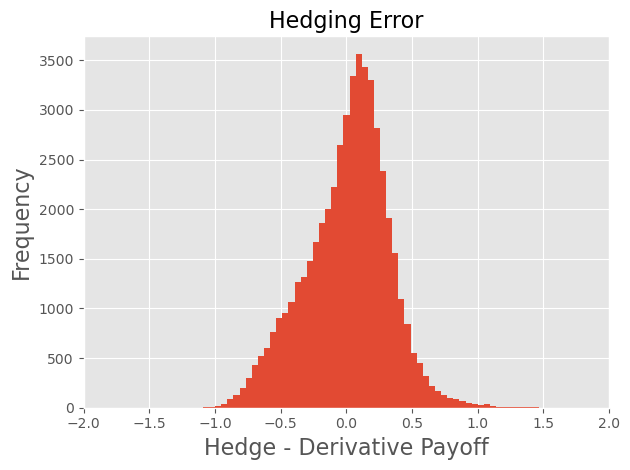

In [9]:
hedging_error = ((price + delta_S) - derivative_on_batch).numpy()
plt.hist(hedging_error,100)
plt.xlim([-2,2])
plt.xlabel("Hedge - Derivative Payoff", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Hedging Error", fontsize=16)
plt.tight_layout()
plt.savefig('eps/fig_butterfly_histogram.eps', format='eps')
plt.show()

Save the model

In [10]:
hedge.save("model_butterfly.h5")

# Training of a hedging strategy with fixed Parameters

Specify setting and compute the non-robust hedge.

In [11]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
# Specify parameters as the mean of the respective intervals.
a_0_fix = [0.5,0.5]
a_1_fix = [0.5,0.5]
b_0_fix = [0,0]
b_1_fix = [0,0]
gamma_fix = [1,1]
x_0 = 10.
def derivative(path):
    return tf.nn.relu(path[-1]-(x_0+2))+tf.nn.relu(path[-1]-(x_0-2))-2*tf.nn.relu(path[-1]-x_0)

price_fix, hedge_fix = optimal_hedge(derivative,a_0_fix,a_1_fix,b_0_fix,b_1_fix,gamma_fix,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 10000,l_r = 0.005,BATCH_SIZE =256)

  0%|          | 11/10000 [00:11<3:00:22,  1.08s/it]

Iteration:10, Price of Hedge: 0.8727133870124817, Loss: 0.4151531159877777


  0%|          | 21/10000 [00:22<2:55:18,  1.05s/it]

Iteration:20, Price of Hedge: 0.883247435092926, Loss: 0.4010295271873474


  0%|          | 31/10000 [00:33<2:55:16,  1.05s/it]

Iteration:30, Price of Hedge: 0.8943493366241455, Loss: 0.4443223476409912


  0%|          | 41/10000 [00:43<2:51:28,  1.03s/it]

Iteration:40, Price of Hedge: 0.9012157320976257, Loss: 0.41302600502967834


  1%|          | 51/10000 [00:53<2:49:34,  1.02s/it]

Iteration:50, Price of Hedge: 0.9080632328987122, Loss: 0.35347217321395874


  1%|          | 61/10000 [01:04<2:51:43,  1.04s/it]

Iteration:60, Price of Hedge: 0.9061471819877625, Loss: 0.3736453056335449


  1%|          | 71/10000 [01:15<2:59:11,  1.08s/it]

Iteration:70, Price of Hedge: 0.9050039649009705, Loss: 0.3317640423774719


  1%|          | 81/10000 [01:25<3:00:01,  1.09s/it]

Iteration:80, Price of Hedge: 0.9010831117630005, Loss: 0.42328381538391113


  1%|          | 91/10000 [01:36<3:00:44,  1.09s/it]

Iteration:90, Price of Hedge: 0.8987413048744202, Loss: 0.27942144870758057


  1%|          | 101/10000 [01:47<3:05:42,  1.13s/it]

Iteration:100, Price of Hedge: 0.8985750079154968, Loss: 0.29606711864471436


  1%|          | 111/10000 [01:58<2:54:10,  1.06s/it]

Iteration:110, Price of Hedge: 0.8935722708702087, Loss: 0.20945511758327484


  1%|          | 121/10000 [02:08<2:51:10,  1.04s/it]

Iteration:120, Price of Hedge: 0.8944414258003235, Loss: 0.3415489196777344


  1%|▏         | 131/10000 [02:18<2:35:39,  1.06it/s]

Iteration:130, Price of Hedge: 0.8944582939147949, Loss: 0.23320941627025604


  1%|▏         | 141/10000 [02:27<2:34:16,  1.07it/s]

Iteration:140, Price of Hedge: 0.8983750939369202, Loss: 0.1916205883026123


  2%|▏         | 151/10000 [02:36<2:31:34,  1.08it/s]

Iteration:150, Price of Hedge: 0.9026384949684143, Loss: 0.20805424451828003


  2%|▏         | 161/10000 [02:46<2:36:10,  1.05it/s]

Iteration:160, Price of Hedge: 0.9040288329124451, Loss: 0.18442809581756592


  2%|▏         | 171/10000 [02:56<2:34:53,  1.06it/s]

Iteration:170, Price of Hedge: 0.8984076380729675, Loss: 0.17849425971508026


  2%|▏         | 181/10000 [03:06<2:45:00,  1.01s/it]

Iteration:180, Price of Hedge: 0.8871628642082214, Loss: 0.23001673817634583


  2%|▏         | 191/10000 [03:16<2:43:23,  1.00it/s]

Iteration:190, Price of Hedge: 0.8859753608703613, Loss: 0.22847846150398254


  2%|▏         | 201/10000 [03:25<2:35:44,  1.05it/s]

Iteration:200, Price of Hedge: 0.8915499448776245, Loss: 0.2245520055294037


  2%|▏         | 211/10000 [03:35<2:37:36,  1.04it/s]

Iteration:210, Price of Hedge: 0.8926041126251221, Loss: 0.18350689113140106


  2%|▏         | 221/10000 [03:45<2:41:19,  1.01it/s]

Iteration:220, Price of Hedge: 0.8915533423423767, Loss: 0.1578454226255417


  2%|▏         | 231/10000 [03:55<2:44:10,  1.01s/it]

Iteration:230, Price of Hedge: 0.8983896374702454, Loss: 0.16756582260131836


  2%|▏         | 241/10000 [04:05<2:41:07,  1.01it/s]

Iteration:240, Price of Hedge: 0.9055488109588623, Loss: 0.1519894003868103


  3%|▎         | 251/10000 [04:14<2:38:29,  1.03it/s]

Iteration:250, Price of Hedge: 0.9102537035942078, Loss: 0.17846551537513733


  3%|▎         | 261/10000 [04:24<2:39:10,  1.02it/s]

Iteration:260, Price of Hedge: 0.9126132726669312, Loss: 0.17424249649047852


  3%|▎         | 271/10000 [04:34<2:38:57,  1.02it/s]

Iteration:270, Price of Hedge: 0.9045215249061584, Loss: 0.11183086037635803


  3%|▎         | 281/10000 [04:44<2:42:45,  1.00s/it]

Iteration:280, Price of Hedge: 0.8961793184280396, Loss: 0.13623744249343872


  3%|▎         | 291/10000 [04:53<2:38:31,  1.02it/s]

Iteration:290, Price of Hedge: 0.8899035453796387, Loss: 0.14119455218315125


  3%|▎         | 301/10000 [05:03<2:43:26,  1.01s/it]

Iteration:300, Price of Hedge: 0.8935604691505432, Loss: 0.13666632771492004


  3%|▎         | 311/10000 [05:13<2:38:57,  1.02it/s]

Iteration:310, Price of Hedge: 0.893784761428833, Loss: 0.1376112848520279


  3%|▎         | 321/10000 [05:22<2:31:37,  1.06it/s]

Iteration:320, Price of Hedge: 0.8931697010993958, Loss: 0.12671633064746857


  3%|▎         | 331/10000 [05:32<2:34:45,  1.04it/s]

Iteration:330, Price of Hedge: 0.8945804238319397, Loss: 0.15816447138786316


  3%|▎         | 341/10000 [05:42<2:41:29,  1.00s/it]

Iteration:340, Price of Hedge: 0.9000164866447449, Loss: 0.11687953025102615


  4%|▎         | 351/10000 [05:52<2:40:27,  1.00it/s]

Iteration:350, Price of Hedge: 0.9000236392021179, Loss: 0.14721128344535828


  4%|▎         | 361/10000 [06:02<2:45:52,  1.03s/it]

Iteration:360, Price of Hedge: 0.9002736210823059, Loss: 0.1191241592168808


  4%|▎         | 371/10000 [06:12<2:42:07,  1.01s/it]

Iteration:370, Price of Hedge: 0.9006566405296326, Loss: 0.17680716514587402


  4%|▍         | 381/10000 [06:22<2:42:26,  1.01s/it]

Iteration:380, Price of Hedge: 0.8998957276344299, Loss: 0.11994461715221405


  4%|▍         | 391/10000 [06:32<2:40:09,  1.00s/it]

Iteration:390, Price of Hedge: 0.898038387298584, Loss: 0.11126700043678284


  4%|▍         | 401/10000 [06:42<2:39:48,  1.00it/s]

Iteration:400, Price of Hedge: 0.8936265707015991, Loss: 0.15553292632102966


  4%|▍         | 411/10000 [06:52<2:39:41,  1.00it/s]

Iteration:410, Price of Hedge: 0.8920050263404846, Loss: 0.4178030490875244


  4%|▍         | 421/10000 [07:01<2:36:05,  1.02it/s]

Iteration:420, Price of Hedge: 0.8964354395866394, Loss: 0.27520594000816345


  4%|▍         | 431/10000 [07:11<2:34:09,  1.03it/s]

Iteration:430, Price of Hedge: 0.8960949778556824, Loss: 0.14701780676841736


  4%|▍         | 441/10000 [07:21<2:38:06,  1.01it/s]

Iteration:440, Price of Hedge: 0.892038106918335, Loss: 0.110225610435009


  5%|▍         | 451/10000 [07:31<2:36:10,  1.02it/s]

Iteration:450, Price of Hedge: 0.892827033996582, Loss: 0.11241134256124496


  5%|▍         | 461/10000 [07:40<2:32:01,  1.05it/s]

Iteration:460, Price of Hedge: 0.8932692408561707, Loss: 0.08705118298530579


  5%|▍         | 471/10000 [07:50<2:29:45,  1.06it/s]

Iteration:470, Price of Hedge: 0.8938854932785034, Loss: 0.11126609146595001


  5%|▍         | 481/10000 [07:59<2:35:10,  1.02it/s]

Iteration:480, Price of Hedge: 0.8892748951911926, Loss: 0.09486190974712372


  5%|▍         | 491/10000 [08:09<2:25:51,  1.09it/s]

Iteration:490, Price of Hedge: 0.891637921333313, Loss: 0.09155160188674927


  5%|▌         | 501/10000 [08:18<2:26:37,  1.08it/s]

Iteration:500, Price of Hedge: 0.8981630802154541, Loss: 0.09502598643302917


  5%|▌         | 511/10000 [08:26<2:11:17,  1.20it/s]

Iteration:510, Price of Hedge: 0.8995561003684998, Loss: 0.09715957194566727


  5%|▌         | 521/10000 [08:35<2:18:29,  1.14it/s]

Iteration:520, Price of Hedge: 0.9018551111221313, Loss: 0.11670973896980286


  5%|▌         | 531/10000 [08:44<2:25:10,  1.09it/s]

Iteration:530, Price of Hedge: 0.9053932428359985, Loss: 0.10836659371852875


  5%|▌         | 541/10000 [08:53<2:28:40,  1.06it/s]

Iteration:540, Price of Hedge: 0.9038415551185608, Loss: 0.09505777060985565


  6%|▌         | 551/10000 [09:03<2:30:14,  1.05it/s]

Iteration:550, Price of Hedge: 0.9019126296043396, Loss: 0.09325996041297913


  6%|▌         | 561/10000 [09:12<2:18:53,  1.13it/s]

Iteration:560, Price of Hedge: 0.8989949822425842, Loss: 0.13660284876823425


  6%|▌         | 571/10000 [09:20<2:11:50,  1.19it/s]

Iteration:570, Price of Hedge: 0.89522784948349, Loss: 0.09106070548295975


  6%|▌         | 581/10000 [09:30<2:35:26,  1.01it/s]

Iteration:580, Price of Hedge: 0.9036056995391846, Loss: 0.14037303626537323


  6%|▌         | 591/10000 [09:39<2:29:05,  1.05it/s]

Iteration:590, Price of Hedge: 0.9087679982185364, Loss: 0.09857968986034393


  6%|▌         | 601/10000 [09:48<2:16:21,  1.15it/s]

Iteration:600, Price of Hedge: 0.9087692499160767, Loss: 0.11658512055873871


  6%|▌         | 611/10000 [09:57<2:30:32,  1.04it/s]

Iteration:610, Price of Hedge: 0.9018752574920654, Loss: 0.09841149300336838


  6%|▌         | 621/10000 [10:06<2:16:28,  1.15it/s]

Iteration:620, Price of Hedge: 0.8935850262641907, Loss: 0.09840351343154907


  6%|▋         | 631/10000 [10:15<2:23:41,  1.09it/s]

Iteration:630, Price of Hedge: 0.8928532600402832, Loss: 0.10859903693199158


  6%|▋         | 641/10000 [10:25<2:32:26,  1.02it/s]

Iteration:640, Price of Hedge: 0.896537721157074, Loss: 0.10848650336265564


  7%|▋         | 651/10000 [10:35<2:31:42,  1.03it/s]

Iteration:650, Price of Hedge: 0.8954507112503052, Loss: 0.0922803059220314


  7%|▋         | 661/10000 [10:44<2:19:38,  1.11it/s]

Iteration:660, Price of Hedge: 0.8995809555053711, Loss: 0.12379389256238937


  7%|▋         | 671/10000 [10:52<2:16:37,  1.14it/s]

Iteration:670, Price of Hedge: 0.9037929177284241, Loss: 0.08950841426849365


  7%|▋         | 681/10000 [11:02<2:28:15,  1.05it/s]

Iteration:680, Price of Hedge: 0.9086451530456543, Loss: 0.08450235426425934


  7%|▋         | 691/10000 [11:12<2:40:23,  1.03s/it]

Iteration:690, Price of Hedge: 0.9099448919296265, Loss: 0.12082108855247498


  7%|▋         | 701/10000 [11:21<2:18:08,  1.12it/s]

Iteration:700, Price of Hedge: 0.9016903638839722, Loss: 0.09292503446340561


  7%|▋         | 711/10000 [11:30<2:15:20,  1.14it/s]

Iteration:710, Price of Hedge: 0.8972005844116211, Loss: 0.16149958968162537


  7%|▋         | 721/10000 [11:38<2:04:33,  1.24it/s]

Iteration:720, Price of Hedge: 0.8991413712501526, Loss: 0.10215732455253601


  7%|▋         | 731/10000 [11:47<2:14:52,  1.15it/s]

Iteration:730, Price of Hedge: 0.899169921875, Loss: 0.1018509790301323


  7%|▋         | 741/10000 [11:55<2:07:40,  1.21it/s]

Iteration:740, Price of Hedge: 0.9005641341209412, Loss: 0.11105483770370483


  8%|▊         | 751/10000 [12:04<2:10:43,  1.18it/s]

Iteration:750, Price of Hedge: 0.8945879936218262, Loss: 0.10397480428218842


  8%|▊         | 761/10000 [12:13<2:15:30,  1.14it/s]

Iteration:760, Price of Hedge: 0.8929494023323059, Loss: 0.10805333405733109


  8%|▊         | 771/10000 [12:21<2:09:25,  1.19it/s]

Iteration:770, Price of Hedge: 0.8942195177078247, Loss: 0.08564102649688721


  8%|▊         | 781/10000 [12:31<2:32:28,  1.01it/s]

Iteration:780, Price of Hedge: 0.8940993547439575, Loss: 0.11252599954605103


  8%|▊         | 791/10000 [12:39<2:10:18,  1.18it/s]

Iteration:790, Price of Hedge: 0.8998762965202332, Loss: 0.1302073895931244


  8%|▊         | 801/10000 [12:49<2:29:32,  1.03it/s]

Iteration:800, Price of Hedge: 0.902797520160675, Loss: 0.10515278577804565


  8%|▊         | 811/10000 [12:59<2:31:56,  1.01it/s]

Iteration:810, Price of Hedge: 0.8977615237236023, Loss: 0.12195485830307007


  8%|▊         | 821/10000 [13:09<2:31:57,  1.01it/s]

Iteration:820, Price of Hedge: 0.8941752910614014, Loss: 0.08826104551553726


  8%|▊         | 831/10000 [13:19<2:33:18,  1.00s/it]

Iteration:830, Price of Hedge: 0.9003549218177795, Loss: 0.08148184418678284


  8%|▊         | 841/10000 [13:29<2:31:02,  1.01it/s]

Iteration:840, Price of Hedge: 0.903828501701355, Loss: 0.08499059081077576


  9%|▊         | 851/10000 [13:39<2:28:35,  1.03it/s]

Iteration:850, Price of Hedge: 0.8946106433868408, Loss: 0.09763683378696442


  9%|▊         | 861/10000 [13:48<2:25:23,  1.05it/s]

Iteration:860, Price of Hedge: 0.8946021199226379, Loss: 0.10924019664525986


  9%|▊         | 871/10000 [13:57<2:11:21,  1.16it/s]

Iteration:870, Price of Hedge: 0.9003493189811707, Loss: 0.147914320230484


  9%|▉         | 881/10000 [14:06<2:23:36,  1.06it/s]

Iteration:880, Price of Hedge: 0.9024214148521423, Loss: 0.09926366806030273


  9%|▉         | 891/10000 [14:15<2:13:12,  1.14it/s]

Iteration:890, Price of Hedge: 0.9021111726760864, Loss: 0.09623468667268753


  9%|▉         | 901/10000 [14:24<2:19:08,  1.09it/s]

Iteration:900, Price of Hedge: 0.9030250310897827, Loss: 0.11584305763244629


  9%|▉         | 911/10000 [14:34<2:31:21,  1.00it/s]

Iteration:910, Price of Hedge: 0.8998915553092957, Loss: 0.0965651422739029


  9%|▉         | 921/10000 [14:45<2:42:53,  1.08s/it]

Iteration:920, Price of Hedge: 0.8970782160758972, Loss: 0.13713300228118896


  9%|▉         | 931/10000 [14:56<2:42:33,  1.08s/it]

Iteration:930, Price of Hedge: 0.8982568383216858, Loss: 0.10305126011371613


  9%|▉         | 941/10000 [15:06<2:42:56,  1.08s/it]

Iteration:940, Price of Hedge: 0.8947713375091553, Loss: 0.09565432369709015


 10%|▉         | 951/10000 [15:17<2:38:57,  1.05s/it]

Iteration:950, Price of Hedge: 0.8875824213027954, Loss: 0.1075543612241745


 10%|▉         | 961/10000 [15:28<2:44:34,  1.09s/it]

Iteration:960, Price of Hedge: 0.8934022188186646, Loss: 0.1067771315574646


 10%|▉         | 971/10000 [15:38<2:43:35,  1.09s/it]

Iteration:970, Price of Hedge: 0.9019901156425476, Loss: 0.07313266396522522


 10%|▉         | 981/10000 [15:49<2:35:59,  1.04s/it]

Iteration:980, Price of Hedge: 0.9052371978759766, Loss: 0.09811625629663467


 10%|▉         | 991/10000 [16:00<2:43:00,  1.09s/it]

Iteration:990, Price of Hedge: 0.9071265459060669, Loss: 0.09838712215423584


 10%|█         | 1001/10000 [16:10<2:40:44,  1.07s/it]

Iteration:1000, Price of Hedge: 0.906154990196228, Loss: 0.0948919802904129


 10%|█         | 1011/10000 [16:21<2:34:27,  1.03s/it]

Iteration:1010, Price of Hedge: 0.8963673114776611, Loss: 0.08600994199514389


 10%|█         | 1021/10000 [16:32<2:39:41,  1.07s/it]

Iteration:1020, Price of Hedge: 0.8988032341003418, Loss: 0.10511624813079834


 10%|█         | 1031/10000 [16:42<2:40:54,  1.08s/it]

Iteration:1030, Price of Hedge: 0.8968005776405334, Loss: 0.11489108204841614


 10%|█         | 1041/10000 [16:53<2:32:22,  1.02s/it]

Iteration:1040, Price of Hedge: 0.8930202722549438, Loss: 0.11177147179841995


 11%|█         | 1051/10000 [17:03<2:34:37,  1.04s/it]

Iteration:1050, Price of Hedge: 0.891205906867981, Loss: 0.12961505353450775


 11%|█         | 1061/10000 [17:14<2:40:36,  1.08s/it]

Iteration:1060, Price of Hedge: 0.9028248190879822, Loss: 0.16146501898765564


 11%|█         | 1071/10000 [17:24<2:38:45,  1.07s/it]

Iteration:1070, Price of Hedge: 0.8962181806564331, Loss: 0.09931327402591705


 11%|█         | 1081/10000 [17:34<2:21:20,  1.05it/s]

Iteration:1080, Price of Hedge: 0.8830651640892029, Loss: 0.08288595080375671


 11%|█         | 1091/10000 [17:43<2:20:17,  1.06it/s]

Iteration:1090, Price of Hedge: 0.8917887806892395, Loss: 0.10103266686201096


 11%|█         | 1101/10000 [17:53<2:20:56,  1.05it/s]

Iteration:1100, Price of Hedge: 0.8944256901741028, Loss: 0.133165180683136


 11%|█         | 1111/10000 [18:02<2:19:52,  1.06it/s]

Iteration:1110, Price of Hedge: 0.8961209058761597, Loss: 0.10543268918991089


 11%|█         | 1121/10000 [18:12<2:20:40,  1.05it/s]

Iteration:1120, Price of Hedge: 0.890550971031189, Loss: 0.10191649198532104


 11%|█▏        | 1131/10000 [18:21<2:19:18,  1.06it/s]

Iteration:1130, Price of Hedge: 0.8894707560539246, Loss: 0.08851516246795654


 11%|█▏        | 1141/10000 [18:31<2:25:11,  1.02it/s]

Iteration:1140, Price of Hedge: 0.8998562693595886, Loss: 0.08673650026321411


 12%|█▏        | 1151/10000 [18:41<2:22:25,  1.04it/s]

Iteration:1150, Price of Hedge: 0.9030507802963257, Loss: 0.09393923729658127


 12%|█▏        | 1161/10000 [18:50<2:24:09,  1.02it/s]

Iteration:1160, Price of Hedge: 0.8932386636734009, Loss: 0.09653514623641968


 12%|█▏        | 1171/10000 [19:00<2:24:39,  1.02it/s]

Iteration:1170, Price of Hedge: 0.889025092124939, Loss: 0.09736162424087524


 12%|█▏        | 1181/10000 [19:10<2:19:46,  1.05it/s]

Iteration:1180, Price of Hedge: 0.8943610787391663, Loss: 0.09805680811405182


 12%|█▏        | 1191/10000 [19:20<2:21:05,  1.04it/s]

Iteration:1190, Price of Hedge: 0.9027708768844604, Loss: 0.15099233388900757


 12%|█▏        | 1201/10000 [19:30<2:27:12,  1.00s/it]

Iteration:1200, Price of Hedge: 0.9071422815322876, Loss: 0.10839802771806717


 12%|█▏        | 1211/10000 [19:40<2:27:30,  1.01s/it]

Iteration:1210, Price of Hedge: 0.9023239612579346, Loss: 0.137650266289711


 12%|█▏        | 1221/10000 [19:49<2:22:07,  1.03it/s]

Iteration:1220, Price of Hedge: 0.896467387676239, Loss: 0.11266852915287018


 12%|█▏        | 1231/10000 [19:59<2:25:06,  1.01it/s]

Iteration:1230, Price of Hedge: 0.8900336623191833, Loss: 0.08552633225917816


 12%|█▏        | 1241/10000 [20:09<2:21:48,  1.03it/s]

Iteration:1240, Price of Hedge: 0.8905835151672363, Loss: 0.09102310240268707


 13%|█▎        | 1251/10000 [20:18<2:17:24,  1.06it/s]

Iteration:1250, Price of Hedge: 0.8935935497283936, Loss: 0.09206042438745499


 13%|█▎        | 1261/10000 [20:28<2:11:57,  1.10it/s]

Iteration:1260, Price of Hedge: 0.8905876278877258, Loss: 0.10216527432203293


 13%|█▎        | 1271/10000 [20:37<2:20:04,  1.04it/s]

Iteration:1270, Price of Hedge: 0.8894698023796082, Loss: 0.08835011720657349


 13%|█▎        | 1281/10000 [20:47<2:24:35,  1.00it/s]

Iteration:1280, Price of Hedge: 0.903172492980957, Loss: 0.10276003181934357


 13%|█▎        | 1291/10000 [20:57<2:24:03,  1.01it/s]

Iteration:1290, Price of Hedge: 0.9121919274330139, Loss: 0.1098492294549942


 13%|█▎        | 1301/10000 [21:07<2:19:48,  1.04it/s]

Iteration:1300, Price of Hedge: 0.9105395674705505, Loss: 0.12508000433444977


 13%|█▎        | 1311/10000 [21:16<2:20:28,  1.03it/s]

Iteration:1310, Price of Hedge: 0.8995041251182556, Loss: 0.13030964136123657


 13%|█▎        | 1321/10000 [21:26<2:18:24,  1.05it/s]

Iteration:1320, Price of Hedge: 0.8877642750740051, Loss: 0.09943346679210663


 13%|█▎        | 1331/10000 [21:35<2:18:15,  1.05it/s]

Iteration:1330, Price of Hedge: 0.8938429355621338, Loss: 0.08831939101219177


 13%|█▎        | 1341/10000 [21:45<2:22:32,  1.01it/s]

Iteration:1340, Price of Hedge: 0.910773515701294, Loss: 0.1066439226269722


 14%|█▎        | 1351/10000 [21:54<2:11:24,  1.10it/s]

Iteration:1350, Price of Hedge: 0.8988549709320068, Loss: 0.11074957996606827


 14%|█▎        | 1361/10000 [22:04<2:14:57,  1.07it/s]

Iteration:1360, Price of Hedge: 0.8862732648849487, Loss: 0.11006946116685867


 14%|█▎        | 1371/10000 [22:14<2:16:19,  1.05it/s]

Iteration:1370, Price of Hedge: 0.886947751045227, Loss: 0.12053507566452026


 14%|█▍        | 1381/10000 [22:23<2:20:27,  1.02it/s]

Iteration:1380, Price of Hedge: 0.9016648530960083, Loss: 0.09075963497161865


 14%|█▍        | 1391/10000 [22:34<2:27:52,  1.03s/it]

Iteration:1390, Price of Hedge: 0.9034516215324402, Loss: 0.06649323552846909


 14%|█▍        | 1401/10000 [22:43<2:17:06,  1.05it/s]

Iteration:1400, Price of Hedge: 0.8992089033126831, Loss: 0.11299490928649902


 14%|█▍        | 1411/10000 [22:53<2:18:54,  1.03it/s]

Iteration:1410, Price of Hedge: 0.8949435353279114, Loss: 0.09912717342376709


 14%|█▍        | 1421/10000 [23:02<2:20:51,  1.02it/s]

Iteration:1420, Price of Hedge: 0.8971253037452698, Loss: 0.06712532043457031


 14%|█▍        | 1431/10000 [23:12<2:18:18,  1.03it/s]

Iteration:1430, Price of Hedge: 0.8958953022956848, Loss: 0.07225638628005981


 14%|█▍        | 1441/10000 [23:22<2:17:39,  1.04it/s]

Iteration:1440, Price of Hedge: 0.8944448828697205, Loss: 0.07297690212726593


 15%|█▍        | 1451/10000 [23:32<2:22:30,  1.00s/it]

Iteration:1450, Price of Hedge: 0.903283953666687, Loss: 0.09573567658662796


 15%|█▍        | 1461/10000 [23:41<2:15:07,  1.05it/s]

Iteration:1460, Price of Hedge: 0.9065507650375366, Loss: 0.0727258250117302


 15%|█▍        | 1471/10000 [23:51<2:15:50,  1.05it/s]

Iteration:1470, Price of Hedge: 0.9030600786209106, Loss: 0.0582495778799057


 15%|█▍        | 1481/10000 [24:01<2:20:06,  1.01it/s]

Iteration:1480, Price of Hedge: 0.8950170278549194, Loss: 0.05464235693216324


 15%|█▍        | 1491/10000 [24:11<2:17:16,  1.03it/s]

Iteration:1490, Price of Hedge: 0.8885034322738647, Loss: 0.0878923088312149


 15%|█▌        | 1501/10000 [24:21<2:18:48,  1.02it/s]

Iteration:1500, Price of Hedge: 0.8879864811897278, Loss: 0.1495557427406311


 15%|█▌        | 1511/10000 [24:30<2:16:12,  1.04it/s]

Iteration:1510, Price of Hedge: 0.8886136412620544, Loss: 0.09074912965297699


 15%|█▌        | 1521/10000 [24:40<2:19:53,  1.01it/s]

Iteration:1520, Price of Hedge: 0.8957529067993164, Loss: 0.07530215382575989


 15%|█▌        | 1531/10000 [24:50<2:18:20,  1.02it/s]

Iteration:1530, Price of Hedge: 0.9095730781555176, Loss: 0.07117360830307007


 15%|█▌        | 1541/10000 [24:59<2:12:20,  1.07it/s]

Iteration:1540, Price of Hedge: 0.907162070274353, Loss: 0.062420859932899475


 16%|█▌        | 1551/10000 [25:09<2:16:42,  1.03it/s]

Iteration:1550, Price of Hedge: 0.9015655517578125, Loss: 0.05643165856599808


 16%|█▌        | 1561/10000 [25:19<2:15:52,  1.04it/s]

Iteration:1560, Price of Hedge: 0.896215558052063, Loss: 0.0506238117814064


 16%|█▌        | 1571/10000 [25:29<2:18:27,  1.01it/s]

Iteration:1570, Price of Hedge: 0.8957880139350891, Loss: 0.04777275398373604


 16%|█▌        | 1581/10000 [25:38<2:13:42,  1.05it/s]

Iteration:1580, Price of Hedge: 0.8925374150276184, Loss: 0.054166994988918304


 16%|█▌        | 1591/10000 [25:48<2:14:58,  1.04it/s]

Iteration:1590, Price of Hedge: 0.8918370604515076, Loss: 0.05931159853935242


 16%|█▌        | 1601/10000 [25:58<2:15:04,  1.04it/s]

Iteration:1600, Price of Hedge: 0.8992122411727905, Loss: 0.07448598742485046


 16%|█▌        | 1611/10000 [26:07<2:14:57,  1.04it/s]

Iteration:1610, Price of Hedge: 0.9011381268501282, Loss: 0.057120759040117264


 16%|█▌        | 1621/10000 [26:17<2:23:03,  1.02s/it]

Iteration:1620, Price of Hedge: 0.8932108283042908, Loss: 0.04684371501207352


 16%|█▋        | 1631/10000 [26:27<2:20:59,  1.01s/it]

Iteration:1630, Price of Hedge: 0.8922865390777588, Loss: 0.04140447825193405


 16%|█▋        | 1641/10000 [26:37<2:20:39,  1.01s/it]

Iteration:1640, Price of Hedge: 0.9056154489517212, Loss: 0.05013354867696762


 17%|█▋        | 1651/10000 [26:47<2:20:21,  1.01s/it]

Iteration:1650, Price of Hedge: 0.912601113319397, Loss: 0.04385202378034592


 17%|█▋        | 1661/10000 [26:57<2:15:37,  1.02it/s]

Iteration:1660, Price of Hedge: 0.8993516564369202, Loss: 0.03978177160024643


 17%|█▋        | 1671/10000 [27:07<2:19:13,  1.00s/it]

Iteration:1670, Price of Hedge: 0.8921936750411987, Loss: 0.05338946729898453


 17%|█▋        | 1681/10000 [27:17<2:11:19,  1.06it/s]

Iteration:1680, Price of Hedge: 0.8937339782714844, Loss: 0.04943423345685005


 17%|█▋        | 1691/10000 [27:26<2:15:22,  1.02it/s]

Iteration:1690, Price of Hedge: 0.8943373560905457, Loss: 0.048775434494018555


 17%|█▋        | 1701/10000 [27:36<2:11:45,  1.05it/s]

Iteration:1700, Price of Hedge: 0.8934136629104614, Loss: 0.0549241378903389


 17%|█▋        | 1711/10000 [27:45<2:12:32,  1.04it/s]

Iteration:1710, Price of Hedge: 0.8963034152984619, Loss: 0.035807229578495026


 17%|█▋        | 1721/10000 [27:56<2:19:48,  1.01s/it]

Iteration:1720, Price of Hedge: 0.8979477882385254, Loss: 0.04781566187739372


 17%|█▋        | 1731/10000 [28:05<2:12:11,  1.04it/s]

Iteration:1730, Price of Hedge: 0.9001362323760986, Loss: 0.04222623258829117


 17%|█▋        | 1741/10000 [28:15<2:11:13,  1.05it/s]

Iteration:1740, Price of Hedge: 0.8984512686729431, Loss: 0.03596801310777664


 18%|█▊        | 1751/10000 [28:25<2:20:32,  1.02s/it]

Iteration:1750, Price of Hedge: 0.8928872346878052, Loss: 0.03182956576347351


 18%|█▊        | 1761/10000 [28:35<2:17:03,  1.00it/s]

Iteration:1760, Price of Hedge: 0.8928341865539551, Loss: 0.053941432386636734


 18%|█▊        | 1771/10000 [28:45<2:14:28,  1.02it/s]

Iteration:1770, Price of Hedge: 0.8980584144592285, Loss: 0.039913106709718704


 18%|█▊        | 1781/10000 [28:54<2:14:09,  1.02it/s]

Iteration:1780, Price of Hedge: 0.8985027074813843, Loss: 0.0458441860973835


 18%|█▊        | 1791/10000 [29:05<2:16:25,  1.00it/s]

Iteration:1790, Price of Hedge: 0.89625483751297, Loss: 0.04269874840974808


 18%|█▊        | 1801/10000 [29:15<2:19:42,  1.02s/it]

Iteration:1800, Price of Hedge: 0.9002197980880737, Loss: 0.050729528069496155


 18%|█▊        | 1811/10000 [29:24<2:14:22,  1.02it/s]

Iteration:1810, Price of Hedge: 0.9036709666252136, Loss: 0.03753552585840225


 18%|█▊        | 1821/10000 [29:34<2:17:13,  1.01s/it]

Iteration:1820, Price of Hedge: 0.9024844169616699, Loss: 0.04564855247735977


 18%|█▊        | 1831/10000 [29:44<2:12:56,  1.02it/s]

Iteration:1830, Price of Hedge: 0.8934398889541626, Loss: 0.050224076956510544


 18%|█▊        | 1841/10000 [29:54<2:14:25,  1.01it/s]

Iteration:1840, Price of Hedge: 0.8963767290115356, Loss: 0.04352668672800064


 19%|█▊        | 1851/10000 [30:04<2:10:01,  1.04it/s]

Iteration:1850, Price of Hedge: 0.9041063785552979, Loss: 0.039837684482336044


 19%|█▊        | 1861/10000 [30:14<2:11:41,  1.03it/s]

Iteration:1860, Price of Hedge: 0.9048566222190857, Loss: 0.04017212986946106


 19%|█▊        | 1871/10000 [30:24<2:15:10,  1.00it/s]

Iteration:1870, Price of Hedge: 0.8984102606773376, Loss: 0.03522413223981857


 19%|█▉        | 1881/10000 [30:34<2:15:25,  1.00s/it]

Iteration:1880, Price of Hedge: 0.8925608992576599, Loss: 0.03834036737680435


 19%|█▉        | 1891/10000 [30:43<2:10:36,  1.03it/s]

Iteration:1890, Price of Hedge: 0.902089536190033, Loss: 0.040456373244524


 19%|█▉        | 1901/10000 [30:52<2:03:46,  1.09it/s]

Iteration:1900, Price of Hedge: 0.9021340012550354, Loss: 0.04141011834144592


 19%|█▉        | 1911/10000 [31:02<2:15:51,  1.01s/it]

Iteration:1910, Price of Hedge: 0.8995471000671387, Loss: 0.04301395267248154


 19%|█▉        | 1921/10000 [31:12<2:11:54,  1.02it/s]

Iteration:1920, Price of Hedge: 0.8950349688529968, Loss: 0.03497421368956566


 19%|█▉        | 1931/10000 [31:22<2:16:24,  1.01s/it]

Iteration:1930, Price of Hedge: 0.8952671885490417, Loss: 0.04353216290473938


 19%|█▉        | 1941/10000 [31:33<2:16:20,  1.02s/it]

Iteration:1940, Price of Hedge: 0.8997172713279724, Loss: 0.04033403843641281


 20%|█▉        | 1951/10000 [31:42<2:01:43,  1.10it/s]

Iteration:1950, Price of Hedge: 0.8973281979560852, Loss: 0.03237821161746979


 20%|█▉        | 1961/10000 [31:50<1:53:08,  1.18it/s]

Iteration:1960, Price of Hedge: 0.8973091840744019, Loss: 0.03939371928572655


 20%|█▉        | 1971/10000 [31:59<1:58:22,  1.13it/s]

Iteration:1970, Price of Hedge: 0.8967260718345642, Loss: 0.02859930694103241


 20%|█▉        | 1981/10000 [32:08<1:54:16,  1.17it/s]

Iteration:1980, Price of Hedge: 0.8976430296897888, Loss: 0.03635420650243759


 20%|█▉        | 1991/10000 [32:18<2:05:00,  1.07it/s]

Iteration:1990, Price of Hedge: 0.9019163846969604, Loss: 0.029457950964570045


 20%|██        | 2001/10000 [32:27<1:59:04,  1.12it/s]

Iteration:2000, Price of Hedge: 0.9012143015861511, Loss: 0.04457689821720123


 20%|██        | 2011/10000 [32:35<1:58:54,  1.12it/s]

Iteration:2010, Price of Hedge: 0.8994855284690857, Loss: 0.031379587948322296


 20%|██        | 2021/10000 [32:45<2:07:00,  1.05it/s]

Iteration:2020, Price of Hedge: 0.8965291380882263, Loss: 0.04588206857442856


 20%|██        | 2031/10000 [32:55<2:14:37,  1.01s/it]

Iteration:2030, Price of Hedge: 0.8992871046066284, Loss: 0.034853748977184296


 20%|██        | 2041/10000 [33:04<2:10:31,  1.02it/s]

Iteration:2040, Price of Hedge: 0.900789737701416, Loss: 0.046487048268318176


 21%|██        | 2051/10000 [33:14<2:11:30,  1.01it/s]

Iteration:2050, Price of Hedge: 0.8914265036582947, Loss: 0.03144947439432144


 21%|██        | 2061/10000 [33:24<2:07:38,  1.04it/s]

Iteration:2060, Price of Hedge: 0.8956671357154846, Loss: 0.04738253355026245


 21%|██        | 2071/10000 [33:34<2:09:18,  1.02it/s]

Iteration:2070, Price of Hedge: 0.9085040092468262, Loss: 0.030979501083493233


 21%|██        | 2081/10000 [33:44<2:09:54,  1.02it/s]

Iteration:2080, Price of Hedge: 0.8916178345680237, Loss: 0.04673251509666443


 21%|██        | 2091/10000 [33:52<1:54:45,  1.15it/s]

Iteration:2090, Price of Hedge: 0.8891052007675171, Loss: 0.03803768754005432


 21%|██        | 2101/10000 [34:01<1:57:02,  1.12it/s]

Iteration:2100, Price of Hedge: 0.8954353928565979, Loss: 0.03618165850639343


 21%|██        | 2111/10000 [34:10<1:51:34,  1.18it/s]

Iteration:2110, Price of Hedge: 0.9026305675506592, Loss: 0.04227277636528015


 21%|██        | 2121/10000 [34:18<1:55:00,  1.14it/s]

Iteration:2120, Price of Hedge: 0.9008104205131531, Loss: 0.036376744508743286


 21%|██▏       | 2131/10000 [34:27<1:55:21,  1.14it/s]

Iteration:2130, Price of Hedge: 0.8996589779853821, Loss: 0.03682657703757286


 21%|██▏       | 2141/10000 [34:36<1:59:32,  1.10it/s]

Iteration:2140, Price of Hedge: 0.8941375613212585, Loss: 0.037000738084316254


 22%|██▏       | 2151/10000 [34:45<1:59:23,  1.10it/s]

Iteration:2150, Price of Hedge: 0.8971849679946899, Loss: 0.03010779805481434


 22%|██▏       | 2161/10000 [34:54<1:59:29,  1.09it/s]

Iteration:2160, Price of Hedge: 0.9013728499412537, Loss: 0.03139960765838623


 22%|██▏       | 2171/10000 [35:04<2:00:13,  1.09it/s]

Iteration:2170, Price of Hedge: 0.8938949108123779, Loss: 0.033578403294086456


 22%|██▏       | 2181/10000 [35:13<1:59:18,  1.09it/s]

Iteration:2180, Price of Hedge: 0.8971516489982605, Loss: 0.02973143383860588


 22%|██▏       | 2191/10000 [35:22<2:00:51,  1.08it/s]

Iteration:2190, Price of Hedge: 0.9003861546516418, Loss: 0.034636881202459335


 22%|██▏       | 2201/10000 [35:32<2:00:41,  1.08it/s]

Iteration:2200, Price of Hedge: 0.9018022418022156, Loss: 0.02998032048344612


 22%|██▏       | 2211/10000 [35:41<1:58:40,  1.09it/s]

Iteration:2210, Price of Hedge: 0.9015370011329651, Loss: 0.04218083620071411


 22%|██▏       | 2221/10000 [35:50<1:57:43,  1.10it/s]

Iteration:2220, Price of Hedge: 0.8950888514518738, Loss: 0.03840016573667526


 22%|██▏       | 2231/10000 [35:59<1:58:50,  1.09it/s]

Iteration:2230, Price of Hedge: 0.8901529312133789, Loss: 0.03669625148177147


 22%|██▏       | 2241/10000 [36:09<1:59:37,  1.08it/s]

Iteration:2240, Price of Hedge: 0.8960734009742737, Loss: 0.0897926464676857


 23%|██▎       | 2251/10000 [36:18<1:59:35,  1.08it/s]

Iteration:2250, Price of Hedge: 0.8875371813774109, Loss: 0.05365656316280365


 23%|██▎       | 2261/10000 [36:27<1:59:00,  1.08it/s]

Iteration:2260, Price of Hedge: 0.8994964957237244, Loss: 0.0488579124212265


 23%|██▎       | 2271/10000 [36:36<1:57:06,  1.10it/s]

Iteration:2270, Price of Hedge: 0.8928398489952087, Loss: 0.048528969287872314


 23%|██▎       | 2281/10000 [36:46<1:59:14,  1.08it/s]

Iteration:2280, Price of Hedge: 0.8999502062797546, Loss: 0.049855053424835205


 23%|██▎       | 2291/10000 [36:55<1:56:24,  1.10it/s]

Iteration:2290, Price of Hedge: 0.8987369537353516, Loss: 0.06656664609909058


 23%|██▎       | 2301/10000 [37:04<1:58:02,  1.09it/s]

Iteration:2300, Price of Hedge: 0.9008962512016296, Loss: 0.03033619001507759


 23%|██▎       | 2311/10000 [37:13<1:50:06,  1.16it/s]

Iteration:2310, Price of Hedge: 0.8933044672012329, Loss: 0.04236219823360443


 23%|██▎       | 2321/10000 [37:21<1:47:37,  1.19it/s]

Iteration:2320, Price of Hedge: 0.9044002890586853, Loss: 0.03608666732907295


 23%|██▎       | 2331/10000 [37:30<1:53:13,  1.13it/s]

Iteration:2330, Price of Hedge: 0.9023164510726929, Loss: 0.04840542748570442


 23%|██▎       | 2341/10000 [37:38<1:48:53,  1.17it/s]

Iteration:2340, Price of Hedge: 0.8939306139945984, Loss: 0.03532329946756363


 24%|██▎       | 2351/10000 [37:47<1:51:05,  1.15it/s]

Iteration:2350, Price of Hedge: 0.8982692360877991, Loss: 0.045741401612758636


 24%|██▎       | 2361/10000 [37:56<1:59:07,  1.07it/s]

Iteration:2360, Price of Hedge: 0.8972012400627136, Loss: 0.04361659288406372


 24%|██▎       | 2371/10000 [38:06<2:03:27,  1.03it/s]

Iteration:2370, Price of Hedge: 0.8908228874206543, Loss: 0.03533473610877991


 24%|██▍       | 2381/10000 [38:15<2:00:45,  1.05it/s]

Iteration:2380, Price of Hedge: 0.889413595199585, Loss: 0.04213312268257141


 24%|██▍       | 2391/10000 [38:25<1:57:39,  1.08it/s]

Iteration:2390, Price of Hedge: 0.8944128751754761, Loss: 0.030070289969444275


 24%|██▍       | 2401/10000 [38:35<2:03:45,  1.02it/s]

Iteration:2400, Price of Hedge: 0.8981469869613647, Loss: 0.04106712341308594


 24%|██▍       | 2411/10000 [38:44<1:58:18,  1.07it/s]

Iteration:2410, Price of Hedge: 0.8958675861358643, Loss: 0.04100887477397919


 24%|██▍       | 2421/10000 [38:54<1:59:36,  1.06it/s]

Iteration:2420, Price of Hedge: 0.8943605422973633, Loss: 0.042845528572797775


 24%|██▍       | 2431/10000 [39:03<1:59:30,  1.06it/s]

Iteration:2430, Price of Hedge: 0.891750156879425, Loss: 0.031699635088443756


 24%|██▍       | 2441/10000 [39:13<2:00:12,  1.05it/s]

Iteration:2440, Price of Hedge: 0.8968631625175476, Loss: 0.028872480615973473


 25%|██▍       | 2451/10000 [39:22<2:00:40,  1.04it/s]

Iteration:2450, Price of Hedge: 0.9053354859352112, Loss: 0.037402085959911346


 25%|██▍       | 2461/10000 [39:32<1:59:47,  1.05it/s]

Iteration:2460, Price of Hedge: 0.9017750024795532, Loss: 0.037538204342126846


 25%|██▍       | 2471/10000 [39:41<1:59:16,  1.05it/s]

Iteration:2470, Price of Hedge: 0.8990630507469177, Loss: 0.049319490790367126


 25%|██▍       | 2481/10000 [39:50<1:57:28,  1.07it/s]

Iteration:2480, Price of Hedge: 0.9041475653648376, Loss: 0.043590009212493896


 25%|██▍       | 2491/10000 [40:00<1:56:04,  1.08it/s]

Iteration:2490, Price of Hedge: 0.9038240909576416, Loss: 0.04279898479580879


 25%|██▌       | 2501/10000 [40:09<2:02:00,  1.02it/s]

Iteration:2500, Price of Hedge: 0.9069818258285522, Loss: 0.0427979938685894


 25%|██▌       | 2511/10000 [40:19<2:00:44,  1.03it/s]

Iteration:2510, Price of Hedge: 0.8999732136726379, Loss: 0.05452500656247139


 25%|██▌       | 2521/10000 [40:29<2:02:40,  1.02it/s]

Iteration:2520, Price of Hedge: 0.8962323069572449, Loss: 0.03854217752814293


 25%|██▌       | 2531/10000 [40:38<1:59:22,  1.04it/s]

Iteration:2530, Price of Hedge: 0.896793007850647, Loss: 0.039549265056848526


 25%|██▌       | 2541/10000 [40:48<1:57:47,  1.06it/s]

Iteration:2540, Price of Hedge: 0.8971365690231323, Loss: 0.03781774267554283


 26%|██▌       | 2551/10000 [40:58<2:04:53,  1.01s/it]

Iteration:2550, Price of Hedge: 0.8908402919769287, Loss: 0.03734185919165611


 26%|██▌       | 2561/10000 [41:08<2:00:30,  1.03it/s]

Iteration:2560, Price of Hedge: 0.8992567658424377, Loss: 0.04757048189640045


 26%|██▌       | 2571/10000 [41:17<2:02:35,  1.01it/s]

Iteration:2570, Price of Hedge: 0.9050454497337341, Loss: 0.031141284853219986


 26%|██▌       | 2581/10000 [41:27<2:03:06,  1.00it/s]

Iteration:2580, Price of Hedge: 0.9028111696243286, Loss: 0.027580957859754562


 26%|██▌       | 2591/10000 [41:37<2:03:14,  1.00it/s]

Iteration:2590, Price of Hedge: 0.8965572118759155, Loss: 0.033438678830862045


 26%|██▌       | 2601/10000 [41:47<2:03:52,  1.00s/it]

Iteration:2600, Price of Hedge: 0.8906562924385071, Loss: 0.030516840517520905


 26%|██▌       | 2611/10000 [41:57<2:00:11,  1.02it/s]

Iteration:2610, Price of Hedge: 0.9004661440849304, Loss: 0.04112302511930466


 26%|██▌       | 2621/10000 [42:06<1:52:12,  1.10it/s]

Iteration:2620, Price of Hedge: 0.9032469391822815, Loss: 0.04043233394622803


 26%|██▋       | 2631/10000 [42:15<1:48:24,  1.13it/s]

Iteration:2630, Price of Hedge: 0.8977802991867065, Loss: 0.03590932860970497


 26%|██▋       | 2641/10000 [42:24<1:57:40,  1.04it/s]

Iteration:2640, Price of Hedge: 0.8932433128356934, Loss: 0.03797062486410141


 27%|██▋       | 2651/10000 [42:34<1:58:57,  1.03it/s]

Iteration:2650, Price of Hedge: 0.8951994180679321, Loss: 0.03305730223655701


 27%|██▋       | 2661/10000 [42:44<2:03:06,  1.01s/it]

Iteration:2660, Price of Hedge: 0.8995067477226257, Loss: 0.03080878034234047


 27%|██▋       | 2671/10000 [42:54<1:59:32,  1.02it/s]

Iteration:2670, Price of Hedge: 0.9058235883712769, Loss: 0.04221830889582634


 27%|██▋       | 2681/10000 [43:04<2:00:16,  1.01it/s]

Iteration:2680, Price of Hedge: 0.8994316458702087, Loss: 0.03191573545336723


 27%|██▋       | 2691/10000 [43:14<2:00:57,  1.01it/s]

Iteration:2690, Price of Hedge: 0.8938413858413696, Loss: 0.04343881830573082


 27%|██▋       | 2701/10000 [43:23<1:52:46,  1.08it/s]

Iteration:2700, Price of Hedge: 0.8924812078475952, Loss: 0.029637597501277924


 27%|██▋       | 2711/10000 [43:33<2:00:17,  1.01it/s]

Iteration:2710, Price of Hedge: 0.8988301157951355, Loss: 0.031261906027793884


 27%|██▋       | 2721/10000 [43:43<2:03:06,  1.01s/it]

Iteration:2720, Price of Hedge: 0.9027130603790283, Loss: 0.03671219199895859


 27%|██▋       | 2731/10000 [43:53<2:01:40,  1.00s/it]

Iteration:2730, Price of Hedge: 0.8966774344444275, Loss: 0.03670921176671982


 27%|██▋       | 2741/10000 [44:02<1:50:18,  1.10it/s]

Iteration:2740, Price of Hedge: 0.893208920955658, Loss: 0.0330578088760376


 28%|██▊       | 2751/10000 [44:10<1:40:43,  1.20it/s]

Iteration:2750, Price of Hedge: 0.8974677920341492, Loss: 0.03607374429702759


 28%|██▊       | 2761/10000 [44:19<1:52:28,  1.07it/s]

Iteration:2760, Price of Hedge: 0.8938895463943481, Loss: 0.03774036467075348


 28%|██▊       | 2771/10000 [44:28<1:41:24,  1.19it/s]

Iteration:2770, Price of Hedge: 0.893088161945343, Loss: 0.037543900310993195


 28%|██▊       | 2781/10000 [44:37<1:55:42,  1.04it/s]

Iteration:2780, Price of Hedge: 0.8940019011497498, Loss: 0.048612721264362335


 28%|██▊       | 2791/10000 [44:47<1:56:51,  1.03it/s]

Iteration:2790, Price of Hedge: 0.891440749168396, Loss: 0.0339658260345459


 28%|██▊       | 2801/10000 [44:57<2:03:45,  1.03s/it]

Iteration:2800, Price of Hedge: 0.8938264846801758, Loss: 0.04289664328098297


 28%|██▊       | 2811/10000 [45:07<1:59:08,  1.01it/s]

Iteration:2810, Price of Hedge: 0.9039643406867981, Loss: 0.04615195468068123


 28%|██▊       | 2821/10000 [45:17<1:53:43,  1.05it/s]

Iteration:2820, Price of Hedge: 0.9050714373588562, Loss: 0.0472310446202755


 28%|██▊       | 2831/10000 [45:27<1:58:43,  1.01it/s]

Iteration:2830, Price of Hedge: 0.8926699161529541, Loss: 0.05316588282585144


 28%|██▊       | 2841/10000 [45:36<1:55:47,  1.03it/s]

Iteration:2840, Price of Hedge: 0.8969402313232422, Loss: 0.09530100971460342


 29%|██▊       | 2851/10000 [45:46<1:57:17,  1.02it/s]

Iteration:2850, Price of Hedge: 0.895638108253479, Loss: 0.0367499478161335


 29%|██▊       | 2861/10000 [45:56<1:59:18,  1.00s/it]

Iteration:2860, Price of Hedge: 0.8883499503135681, Loss: 0.032698433846235275


 29%|██▊       | 2871/10000 [46:06<1:56:32,  1.02it/s]

Iteration:2870, Price of Hedge: 0.89980548620224, Loss: 0.04963434115052223


 29%|██▉       | 2881/10000 [46:16<1:58:30,  1.00it/s]

Iteration:2880, Price of Hedge: 0.9075214266777039, Loss: 0.027243493124842644


 29%|██▉       | 2891/10000 [46:26<1:55:49,  1.02it/s]

Iteration:2890, Price of Hedge: 0.9019802808761597, Loss: 0.03384021297097206


 29%|██▉       | 2901/10000 [46:36<1:59:08,  1.01s/it]

Iteration:2900, Price of Hedge: 0.8931670784950256, Loss: 0.037508606910705566


 29%|██▉       | 2911/10000 [46:46<1:58:20,  1.00s/it]

Iteration:2910, Price of Hedge: 0.8994863033294678, Loss: 0.042966730892658234


 29%|██▉       | 2921/10000 [46:56<2:04:37,  1.06s/it]

Iteration:2920, Price of Hedge: 0.9050978422164917, Loss: 0.04074513167142868


 29%|██▉       | 2931/10000 [47:06<1:51:26,  1.06it/s]

Iteration:2930, Price of Hedge: 0.8950801491737366, Loss: 0.03454340994358063


 29%|██▉       | 2941/10000 [47:16<1:55:31,  1.02it/s]

Iteration:2940, Price of Hedge: 0.8931116461753845, Loss: 0.04318099841475487


 30%|██▉       | 2951/10000 [47:26<1:59:48,  1.02s/it]

Iteration:2950, Price of Hedge: 0.9004088044166565, Loss: 0.040394701063632965


 30%|██▉       | 2961/10000 [47:36<1:58:27,  1.01s/it]

Iteration:2960, Price of Hedge: 0.9025026559829712, Loss: 0.028250880539417267


 30%|██▉       | 2971/10000 [47:46<1:59:29,  1.02s/it]

Iteration:2970, Price of Hedge: 0.8943594694137573, Loss: 0.046759381890296936


 30%|██▉       | 2981/10000 [47:57<2:00:37,  1.03s/it]

Iteration:2980, Price of Hedge: 0.8919445276260376, Loss: 0.033976659178733826


 30%|██▉       | 2991/10000 [48:07<1:57:30,  1.01s/it]

Iteration:2990, Price of Hedge: 0.8916700482368469, Loss: 0.041849326342344284


 30%|███       | 3001/10000 [48:17<2:00:51,  1.04s/it]

Iteration:3000, Price of Hedge: 0.8987860679626465, Loss: 0.03381135314702988


 30%|███       | 3011/10000 [48:27<2:00:41,  1.04s/it]

Iteration:3010, Price of Hedge: 0.9008994102478027, Loss: 0.03385548293590546


 30%|███       | 3021/10000 [48:37<1:57:28,  1.01s/it]

Iteration:3020, Price of Hedge: 0.8964052796363831, Loss: 0.03374575451016426


 30%|███       | 3031/10000 [48:47<1:58:01,  1.02s/it]

Iteration:3030, Price of Hedge: 0.9067277908325195, Loss: 0.03429374843835831


 30%|███       | 3041/10000 [48:57<1:54:49,  1.01it/s]

Iteration:3040, Price of Hedge: 0.8934129476547241, Loss: 0.02503957226872444


 31%|███       | 3051/10000 [49:07<1:55:16,  1.00it/s]

Iteration:3050, Price of Hedge: 0.8918620347976685, Loss: 0.03840169310569763


 31%|███       | 3061/10000 [49:17<1:53:47,  1.02it/s]

Iteration:3060, Price of Hedge: 0.8980521559715271, Loss: 0.03963516652584076


 31%|███       | 3071/10000 [49:26<1:51:39,  1.03it/s]

Iteration:3070, Price of Hedge: 0.9040553569793701, Loss: 0.02620565891265869


 31%|███       | 3081/10000 [49:36<1:52:26,  1.03it/s]

Iteration:3080, Price of Hedge: 0.8923577666282654, Loss: 0.04190395772457123


 31%|███       | 3091/10000 [49:46<1:55:30,  1.00s/it]

Iteration:3090, Price of Hedge: 0.8921007513999939, Loss: 0.03224572911858559


 31%|███       | 3101/10000 [49:56<1:55:59,  1.01s/it]

Iteration:3100, Price of Hedge: 0.9056418538093567, Loss: 0.04170660302042961


 31%|███       | 3111/10000 [50:06<1:56:28,  1.01s/it]

Iteration:3110, Price of Hedge: 0.8981890082359314, Loss: 0.02824915573000908


 31%|███       | 3121/10000 [50:16<1:54:32,  1.00it/s]

Iteration:3120, Price of Hedge: 0.8869367241859436, Loss: 0.02706107497215271


 31%|███▏      | 3131/10000 [50:26<1:54:36,  1.00s/it]

Iteration:3130, Price of Hedge: 0.8984849452972412, Loss: 0.031400322914123535


 31%|███▏      | 3141/10000 [50:35<1:42:26,  1.12it/s]

Iteration:3140, Price of Hedge: 0.9022625684738159, Loss: 0.02781638689339161


 32%|███▏      | 3151/10000 [50:44<1:51:38,  1.02it/s]

Iteration:3150, Price of Hedge: 0.893166720867157, Loss: 0.04366520047187805


 32%|███▏      | 3161/10000 [50:54<1:54:59,  1.01s/it]

Iteration:3160, Price of Hedge: 0.8920989036560059, Loss: 0.025472762063145638


 32%|███▏      | 3171/10000 [51:05<1:52:58,  1.01it/s]

Iteration:3170, Price of Hedge: 0.8942273259162903, Loss: 0.03801381215453148


 32%|███▏      | 3181/10000 [51:14<1:49:08,  1.04it/s]

Iteration:3180, Price of Hedge: 0.9007911682128906, Loss: 0.02664855308830738


 32%|███▏      | 3191/10000 [51:25<1:57:36,  1.04s/it]

Iteration:3190, Price of Hedge: 0.9009920954704285, Loss: 0.03540154919028282


 32%|███▏      | 3201/10000 [51:35<1:57:45,  1.04s/it]

Iteration:3200, Price of Hedge: 0.8957198262214661, Loss: 0.030912593007087708


 32%|███▏      | 3211/10000 [51:45<1:50:54,  1.02it/s]

Iteration:3210, Price of Hedge: 0.8981659412384033, Loss: 0.02803577110171318


 32%|███▏      | 3221/10000 [51:55<1:52:05,  1.01it/s]

Iteration:3220, Price of Hedge: 0.8963119983673096, Loss: 0.04259362071752548


 32%|███▏      | 3231/10000 [52:05<1:51:50,  1.01it/s]

Iteration:3230, Price of Hedge: 0.891766369342804, Loss: 0.04249889403581619


 32%|███▏      | 3241/10000 [52:14<1:42:45,  1.10it/s]

Iteration:3240, Price of Hedge: 0.8993616104125977, Loss: 0.03859526664018631


 33%|███▎      | 3251/10000 [52:23<1:37:29,  1.15it/s]

Iteration:3250, Price of Hedge: 0.8910518288612366, Loss: 0.042577266693115234


 33%|███▎      | 3261/10000 [52:32<1:36:10,  1.17it/s]

Iteration:3260, Price of Hedge: 0.8948894739151001, Loss: 0.029551643878221512


 33%|███▎      | 3271/10000 [52:41<1:48:43,  1.03it/s]

Iteration:3270, Price of Hedge: 0.9028065204620361, Loss: 0.03542214259505272


 33%|███▎      | 3281/10000 [52:50<1:36:10,  1.16it/s]

Iteration:3280, Price of Hedge: 0.8944391012191772, Loss: 0.05342952162027359


 33%|███▎      | 3291/10000 [53:00<1:53:55,  1.02s/it]

Iteration:3290, Price of Hedge: 0.898550808429718, Loss: 0.03893014043569565


 33%|███▎      | 3301/10000 [53:09<1:48:49,  1.03it/s]

Iteration:3300, Price of Hedge: 0.9021109342575073, Loss: 0.02916247397661209


 33%|███▎      | 3311/10000 [53:19<1:47:35,  1.04it/s]

Iteration:3310, Price of Hedge: 0.8907887935638428, Loss: 0.03721028193831444


 33%|███▎      | 3321/10000 [53:28<1:36:09,  1.16it/s]

Iteration:3320, Price of Hedge: 0.8884171843528748, Loss: 0.037547431886196136


 33%|███▎      | 3331/10000 [53:37<1:46:03,  1.05it/s]

Iteration:3330, Price of Hedge: 0.8950129747390747, Loss: 0.034236691892147064


 33%|███▎      | 3341/10000 [53:46<1:37:56,  1.13it/s]

Iteration:3340, Price of Hedge: 0.9025261402130127, Loss: 0.036737482994794846


 34%|███▎      | 3351/10000 [53:55<1:45:03,  1.05it/s]

Iteration:3350, Price of Hedge: 0.8928829431533813, Loss: 0.036929965019226074


 34%|███▎      | 3361/10000 [54:04<1:40:50,  1.10it/s]

Iteration:3360, Price of Hedge: 0.8927109837532043, Loss: 0.07204747945070267


 34%|███▎      | 3371/10000 [54:13<1:38:37,  1.12it/s]

Iteration:3370, Price of Hedge: 0.9107929468154907, Loss: 0.041096195578575134


 34%|███▍      | 3381/10000 [54:23<1:47:22,  1.03it/s]

Iteration:3380, Price of Hedge: 0.9080212712287903, Loss: 0.03455239534378052


 34%|███▍      | 3391/10000 [54:32<1:40:55,  1.09it/s]

Iteration:3390, Price of Hedge: 0.8925048112869263, Loss: 0.03496738150715828


 34%|███▍      | 3401/10000 [54:41<1:47:52,  1.02it/s]

Iteration:3400, Price of Hedge: 0.8902096748352051, Loss: 0.02719733491539955


 34%|███▍      | 3411/10000 [54:50<1:41:25,  1.08it/s]

Iteration:3410, Price of Hedge: 0.8965736627578735, Loss: 0.039931729435920715


 34%|███▍      | 3421/10000 [54:59<1:38:53,  1.11it/s]

Iteration:3420, Price of Hedge: 0.900761604309082, Loss: 0.04257054254412651


 34%|███▍      | 3431/10000 [55:08<1:31:03,  1.20it/s]

Iteration:3430, Price of Hedge: 0.8902408480644226, Loss: 0.031902290880680084


 34%|███▍      | 3441/10000 [55:17<1:47:11,  1.02it/s]

Iteration:3440, Price of Hedge: 0.8959882855415344, Loss: 0.0404520183801651


 35%|███▍      | 3451/10000 [55:26<1:45:33,  1.03it/s]

Iteration:3450, Price of Hedge: 0.9045466780662537, Loss: 0.05197504162788391


 35%|███▍      | 3461/10000 [55:36<1:34:17,  1.16it/s]

Iteration:3460, Price of Hedge: 0.8963460326194763, Loss: 0.03921610489487648


 35%|███▍      | 3471/10000 [55:44<1:41:28,  1.07it/s]

Iteration:3470, Price of Hedge: 0.8979049921035767, Loss: 0.03561503440141678


 35%|███▍      | 3481/10000 [55:54<1:39:32,  1.09it/s]

Iteration:3480, Price of Hedge: 0.8967410922050476, Loss: 0.0526827797293663


 35%|███▍      | 3491/10000 [56:03<1:35:20,  1.14it/s]

Iteration:3490, Price of Hedge: 0.9007765650749207, Loss: 0.0386229008436203


 35%|███▌      | 3501/10000 [56:12<1:42:53,  1.05it/s]

Iteration:3500, Price of Hedge: 0.8951739072799683, Loss: 0.045589547604322433


 35%|███▌      | 3511/10000 [56:21<1:31:38,  1.18it/s]

Iteration:3510, Price of Hedge: 0.8944229483604431, Loss: 0.038301073014736176


 35%|███▌      | 3521/10000 [56:31<1:49:36,  1.01s/it]

Iteration:3520, Price of Hedge: 0.8910400867462158, Loss: 0.03712010383605957


 35%|███▌      | 3531/10000 [56:40<1:43:46,  1.04it/s]

Iteration:3530, Price of Hedge: 0.8988094329833984, Loss: 0.03730945289134979


 35%|███▌      | 3541/10000 [56:49<1:31:14,  1.18it/s]

Iteration:3540, Price of Hedge: 0.9032884836196899, Loss: 0.0321713350713253


 36%|███▌      | 3551/10000 [56:58<1:46:09,  1.01it/s]

Iteration:3550, Price of Hedge: 0.8875473141670227, Loss: 0.0470251739025116


 36%|███▌      | 3561/10000 [57:08<1:44:25,  1.03it/s]

Iteration:3560, Price of Hedge: 0.9021938443183899, Loss: 0.03963450714945793


 36%|███▌      | 3571/10000 [57:18<1:40:34,  1.07it/s]

Iteration:3570, Price of Hedge: 0.8999236822128296, Loss: 0.033123359084129333


 36%|███▌      | 3581/10000 [57:27<1:39:56,  1.07it/s]

Iteration:3580, Price of Hedge: 0.8999588489532471, Loss: 0.0343172661960125


 36%|███▌      | 3591/10000 [57:36<1:33:58,  1.14it/s]

Iteration:3590, Price of Hedge: 0.8990723490715027, Loss: 0.03286230191588402


 36%|███▌      | 3601/10000 [57:45<1:41:51,  1.05it/s]

Iteration:3600, Price of Hedge: 0.8918914198875427, Loss: 0.041445471346378326


 36%|███▌      | 3611/10000 [57:54<1:33:49,  1.14it/s]

Iteration:3610, Price of Hedge: 0.8968445062637329, Loss: 0.03395700454711914


 36%|███▌      | 3621/10000 [58:03<1:32:40,  1.15it/s]

Iteration:3620, Price of Hedge: 0.9002981781959534, Loss: 0.04156310483813286


 36%|███▋      | 3631/10000 [58:11<1:25:53,  1.24it/s]

Iteration:3630, Price of Hedge: 0.8988375663757324, Loss: 0.03229966014623642


 36%|███▋      | 3641/10000 [58:20<1:35:55,  1.10it/s]

Iteration:3640, Price of Hedge: 0.8987684845924377, Loss: 0.028157249093055725


 37%|███▋      | 3651/10000 [58:28<1:26:01,  1.23it/s]

Iteration:3650, Price of Hedge: 0.8927803635597229, Loss: 0.02727135829627514


 37%|███▋      | 3661/10000 [58:37<1:39:28,  1.06it/s]

Iteration:3660, Price of Hedge: 0.8975332975387573, Loss: 0.05450132116675377


 37%|███▋      | 3671/10000 [58:46<1:37:08,  1.09it/s]

Iteration:3670, Price of Hedge: 0.9106932878494263, Loss: 0.034585654735565186


 37%|███▋      | 3681/10000 [58:56<1:40:19,  1.05it/s]

Iteration:3680, Price of Hedge: 0.9058333039283752, Loss: 0.039417922496795654


 37%|███▋      | 3691/10000 [59:06<1:49:16,  1.04s/it]

Iteration:3690, Price of Hedge: 0.9005593061447144, Loss: 0.03452615067362785


 37%|███▋      | 3701/10000 [59:16<1:44:28,  1.00it/s]

Iteration:3700, Price of Hedge: 0.8974555134773254, Loss: 0.033675339072942734


 37%|███▋      | 3711/10000 [59:26<1:43:47,  1.01it/s]

Iteration:3710, Price of Hedge: 0.8959589004516602, Loss: 0.03773284703493118


 37%|███▋      | 3721/10000 [59:36<1:44:53,  1.00s/it]

Iteration:3720, Price of Hedge: 0.8985796570777893, Loss: 0.03476966917514801


 37%|███▋      | 3731/10000 [59:46<1:46:02,  1.01s/it]

Iteration:3730, Price of Hedge: 0.8986812829971313, Loss: 0.033785536885261536


 37%|███▋      | 3741/10000 [59:56<1:46:19,  1.02s/it]

Iteration:3740, Price of Hedge: 0.8908244371414185, Loss: 0.03416420519351959


 38%|███▊      | 3751/10000 [1:00:06<1:42:44,  1.01it/s]

Iteration:3750, Price of Hedge: 0.8925596475601196, Loss: 0.03869176283478737


 38%|███▊      | 3761/10000 [1:00:16<1:44:39,  1.01s/it]

Iteration:3760, Price of Hedge: 0.9109832048416138, Loss: 0.03246159851551056


 38%|███▊      | 3771/10000 [1:00:26<1:43:15,  1.01it/s]

Iteration:3770, Price of Hedge: 0.9028928875923157, Loss: 0.03587425872683525


 38%|███▊      | 3781/10000 [1:00:36<1:42:42,  1.01it/s]

Iteration:3780, Price of Hedge: 0.8970743417739868, Loss: 0.037905868142843246


 38%|███▊      | 3791/10000 [1:00:46<1:48:02,  1.04s/it]

Iteration:3790, Price of Hedge: 0.8937483429908752, Loss: 0.036314427852630615


 38%|███▊      | 3801/10000 [1:00:56<1:41:27,  1.02it/s]

Iteration:3800, Price of Hedge: 0.8994514346122742, Loss: 0.031545404344797134


 38%|███▊      | 3811/10000 [1:01:06<1:43:39,  1.00s/it]

Iteration:3810, Price of Hedge: 0.8954632878303528, Loss: 0.02704734355211258


 38%|███▊      | 3821/10000 [1:01:16<1:42:03,  1.01it/s]

Iteration:3820, Price of Hedge: 0.9032536149024963, Loss: 0.03262387588620186


 38%|███▊      | 3831/10000 [1:01:26<1:43:07,  1.00s/it]

Iteration:3830, Price of Hedge: 0.9007017016410828, Loss: 0.028767645359039307


 38%|███▊      | 3841/10000 [1:01:37<1:46:01,  1.03s/it]

Iteration:3840, Price of Hedge: 0.891334593296051, Loss: 0.04701182246208191


 39%|███▊      | 3851/10000 [1:01:47<1:45:37,  1.03s/it]

Iteration:3850, Price of Hedge: 0.8921023607254028, Loss: 0.03141059726476669


 39%|███▊      | 3861/10000 [1:01:57<1:40:23,  1.02it/s]

Iteration:3860, Price of Hedge: 0.898940920829773, Loss: 0.031293366104364395


 39%|███▊      | 3871/10000 [1:02:07<1:43:59,  1.02s/it]

Iteration:3870, Price of Hedge: 0.8940542340278625, Loss: 0.02908267453312874


 39%|███▉      | 3881/10000 [1:02:17<1:35:38,  1.07it/s]

Iteration:3880, Price of Hedge: 0.890433669090271, Loss: 0.026074646040797234


 39%|███▉      | 3891/10000 [1:02:27<1:38:52,  1.03it/s]

Iteration:3890, Price of Hedge: 0.907124400138855, Loss: 0.031593214720487595


 39%|███▉      | 3901/10000 [1:02:37<1:40:41,  1.01it/s]

Iteration:3900, Price of Hedge: 0.9028966426849365, Loss: 0.04558130353689194


 39%|███▉      | 3911/10000 [1:02:46<1:38:47,  1.03it/s]

Iteration:3910, Price of Hedge: 0.9016513228416443, Loss: 0.029290322214365005


 39%|███▉      | 3921/10000 [1:02:56<1:38:32,  1.03it/s]

Iteration:3920, Price of Hedge: 0.9069644212722778, Loss: 0.030116934329271317


 39%|███▉      | 3931/10000 [1:03:06<1:38:28,  1.03it/s]

Iteration:3930, Price of Hedge: 0.8903394341468811, Loss: 0.03379965201020241


 39%|███▉      | 3941/10000 [1:03:17<1:43:41,  1.03s/it]

Iteration:3940, Price of Hedge: 0.9008277654647827, Loss: 0.04128986597061157


 40%|███▉      | 3951/10000 [1:03:27<1:40:56,  1.00s/it]

Iteration:3950, Price of Hedge: 0.8977877497673035, Loss: 0.03943740576505661


 40%|███▉      | 3961/10000 [1:03:36<1:39:13,  1.01it/s]

Iteration:3960, Price of Hedge: 0.8996866345405579, Loss: 0.03711763396859169


 40%|███▉      | 3971/10000 [1:03:47<1:42:56,  1.02s/it]

Iteration:3970, Price of Hedge: 0.8980613350868225, Loss: 0.03349967673420906


 40%|███▉      | 3981/10000 [1:03:57<1:43:52,  1.04s/it]

Iteration:3980, Price of Hedge: 0.8978015184402466, Loss: 0.03706420585513115


 40%|███▉      | 3991/10000 [1:04:07<1:41:51,  1.02s/it]

Iteration:3990, Price of Hedge: 0.8917655348777771, Loss: 0.03416259586811066


 40%|████      | 4001/10000 [1:04:17<1:41:38,  1.02s/it]

Iteration:4000, Price of Hedge: 0.8962443470954895, Loss: 0.02741289883852005


 40%|████      | 4011/10000 [1:04:27<1:38:41,  1.01it/s]

Iteration:4010, Price of Hedge: 0.8976730704307556, Loss: 0.04310988634824753


 40%|████      | 4021/10000 [1:04:37<1:41:02,  1.01s/it]

Iteration:4020, Price of Hedge: 0.896181046962738, Loss: 0.03511985391378403


 40%|████      | 4031/10000 [1:04:47<1:42:55,  1.03s/it]

Iteration:4030, Price of Hedge: 0.9020509123802185, Loss: 0.0376364067196846


 40%|████      | 4041/10000 [1:04:57<1:43:00,  1.04s/it]

Iteration:4040, Price of Hedge: 0.9003355503082275, Loss: 0.03075268492102623


 41%|████      | 4051/10000 [1:05:07<1:33:07,  1.06it/s]

Iteration:4050, Price of Hedge: 0.8943576216697693, Loss: 0.0468403585255146


 41%|████      | 4061/10000 [1:05:16<1:31:39,  1.08it/s]

Iteration:4060, Price of Hedge: 0.9013210535049438, Loss: 0.027851901948451996


 41%|████      | 4071/10000 [1:05:26<1:30:24,  1.09it/s]

Iteration:4070, Price of Hedge: 0.9034485220909119, Loss: 0.05647797882556915


 41%|████      | 4081/10000 [1:05:35<1:34:21,  1.05it/s]

Iteration:4080, Price of Hedge: 0.886938750743866, Loss: 0.03984664008021355


 41%|████      | 4091/10000 [1:05:45<1:36:33,  1.02it/s]

Iteration:4090, Price of Hedge: 0.8981102705001831, Loss: 0.028314020484685898


 41%|████      | 4101/10000 [1:05:55<1:35:00,  1.03it/s]

Iteration:4100, Price of Hedge: 0.9078832864761353, Loss: 0.037512704730033875


 41%|████      | 4111/10000 [1:06:05<1:40:00,  1.02s/it]

Iteration:4110, Price of Hedge: 0.9051899313926697, Loss: 0.045354459434747696


 41%|████      | 4121/10000 [1:06:15<1:40:10,  1.02s/it]

Iteration:4120, Price of Hedge: 0.9038291573524475, Loss: 0.039543163031339645


 41%|████▏     | 4131/10000 [1:06:25<1:39:12,  1.01s/it]

Iteration:4130, Price of Hedge: 0.9020543694496155, Loss: 0.14520251750946045


 41%|████▏     | 4141/10000 [1:06:36<1:43:23,  1.06s/it]

Iteration:4140, Price of Hedge: 0.8981549739837646, Loss: 0.07065196335315704


 42%|████▏     | 4151/10000 [1:06:46<1:39:53,  1.02s/it]

Iteration:4150, Price of Hedge: 0.8973197937011719, Loss: 0.04963637515902519


 42%|████▏     | 4161/10000 [1:06:55<1:35:39,  1.02it/s]

Iteration:4160, Price of Hedge: 0.8963161706924438, Loss: 0.03192988783121109


 42%|████▏     | 4171/10000 [1:07:06<1:45:09,  1.08s/it]

Iteration:4170, Price of Hedge: 0.9076300859451294, Loss: 0.0371507927775383


 42%|████▏     | 4181/10000 [1:07:16<1:41:39,  1.05s/it]

Iteration:4180, Price of Hedge: 0.8943807482719421, Loss: 0.032703906297683716


 42%|████▏     | 4191/10000 [1:07:26<1:34:07,  1.03it/s]

Iteration:4190, Price of Hedge: 0.8918336629867554, Loss: 0.038705162703990936


 42%|████▏     | 4201/10000 [1:07:36<1:34:30,  1.02it/s]

Iteration:4200, Price of Hedge: 0.9030473232269287, Loss: 0.03472381830215454


 42%|████▏     | 4211/10000 [1:07:46<1:36:27,  1.00it/s]

Iteration:4210, Price of Hedge: 0.9032114744186401, Loss: 0.028156213462352753


 42%|████▏     | 4221/10000 [1:07:56<1:33:59,  1.02it/s]

Iteration:4220, Price of Hedge: 0.9050387740135193, Loss: 0.03257475793361664


 42%|████▏     | 4231/10000 [1:08:06<1:35:23,  1.01it/s]

Iteration:4230, Price of Hedge: 0.8977335691452026, Loss: 0.027280298992991447


 42%|████▏     | 4241/10000 [1:08:16<1:34:09,  1.02it/s]

Iteration:4240, Price of Hedge: 0.8961960077285767, Loss: 0.03216157853603363


 43%|████▎     | 4251/10000 [1:08:26<1:38:01,  1.02s/it]

Iteration:4250, Price of Hedge: 0.8940855860710144, Loss: 0.032585836946964264


 43%|████▎     | 4261/10000 [1:08:35<1:26:25,  1.11it/s]

Iteration:4260, Price of Hedge: 0.9004476070404053, Loss: 0.02926921471953392


 43%|████▎     | 4271/10000 [1:08:44<1:24:18,  1.13it/s]

Iteration:4270, Price of Hedge: 0.9009767174720764, Loss: 0.045824259519577026


 43%|████▎     | 4281/10000 [1:08:55<1:27:08,  1.09it/s]

Iteration:4280, Price of Hedge: 0.8917402625083923, Loss: 0.02717478945851326


 43%|████▎     | 4291/10000 [1:09:04<1:27:31,  1.09it/s]

Iteration:4290, Price of Hedge: 0.8989033699035645, Loss: 0.029629770666360855


 43%|████▎     | 4301/10000 [1:09:13<1:27:25,  1.09it/s]

Iteration:4300, Price of Hedge: 0.8968642950057983, Loss: 0.034290630370378494


 43%|████▎     | 4311/10000 [1:09:23<1:26:29,  1.10it/s]

Iteration:4310, Price of Hedge: 0.8932197093963623, Loss: 0.03693332150578499


 43%|████▎     | 4321/10000 [1:09:32<1:27:57,  1.08it/s]

Iteration:4320, Price of Hedge: 0.9001340270042419, Loss: 0.026855431497097015


 43%|████▎     | 4331/10000 [1:09:41<1:26:14,  1.10it/s]

Iteration:4330, Price of Hedge: 0.9020808935165405, Loss: 0.03342955932021141


 43%|████▎     | 4341/10000 [1:09:50<1:27:43,  1.08it/s]

Iteration:4340, Price of Hedge: 0.9020602107048035, Loss: 0.03102133609354496


 44%|████▎     | 4351/10000 [1:10:00<1:27:16,  1.08it/s]

Iteration:4350, Price of Hedge: 0.8960081934928894, Loss: 0.026091422885656357


 44%|████▎     | 4361/10000 [1:10:09<1:26:19,  1.09it/s]

Iteration:4360, Price of Hedge: 0.888005256652832, Loss: 0.026371736079454422


 44%|████▎     | 4371/10000 [1:10:18<1:28:22,  1.06it/s]

Iteration:4370, Price of Hedge: 0.8949951529502869, Loss: 0.03297637775540352


 44%|████▍     | 4381/10000 [1:10:27<1:27:19,  1.07it/s]

Iteration:4380, Price of Hedge: 0.9037476778030396, Loss: 0.041115179657936096


 44%|████▍     | 4391/10000 [1:10:36<1:26:29,  1.08it/s]

Iteration:4390, Price of Hedge: 0.9021678566932678, Loss: 0.026647403836250305


 44%|████▍     | 4401/10000 [1:10:46<1:26:27,  1.08it/s]

Iteration:4400, Price of Hedge: 0.8975744247436523, Loss: 0.03789011389017105


 44%|████▍     | 4411/10000 [1:10:55<1:24:58,  1.10it/s]

Iteration:4410, Price of Hedge: 0.8896317481994629, Loss: 0.032298337668180466


 44%|████▍     | 4421/10000 [1:11:04<1:24:16,  1.10it/s]

Iteration:4420, Price of Hedge: 0.9045838713645935, Loss: 0.03413188084959984


 44%|████▍     | 4431/10000 [1:11:13<1:24:48,  1.09it/s]

Iteration:4430, Price of Hedge: 0.9041467905044556, Loss: 0.039679136127233505


 44%|████▍     | 4441/10000 [1:11:22<1:26:02,  1.08it/s]

Iteration:4440, Price of Hedge: 0.8943094611167908, Loss: 0.049214933067560196


 45%|████▍     | 4451/10000 [1:11:32<1:34:58,  1.03s/it]

Iteration:4450, Price of Hedge: 0.8960383534431458, Loss: 0.032052867114543915


 45%|████▍     | 4461/10000 [1:11:43<1:34:02,  1.02s/it]

Iteration:4460, Price of Hedge: 0.8940661549568176, Loss: 0.035942934453487396


 45%|████▍     | 4471/10000 [1:11:53<1:33:31,  1.01s/it]

Iteration:4470, Price of Hedge: 0.900421679019928, Loss: 0.04165823757648468


 45%|████▍     | 4481/10000 [1:12:03<1:38:26,  1.07s/it]

Iteration:4480, Price of Hedge: 0.90738844871521, Loss: 0.03174857422709465


 45%|████▍     | 4491/10000 [1:12:14<1:35:48,  1.04s/it]

Iteration:4490, Price of Hedge: 0.9074930548667908, Loss: 0.03766043484210968


 45%|████▌     | 4501/10000 [1:12:24<1:33:39,  1.02s/it]

Iteration:4500, Price of Hedge: 0.8972309827804565, Loss: 0.035871587693691254


 45%|████▌     | 4511/10000 [1:12:35<1:36:32,  1.06s/it]

Iteration:4510, Price of Hedge: 0.9007382392883301, Loss: 0.03986641392111778


 45%|████▌     | 4521/10000 [1:12:45<1:33:31,  1.02s/it]

Iteration:4520, Price of Hedge: 0.8997410535812378, Loss: 0.03566674888134003


 45%|████▌     | 4531/10000 [1:12:55<1:34:17,  1.03s/it]

Iteration:4530, Price of Hedge: 0.8975727558135986, Loss: 0.026935964822769165


 45%|████▌     | 4541/10000 [1:13:06<1:36:58,  1.07s/it]

Iteration:4540, Price of Hedge: 0.8952933549880981, Loss: 0.03161848708987236


 46%|████▌     | 4551/10000 [1:13:17<1:42:10,  1.13s/it]

Iteration:4550, Price of Hedge: 0.895415186882019, Loss: 0.02712925523519516


 46%|████▌     | 4561/10000 [1:13:28<1:36:31,  1.06s/it]

Iteration:4560, Price of Hedge: 0.9014216661453247, Loss: 0.039421446621418


 46%|████▌     | 4571/10000 [1:13:39<1:44:33,  1.16s/it]

Iteration:4570, Price of Hedge: 0.9038814306259155, Loss: 0.034360747784376144


 46%|████▌     | 4581/10000 [1:13:50<1:34:41,  1.05s/it]

Iteration:4580, Price of Hedge: 0.901015043258667, Loss: 0.049035027623176575


 46%|████▌     | 4591/10000 [1:14:01<1:39:41,  1.11s/it]

Iteration:4590, Price of Hedge: 0.8933749198913574, Loss: 0.02594953402876854


 46%|████▌     | 4601/10000 [1:14:12<1:38:23,  1.09s/it]

Iteration:4600, Price of Hedge: 0.8964795470237732, Loss: 0.03213245049118996


 46%|████▌     | 4611/10000 [1:14:22<1:26:16,  1.04it/s]

Iteration:4610, Price of Hedge: 0.9088181853294373, Loss: 0.02671011909842491


 46%|████▌     | 4621/10000 [1:14:30<1:15:43,  1.18it/s]

Iteration:4620, Price of Hedge: 0.8985969424247742, Loss: 0.0338442362844944


 46%|████▋     | 4631/10000 [1:14:40<1:25:32,  1.05it/s]

Iteration:4630, Price of Hedge: 0.8981941938400269, Loss: 0.04253332316875458


 46%|████▋     | 4641/10000 [1:14:48<1:11:38,  1.25it/s]

Iteration:4640, Price of Hedge: 0.8942221999168396, Loss: 0.04131804406642914


 47%|████▋     | 4651/10000 [1:14:57<1:25:25,  1.04it/s]

Iteration:4650, Price of Hedge: 0.9027809500694275, Loss: 0.03438681364059448


 47%|████▋     | 4661/10000 [1:15:06<1:19:35,  1.12it/s]

Iteration:4660, Price of Hedge: 0.9001457691192627, Loss: 0.04116327315568924


 47%|████▋     | 4671/10000 [1:15:15<1:20:23,  1.10it/s]

Iteration:4670, Price of Hedge: 0.9012539982795715, Loss: 0.032971758395433426


 47%|████▋     | 4681/10000 [1:15:24<1:15:18,  1.18it/s]

Iteration:4680, Price of Hedge: 0.8914465308189392, Loss: 0.03316972404718399


 47%|████▋     | 4691/10000 [1:15:32<1:11:31,  1.24it/s]

Iteration:4690, Price of Hedge: 0.8984511494636536, Loss: 0.039780810475349426


 47%|████▋     | 4701/10000 [1:15:41<1:16:52,  1.15it/s]

Iteration:4700, Price of Hedge: 0.8920084834098816, Loss: 0.03983123600482941


 47%|████▋     | 4711/10000 [1:15:49<1:11:11,  1.24it/s]

Iteration:4710, Price of Hedge: 0.8940447568893433, Loss: 0.030522599816322327


 47%|████▋     | 4721/10000 [1:15:58<1:24:20,  1.04it/s]

Iteration:4720, Price of Hedge: 0.9021825194358826, Loss: 0.030355090275406837


 47%|████▋     | 4731/10000 [1:16:08<1:24:00,  1.05it/s]

Iteration:4730, Price of Hedge: 0.9024463295936584, Loss: 0.037585727870464325


 47%|████▋     | 4741/10000 [1:16:18<1:27:20,  1.00it/s]

Iteration:4740, Price of Hedge: 0.8944048285484314, Loss: 0.04898916557431221


 48%|████▊     | 4751/10000 [1:16:27<1:20:38,  1.08it/s]

Iteration:4750, Price of Hedge: 0.8949987292289734, Loss: 0.06871195882558823


 48%|████▊     | 4761/10000 [1:16:36<1:17:02,  1.13it/s]

Iteration:4760, Price of Hedge: 0.9002256393432617, Loss: 0.05169672146439552


 48%|████▊     | 4771/10000 [1:16:45<1:12:38,  1.20it/s]

Iteration:4770, Price of Hedge: 0.9044312238693237, Loss: 0.03910483047366142


 48%|████▊     | 4781/10000 [1:16:53<1:13:20,  1.19it/s]

Iteration:4780, Price of Hedge: 0.8986836075782776, Loss: 0.030634649097919464


 48%|████▊     | 4791/10000 [1:17:02<1:17:37,  1.12it/s]

Iteration:4790, Price of Hedge: 0.8948764801025391, Loss: 0.06117694079875946


 48%|████▊     | 4801/10000 [1:17:10<1:09:31,  1.25it/s]

Iteration:4800, Price of Hedge: 0.9032568335533142, Loss: 0.027347883209586143


 48%|████▊     | 4811/10000 [1:17:19<1:16:45,  1.13it/s]

Iteration:4810, Price of Hedge: 0.8923866152763367, Loss: 0.083609938621521


 48%|████▊     | 4821/10000 [1:17:27<1:10:57,  1.22it/s]

Iteration:4820, Price of Hedge: 0.8955649137496948, Loss: 0.06943966448307037


 48%|████▊     | 4831/10000 [1:17:36<1:21:38,  1.06it/s]

Iteration:4830, Price of Hedge: 0.8959898948669434, Loss: 0.04107726737856865


 48%|████▊     | 4841/10000 [1:17:46<1:28:19,  1.03s/it]

Iteration:4840, Price of Hedge: 0.8942046165466309, Loss: 0.031080953776836395


 49%|████▊     | 4851/10000 [1:17:56<1:27:50,  1.02s/it]

Iteration:4850, Price of Hedge: 0.8970871567726135, Loss: 0.02896413765847683


 49%|████▊     | 4861/10000 [1:18:07<1:30:35,  1.06s/it]

Iteration:4860, Price of Hedge: 0.891612708568573, Loss: 0.029550328850746155


 49%|████▊     | 4871/10000 [1:18:18<1:29:49,  1.05s/it]

Iteration:4870, Price of Hedge: 0.9023571610450745, Loss: 0.03251584619283676


 49%|████▉     | 4881/10000 [1:18:28<1:24:31,  1.01it/s]

Iteration:4880, Price of Hedge: 0.9013383388519287, Loss: 0.03742345795035362


 49%|████▉     | 4891/10000 [1:18:38<1:24:41,  1.01it/s]

Iteration:4890, Price of Hedge: 0.8926826119422913, Loss: 0.03301858901977539


 49%|████▉     | 4901/10000 [1:18:48<1:25:49,  1.01s/it]

Iteration:4900, Price of Hedge: 0.9002863168716431, Loss: 0.04016687721014023


 49%|████▉     | 4911/10000 [1:18:58<1:24:48,  1.00it/s]

Iteration:4910, Price of Hedge: 0.898109495639801, Loss: 0.03697368875145912


 49%|████▉     | 4921/10000 [1:19:08<1:25:23,  1.01s/it]

Iteration:4920, Price of Hedge: 0.8990696668624878, Loss: 0.045212049037218094


 49%|████▉     | 4931/10000 [1:19:18<1:22:25,  1.03it/s]

Iteration:4930, Price of Hedge: 0.90878826379776, Loss: 0.046347178518772125


 49%|████▉     | 4941/10000 [1:19:28<1:24:29,  1.00s/it]

Iteration:4940, Price of Hedge: 0.9028828740119934, Loss: 0.03591567277908325


 50%|████▉     | 4951/10000 [1:19:38<1:25:14,  1.01s/it]

Iteration:4950, Price of Hedge: 0.8928288221359253, Loss: 0.045655250549316406


 50%|████▉     | 4961/10000 [1:19:48<1:21:42,  1.03it/s]

Iteration:4960, Price of Hedge: 0.8981872200965881, Loss: 0.03510451316833496


 50%|████▉     | 4971/10000 [1:19:58<1:17:52,  1.08it/s]

Iteration:4970, Price of Hedge: 0.9045565128326416, Loss: 0.03700217604637146


 50%|████▉     | 4981/10000 [1:20:07<1:15:38,  1.11it/s]

Iteration:4980, Price of Hedge: 0.8940739631652832, Loss: 0.03779850900173187


 50%|████▉     | 4991/10000 [1:20:17<1:18:02,  1.07it/s]

Iteration:4990, Price of Hedge: 0.892993688583374, Loss: 0.033646296709775925


 50%|█████     | 5001/10000 [1:20:26<1:18:20,  1.06it/s]

Iteration:5000, Price of Hedge: 0.8945021629333496, Loss: 0.02909735217690468


 50%|█████     | 5011/10000 [1:20:35<1:12:42,  1.14it/s]

Iteration:5010, Price of Hedge: 0.9005826711654663, Loss: 0.030057614669203758


 50%|█████     | 5021/10000 [1:20:43<1:10:31,  1.18it/s]

Iteration:5020, Price of Hedge: 0.9041663408279419, Loss: 0.029641343280673027


 50%|█████     | 5031/10000 [1:20:52<1:11:19,  1.16it/s]

Iteration:5030, Price of Hedge: 0.8881783485412598, Loss: 0.04090312868356705


 50%|█████     | 5041/10000 [1:21:01<1:11:26,  1.16it/s]

Iteration:5040, Price of Hedge: 0.8975127935409546, Loss: 0.03864135965704918


 51%|█████     | 5051/10000 [1:21:09<1:09:22,  1.19it/s]

Iteration:5050, Price of Hedge: 0.9031065106391907, Loss: 0.04009263217449188


 51%|█████     | 5061/10000 [1:21:18<1:09:55,  1.18it/s]

Iteration:5060, Price of Hedge: 0.8918531537055969, Loss: 0.02909543737769127


 51%|█████     | 5071/10000 [1:21:26<1:09:56,  1.17it/s]

Iteration:5070, Price of Hedge: 0.8865105509757996, Loss: 0.02317374013364315


 51%|█████     | 5081/10000 [1:21:35<1:11:25,  1.15it/s]

Iteration:5080, Price of Hedge: 0.8995479345321655, Loss: 0.033040713518857956


 51%|█████     | 5091/10000 [1:21:43<1:09:47,  1.17it/s]

Iteration:5090, Price of Hedge: 0.8968184590339661, Loss: 0.02836257591843605


 51%|█████     | 5101/10000 [1:21:52<1:09:54,  1.17it/s]

Iteration:5100, Price of Hedge: 0.8965098261833191, Loss: 0.02695179358124733


 51%|█████     | 5111/10000 [1:22:01<1:11:16,  1.14it/s]

Iteration:5110, Price of Hedge: 0.8976869583129883, Loss: 0.031017329543828964


 51%|█████     | 5121/10000 [1:22:09<1:09:26,  1.17it/s]

Iteration:5120, Price of Hedge: 0.8973961472511292, Loss: 0.04141509160399437


 51%|█████▏    | 5131/10000 [1:22:17<1:04:47,  1.25it/s]

Iteration:5130, Price of Hedge: 0.8908841013908386, Loss: 0.043948788195848465


 51%|█████▏    | 5141/10000 [1:22:27<1:10:34,  1.15it/s]

Iteration:5140, Price of Hedge: 0.8971617817878723, Loss: 0.031669873744249344


 52%|█████▏    | 5151/10000 [1:22:35<1:05:09,  1.24it/s]

Iteration:5150, Price of Hedge: 0.9000162482261658, Loss: 0.032037168741226196


 52%|█████▏    | 5161/10000 [1:22:43<1:04:16,  1.25it/s]

Iteration:5160, Price of Hedge: 0.8995803594589233, Loss: 0.03272830694913864


 52%|█████▏    | 5171/10000 [1:22:51<1:06:06,  1.22it/s]

Iteration:5170, Price of Hedge: 0.8997313976287842, Loss: 0.0315646156668663


 52%|█████▏    | 5181/10000 [1:22:59<1:04:24,  1.25it/s]

Iteration:5180, Price of Hedge: 0.8998831510543823, Loss: 0.029862970113754272


 52%|█████▏    | 5191/10000 [1:23:07<1:05:32,  1.22it/s]

Iteration:5190, Price of Hedge: 0.8897267580032349, Loss: 0.03302530571818352


 52%|█████▏    | 5201/10000 [1:23:15<1:03:46,  1.25it/s]

Iteration:5200, Price of Hedge: 0.8973243832588196, Loss: 0.02698414772748947


 52%|█████▏    | 5211/10000 [1:23:23<1:04:01,  1.25it/s]

Iteration:5210, Price of Hedge: 0.8980266451835632, Loss: 0.033374935388565063


 52%|█████▏    | 5221/10000 [1:23:32<1:07:35,  1.18it/s]

Iteration:5220, Price of Hedge: 0.8919697999954224, Loss: 0.032967306673526764


 52%|█████▏    | 5231/10000 [1:23:40<1:07:38,  1.18it/s]

Iteration:5230, Price of Hedge: 0.8955686688423157, Loss: 0.027593906968832016


 52%|█████▏    | 5241/10000 [1:23:49<1:07:31,  1.17it/s]

Iteration:5240, Price of Hedge: 0.8972538113594055, Loss: 0.040373142808675766


 53%|█████▎    | 5251/10000 [1:23:57<1:08:04,  1.16it/s]

Iteration:5250, Price of Hedge: 0.9017325043678284, Loss: 0.03161201253533363


 53%|█████▎    | 5261/10000 [1:24:06<1:06:59,  1.18it/s]

Iteration:5260, Price of Hedge: 0.902291476726532, Loss: 0.03728143125772476


 53%|█████▎    | 5271/10000 [1:24:14<1:06:36,  1.18it/s]

Iteration:5270, Price of Hedge: 0.8945419788360596, Loss: 0.04141942411661148


 53%|█████▎    | 5281/10000 [1:24:22<1:05:43,  1.20it/s]

Iteration:5280, Price of Hedge: 0.8979126214981079, Loss: 0.040052205324172974


 53%|█████▎    | 5291/10000 [1:24:33<1:26:04,  1.10s/it]

Iteration:5290, Price of Hedge: 0.8988622426986694, Loss: 0.026955608278512955


 53%|█████▎    | 5301/10000 [1:24:44<1:27:40,  1.12s/it]

Iteration:5300, Price of Hedge: 0.8932960629463196, Loss: 0.036833755671978


 53%|█████▎    | 5311/10000 [1:24:55<1:27:59,  1.13s/it]

Iteration:5310, Price of Hedge: 0.8996968865394592, Loss: 0.05185334384441376


 53%|█████▎    | 5321/10000 [1:25:05<1:15:02,  1.04it/s]

Iteration:5320, Price of Hedge: 0.904981255531311, Loss: 0.039136238396167755


 53%|█████▎    | 5331/10000 [1:25:14<1:10:40,  1.10it/s]

Iteration:5330, Price of Hedge: 0.8935782313346863, Loss: 0.03364735469222069


 53%|█████▎    | 5341/10000 [1:25:22<1:05:43,  1.18it/s]

Iteration:5340, Price of Hedge: 0.8939512372016907, Loss: 0.030600838363170624


 54%|█████▎    | 5351/10000 [1:25:31<1:05:20,  1.19it/s]

Iteration:5350, Price of Hedge: 0.8967347145080566, Loss: 0.04442182183265686


 54%|█████▎    | 5361/10000 [1:25:39<1:04:36,  1.20it/s]

Iteration:5360, Price of Hedge: 0.892784833908081, Loss: 0.0364130362868309


 54%|█████▎    | 5371/10000 [1:25:47<1:06:51,  1.15it/s]

Iteration:5370, Price of Hedge: 0.8965618014335632, Loss: 0.03555978834629059


 54%|█████▍    | 5381/10000 [1:25:56<1:05:34,  1.17it/s]

Iteration:5380, Price of Hedge: 0.8900687098503113, Loss: 0.03929533064365387


 54%|█████▍    | 5391/10000 [1:26:04<1:04:33,  1.19it/s]

Iteration:5390, Price of Hedge: 0.9012147188186646, Loss: 0.03047914244234562


 54%|█████▍    | 5401/10000 [1:26:13<1:03:30,  1.21it/s]

Iteration:5400, Price of Hedge: 0.8996244668960571, Loss: 0.03327462077140808


 54%|█████▍    | 5411/10000 [1:26:21<1:02:28,  1.22it/s]

Iteration:5410, Price of Hedge: 0.8955600261688232, Loss: 0.03325041010975838


 54%|█████▍    | 5421/10000 [1:26:29<1:03:39,  1.20it/s]

Iteration:5420, Price of Hedge: 0.901241660118103, Loss: 0.03695868328213692


 54%|█████▍    | 5431/10000 [1:26:38<1:03:56,  1.19it/s]

Iteration:5430, Price of Hedge: 0.8962990641593933, Loss: 0.0308127049356699


 54%|█████▍    | 5441/10000 [1:26:46<1:03:17,  1.20it/s]

Iteration:5440, Price of Hedge: 0.8923815488815308, Loss: 0.029849834740161896


 55%|█████▍    | 5451/10000 [1:26:54<1:03:47,  1.19it/s]

Iteration:5450, Price of Hedge: 0.8941558599472046, Loss: 0.030906198546290398


 55%|█████▍    | 5461/10000 [1:27:03<1:03:01,  1.20it/s]

Iteration:5460, Price of Hedge: 0.8967490196228027, Loss: 0.0335317887365818


 55%|█████▍    | 5471/10000 [1:27:11<1:00:34,  1.25it/s]

Iteration:5470, Price of Hedge: 0.8950669169425964, Loss: 0.030199848115444183


 55%|█████▍    | 5481/10000 [1:27:19<1:01:35,  1.22it/s]

Iteration:5480, Price of Hedge: 0.9014999866485596, Loss: 0.026739757508039474


 55%|█████▍    | 5491/10000 [1:27:27<1:02:19,  1.21it/s]

Iteration:5490, Price of Hedge: 0.89934903383255, Loss: 0.035547416657209396


 55%|█████▌    | 5501/10000 [1:27:35<1:00:52,  1.23it/s]

Iteration:5500, Price of Hedge: 0.8925430178642273, Loss: 0.03940199315547943


 55%|█████▌    | 5511/10000 [1:27:43<58:47,  1.27it/s]  

Iteration:5510, Price of Hedge: 0.9004684090614319, Loss: 0.039704203605651855


 55%|█████▌    | 5521/10000 [1:27:52<1:02:40,  1.19it/s]

Iteration:5520, Price of Hedge: 0.9022782444953918, Loss: 0.028488891199231148


 55%|█████▌    | 5531/10000 [1:28:00<1:02:00,  1.20it/s]

Iteration:5530, Price of Hedge: 0.8966904282569885, Loss: 0.035357534885406494


 55%|█████▌    | 5541/10000 [1:28:08<1:01:58,  1.20it/s]

Iteration:5540, Price of Hedge: 0.8984787464141846, Loss: 0.034791797399520874


 56%|█████▌    | 5551/10000 [1:28:17<1:02:39,  1.18it/s]

Iteration:5550, Price of Hedge: 0.9029115438461304, Loss: 0.043966539204120636


 56%|█████▌    | 5561/10000 [1:28:25<59:43,  1.24it/s]  

Iteration:5560, Price of Hedge: 0.8910077214241028, Loss: 0.03350294381380081


 56%|█████▌    | 5571/10000 [1:28:33<59:18,  1.24it/s]

Iteration:5570, Price of Hedge: 0.8947334885597229, Loss: 0.03057343326508999


 56%|█████▌    | 5581/10000 [1:28:41<58:05,  1.27it/s]

Iteration:5580, Price of Hedge: 0.897988498210907, Loss: 0.039417415857315063


 56%|█████▌    | 5591/10000 [1:28:49<58:51,  1.25it/s]

Iteration:5590, Price of Hedge: 0.9008665084838867, Loss: 0.041051190346479416


 56%|█████▌    | 5601/10000 [1:28:57<57:35,  1.27it/s]

Iteration:5600, Price of Hedge: 0.8918783068656921, Loss: 0.032348159700632095


 56%|█████▌    | 5611/10000 [1:29:05<58:37,  1.25it/s]

Iteration:5610, Price of Hedge: 0.8989987373352051, Loss: 0.036708325147628784


 56%|█████▌    | 5621/10000 [1:29:13<57:18,  1.27it/s]

Iteration:5620, Price of Hedge: 0.8997980356216431, Loss: 0.03516264259815216


 56%|█████▋    | 5631/10000 [1:29:21<57:27,  1.27it/s]

Iteration:5630, Price of Hedge: 0.9081696271896362, Loss: 0.03227555751800537


 56%|█████▋    | 5641/10000 [1:29:29<58:07,  1.25it/s]

Iteration:5640, Price of Hedge: 0.8846178650856018, Loss: 0.0327979177236557


 57%|█████▋    | 5651/10000 [1:29:37<1:00:10,  1.20it/s]

Iteration:5650, Price of Hedge: 0.8926111459732056, Loss: 0.03176442161202431


 57%|█████▋    | 5661/10000 [1:29:45<1:01:48,  1.17it/s]

Iteration:5660, Price of Hedge: 0.8954887390136719, Loss: 0.04296912997961044


 57%|█████▋    | 5671/10000 [1:29:54<59:35,  1.21it/s]  

Iteration:5670, Price of Hedge: 0.8945247530937195, Loss: 0.03845537081360817


 57%|█████▋    | 5681/10000 [1:30:03<1:05:20,  1.10it/s]

Iteration:5680, Price of Hedge: 0.9033342003822327, Loss: 0.04032013937830925


 57%|█████▋    | 5691/10000 [1:30:11<59:50,  1.20it/s]  

Iteration:5690, Price of Hedge: 0.8942912220954895, Loss: 0.0280907042324543


 57%|█████▋    | 5701/10000 [1:30:20<1:01:05,  1.17it/s]

Iteration:5700, Price of Hedge: 0.8984854221343994, Loss: 0.03402230143547058


 57%|█████▋    | 5711/10000 [1:30:28<59:42,  1.20it/s]  

Iteration:5710, Price of Hedge: 0.9034985899925232, Loss: 0.03508011996746063


 57%|█████▋    | 5721/10000 [1:30:37<1:00:03,  1.19it/s]

Iteration:5720, Price of Hedge: 0.9011614322662354, Loss: 0.04169192165136337


 57%|█████▋    | 5731/10000 [1:30:45<1:00:13,  1.18it/s]

Iteration:5730, Price of Hedge: 0.8963738083839417, Loss: 0.033608563244342804


 57%|█████▋    | 5741/10000 [1:30:54<1:01:07,  1.16it/s]

Iteration:5740, Price of Hedge: 0.8946419358253479, Loss: 0.03960321098566055


 58%|█████▊    | 5751/10000 [1:31:02<58:39,  1.21it/s]  

Iteration:5750, Price of Hedge: 0.9010001420974731, Loss: 0.042042359709739685


 58%|█████▊    | 5761/10000 [1:31:10<59:42,  1.18it/s]  

Iteration:5760, Price of Hedge: 0.9020593166351318, Loss: 0.028544701635837555


 58%|█████▊    | 5771/10000 [1:31:19<59:38,  1.18it/s]  

Iteration:5770, Price of Hedge: 0.8925057649612427, Loss: 0.045293182134628296


 58%|█████▊    | 5781/10000 [1:31:27<55:20,  1.27it/s]  

Iteration:5780, Price of Hedge: 0.8946276307106018, Loss: 0.037843361496925354


 58%|█████▊    | 5791/10000 [1:31:35<59:45,  1.17it/s]

Iteration:5790, Price of Hedge: 0.9055115580558777, Loss: 0.036514781415462494


 58%|█████▊    | 5801/10000 [1:31:44<1:00:02,  1.17it/s]

Iteration:5800, Price of Hedge: 0.9048212170600891, Loss: 0.04001549631357193


 58%|█████▊    | 5811/10000 [1:31:52<59:47,  1.17it/s]  

Iteration:5810, Price of Hedge: 0.8905590772628784, Loss: 0.02758343145251274


 58%|█████▊    | 5821/10000 [1:32:01<58:28,  1.19it/s]  

Iteration:5820, Price of Hedge: 0.8965793251991272, Loss: 0.036173753440380096


 58%|█████▊    | 5831/10000 [1:32:10<1:00:49,  1.14it/s]

Iteration:5830, Price of Hedge: 0.8918126821517944, Loss: 0.03455190733075142


 58%|█████▊    | 5841/10000 [1:32:18<59:57,  1.16it/s]  

Iteration:5840, Price of Hedge: 0.8922427892684937, Loss: 0.034860581159591675


 59%|█████▊    | 5851/10000 [1:32:27<58:55,  1.17it/s]  

Iteration:5850, Price of Hedge: 0.9035465121269226, Loss: 0.031110238283872604


 59%|█████▊    | 5861/10000 [1:32:35<58:39,  1.18it/s]

Iteration:5860, Price of Hedge: 0.8998886942863464, Loss: 0.035980015993118286


 59%|█████▊    | 5871/10000 [1:32:44<59:34,  1.15it/s]  

Iteration:5870, Price of Hedge: 0.906031608581543, Loss: 0.034902069717645645


 59%|█████▉    | 5881/10000 [1:32:52<57:24,  1.20it/s]

Iteration:5880, Price of Hedge: 0.9006546139717102, Loss: 0.03141823038458824


 59%|█████▉    | 5891/10000 [1:33:01<58:25,  1.17it/s]

Iteration:5890, Price of Hedge: 0.8953145146369934, Loss: 0.02949659898877144


 59%|█████▉    | 5901/10000 [1:33:10<59:58,  1.14it/s]

Iteration:5900, Price of Hedge: 0.8960869312286377, Loss: 0.042975202202796936


 59%|█████▉    | 5911/10000 [1:33:18<58:24,  1.17it/s]

Iteration:5910, Price of Hedge: 0.8972864151000977, Loss: 0.032933615148067474


 59%|█████▉    | 5921/10000 [1:33:27<57:29,  1.18it/s]

Iteration:5920, Price of Hedge: 0.8969629406929016, Loss: 0.032793980091810226


 59%|█████▉    | 5931/10000 [1:33:35<57:49,  1.17it/s]  

Iteration:5930, Price of Hedge: 0.9026969075202942, Loss: 0.03334386646747589


 59%|█████▉    | 5941/10000 [1:33:44<58:45,  1.15it/s]

Iteration:5940, Price of Hedge: 0.8960176110267639, Loss: 0.03221467137336731


 60%|█████▉    | 5951/10000 [1:33:53<58:18,  1.16it/s]  

Iteration:5950, Price of Hedge: 0.8992692232131958, Loss: 0.04675694555044174


 60%|█████▉    | 5961/10000 [1:34:01<57:29,  1.17it/s]

Iteration:5960, Price of Hedge: 0.9005967378616333, Loss: 0.03789150342345238


 60%|█████▉    | 5971/10000 [1:34:10<59:25,  1.13it/s]

Iteration:5970, Price of Hedge: 0.9091364741325378, Loss: 0.03219561278820038


 60%|█████▉    | 5981/10000 [1:34:19<1:00:11,  1.11it/s]

Iteration:5980, Price of Hedge: 0.8954781293869019, Loss: 0.0411967970430851


 60%|█████▉    | 5991/10000 [1:34:28<58:33,  1.14it/s]  

Iteration:5990, Price of Hedge: 0.9024654030799866, Loss: 0.04000356048345566


 60%|██████    | 6001/10000 [1:34:36<57:18,  1.16it/s]

Iteration:6000, Price of Hedge: 0.902429461479187, Loss: 0.04055115208029747


 60%|██████    | 6011/10000 [1:34:45<56:11,  1.18it/s]

Iteration:6010, Price of Hedge: 0.8934820890426636, Loss: 0.05394721031188965


 60%|██████    | 6021/10000 [1:34:53<57:29,  1.15it/s]

Iteration:6020, Price of Hedge: 0.8956679105758667, Loss: 0.029751475900411606


 60%|██████    | 6031/10000 [1:35:02<56:42,  1.17it/s]

Iteration:6030, Price of Hedge: 0.8977985978126526, Loss: 0.03399644047021866


 60%|██████    | 6041/10000 [1:35:11<57:07,  1.15it/s]

Iteration:6040, Price of Hedge: 0.895435094833374, Loss: 0.039322033524513245


 61%|██████    | 6051/10000 [1:35:19<55:51,  1.18it/s]

Iteration:6050, Price of Hedge: 0.8948615789413452, Loss: 0.04012129455804825


 61%|██████    | 6061/10000 [1:35:28<55:39,  1.18it/s]

Iteration:6060, Price of Hedge: 0.8955657482147217, Loss: 0.04021567478775978


 61%|██████    | 6071/10000 [1:35:36<56:06,  1.17it/s]

Iteration:6070, Price of Hedge: 0.9020943641662598, Loss: 0.0368463397026062


 61%|██████    | 6081/10000 [1:35:45<55:33,  1.18it/s]

Iteration:6080, Price of Hedge: 0.8986983299255371, Loss: 0.030765172094106674


 61%|██████    | 6091/10000 [1:35:53<55:51,  1.17it/s]

Iteration:6090, Price of Hedge: 0.8974154591560364, Loss: 0.05297444015741348


 61%|██████    | 6101/10000 [1:36:02<55:39,  1.17it/s]

Iteration:6100, Price of Hedge: 0.9044300317764282, Loss: 0.0332353450357914


 61%|██████    | 6111/10000 [1:36:11<56:29,  1.15it/s]

Iteration:6110, Price of Hedge: 0.9088733792304993, Loss: 0.029753636568784714


 61%|██████    | 6121/10000 [1:36:19<55:42,  1.16it/s]

Iteration:6120, Price of Hedge: 0.890865683555603, Loss: 0.04598622769117355


 61%|██████▏   | 6131/10000 [1:36:28<56:13,  1.15it/s]

Iteration:6130, Price of Hedge: 0.8992980718612671, Loss: 0.030209284275770187


 61%|██████▏   | 6141/10000 [1:36:37<59:37,  1.08it/s]

Iteration:6140, Price of Hedge: 0.8963618278503418, Loss: 0.04188941791653633


 62%|██████▏   | 6151/10000 [1:36:46<59:15,  1.08it/s]  

Iteration:6150, Price of Hedge: 0.8938940763473511, Loss: 0.03407090902328491


 62%|██████▏   | 6161/10000 [1:36:55<58:15,  1.10it/s]

Iteration:6160, Price of Hedge: 0.8987784385681152, Loss: 0.04302816838026047


 62%|██████▏   | 6171/10000 [1:37:05<58:57,  1.08it/s]

Iteration:6170, Price of Hedge: 0.8990580439567566, Loss: 0.03800690546631813


 62%|██████▏   | 6181/10000 [1:37:14<59:28,  1.07it/s]

Iteration:6180, Price of Hedge: 0.8949283957481384, Loss: 0.033575575798749924


 62%|██████▏   | 6191/10000 [1:37:23<57:56,  1.10it/s]

Iteration:6190, Price of Hedge: 0.8971822261810303, Loss: 0.03678140789270401


 62%|██████▏   | 6201/10000 [1:37:32<58:01,  1.09it/s]

Iteration:6200, Price of Hedge: 0.8981871008872986, Loss: 0.04884893447160721


 62%|██████▏   | 6211/10000 [1:37:41<56:37,  1.12it/s]

Iteration:6210, Price of Hedge: 0.8896812796592712, Loss: 0.042174648493528366


 62%|██████▏   | 6221/10000 [1:37:50<57:39,  1.09it/s]

Iteration:6220, Price of Hedge: 0.894716203212738, Loss: 0.031035417690873146


 62%|██████▏   | 6231/10000 [1:37:59<56:51,  1.10it/s]

Iteration:6230, Price of Hedge: 0.9019647836685181, Loss: 0.03417758643627167


 62%|██████▏   | 6241/10000 [1:38:09<56:36,  1.11it/s]

Iteration:6240, Price of Hedge: 0.9005738496780396, Loss: 0.044065967202186584


 63%|██████▎   | 6251/10000 [1:38:18<57:46,  1.08it/s]

Iteration:6250, Price of Hedge: 0.8895140290260315, Loss: 0.03539881110191345


 63%|██████▎   | 6261/10000 [1:38:27<55:46,  1.12it/s]

Iteration:6260, Price of Hedge: 0.8959600329399109, Loss: 0.031008437275886536


 63%|██████▎   | 6271/10000 [1:38:35<53:33,  1.16it/s]

Iteration:6270, Price of Hedge: 0.8926399350166321, Loss: 0.034015484154224396


 63%|██████▎   | 6281/10000 [1:38:44<52:57,  1.17it/s]

Iteration:6280, Price of Hedge: 0.8996444344520569, Loss: 0.03225816786289215


 63%|██████▎   | 6291/10000 [1:38:52<52:24,  1.18it/s]

Iteration:6290, Price of Hedge: 0.8916798233985901, Loss: 0.033739399164915085


 63%|██████▎   | 6301/10000 [1:39:01<52:36,  1.17it/s]

Iteration:6300, Price of Hedge: 0.9031728506088257, Loss: 0.04107405245304108


 63%|██████▎   | 6311/10000 [1:39:09<52:30,  1.17it/s]

Iteration:6310, Price of Hedge: 0.895950973033905, Loss: 0.02786995843052864


 63%|██████▎   | 6321/10000 [1:39:18<51:51,  1.18it/s]

Iteration:6320, Price of Hedge: 0.8944120407104492, Loss: 0.05007254704833031


 63%|██████▎   | 6331/10000 [1:39:26<51:23,  1.19it/s]

Iteration:6330, Price of Hedge: 0.8940200209617615, Loss: 0.03592485934495926


 63%|██████▎   | 6341/10000 [1:39:35<50:57,  1.20it/s]

Iteration:6340, Price of Hedge: 0.8929111361503601, Loss: 0.03127630800008774


 64%|██████▎   | 6351/10000 [1:39:43<51:12,  1.19it/s]

Iteration:6350, Price of Hedge: 0.9049568772315979, Loss: 0.04057971388101578


 64%|██████▎   | 6361/10000 [1:39:51<47:53,  1.27it/s]

Iteration:6360, Price of Hedge: 0.9101129770278931, Loss: 0.04566194862127304


 64%|██████▎   | 6371/10000 [1:39:59<48:21,  1.25it/s]

Iteration:6370, Price of Hedge: 0.8867482542991638, Loss: 0.03608337789773941


 64%|██████▍   | 6381/10000 [1:40:07<46:23,  1.30it/s]

Iteration:6380, Price of Hedge: 0.8928475975990295, Loss: 0.04072282835841179


 64%|██████▍   | 6391/10000 [1:40:15<43:48,  1.37it/s]

Iteration:6390, Price of Hedge: 0.8948454260826111, Loss: 0.032535258680582047


 64%|██████▍   | 6401/10000 [1:40:22<44:30,  1.35it/s]

Iteration:6400, Price of Hedge: 0.9049429297447205, Loss: 0.03487386927008629


 64%|██████▍   | 6411/10000 [1:40:30<45:32,  1.31it/s]

Iteration:6410, Price of Hedge: 0.9004318714141846, Loss: 0.03250836580991745


 64%|██████▍   | 6421/10000 [1:40:37<45:27,  1.31it/s]

Iteration:6420, Price of Hedge: 0.8933239579200745, Loss: 0.038652997463941574


 64%|██████▍   | 6431/10000 [1:40:45<45:55,  1.30it/s]

Iteration:6430, Price of Hedge: 0.8975656628608704, Loss: 0.03161679208278656


 64%|██████▍   | 6441/10000 [1:40:53<45:24,  1.31it/s]

Iteration:6440, Price of Hedge: 0.9035366177558899, Loss: 0.0283748097717762


 65%|██████▍   | 6451/10000 [1:41:05<58:21,  1.01it/s]  

Iteration:6450, Price of Hedge: 0.8976377248764038, Loss: 0.031925659626722336


 65%|██████▍   | 6461/10000 [1:41:13<42:59,  1.37it/s]

Iteration:6460, Price of Hedge: 0.8850609660148621, Loss: 0.05497882887721062


 65%|██████▍   | 6471/10000 [1:41:20<43:37,  1.35it/s]

Iteration:6470, Price of Hedge: 0.8947058320045471, Loss: 0.032477665692567825


 65%|██████▍   | 6481/10000 [1:41:27<43:11,  1.36it/s]

Iteration:6480, Price of Hedge: 0.8989102840423584, Loss: 0.03502640873193741


 65%|██████▍   | 6491/10000 [1:41:35<44:32,  1.31it/s]

Iteration:6490, Price of Hedge: 0.8947060704231262, Loss: 0.030354805290699005


 65%|██████▌   | 6501/10000 [1:41:43<44:05,  1.32it/s]

Iteration:6500, Price of Hedge: 0.8962368369102478, Loss: 0.04755527898669243


 65%|██████▌   | 6511/10000 [1:41:50<44:00,  1.32it/s]

Iteration:6510, Price of Hedge: 0.9009296298027039, Loss: 0.04518986865878105


 65%|██████▌   | 6521/10000 [1:41:57<41:56,  1.38it/s]

Iteration:6520, Price of Hedge: 0.8974877595901489, Loss: 0.039956871420145035


 65%|██████▌   | 6531/10000 [1:42:11<1:20:23,  1.39s/it]

Iteration:6530, Price of Hedge: 0.9070941209793091, Loss: 0.0618855245411396


 65%|██████▌   | 6541/10000 [1:42:18<44:55,  1.28it/s]  

Iteration:6540, Price of Hedge: 0.8916758894920349, Loss: 0.03303925693035126


 66%|██████▌   | 6551/10000 [1:42:26<43:24,  1.32it/s]

Iteration:6550, Price of Hedge: 0.8963448405265808, Loss: 0.03958330303430557


 66%|██████▌   | 6561/10000 [1:42:33<39:32,  1.45it/s]

Iteration:6560, Price of Hedge: 0.9019595384597778, Loss: 0.057327523827552795


 66%|██████▌   | 6571/10000 [1:42:40<39:25,  1.45it/s]

Iteration:6570, Price of Hedge: 0.9057729244232178, Loss: 0.033470913767814636


 66%|██████▌   | 6581/10000 [1:42:47<39:42,  1.44it/s]

Iteration:6580, Price of Hedge: 0.8924390077590942, Loss: 0.03414515405893326


 66%|██████▌   | 6591/10000 [1:42:54<39:59,  1.42it/s]

Iteration:6590, Price of Hedge: 0.8977671265602112, Loss: 0.042615409940481186


 66%|██████▌   | 6601/10000 [1:43:01<40:04,  1.41it/s]

Iteration:6600, Price of Hedge: 0.9061987996101379, Loss: 0.03869454562664032


 66%|██████▌   | 6611/10000 [1:43:09<42:00,  1.34it/s]  

Iteration:6610, Price of Hedge: 0.9062343239784241, Loss: 0.033184222877025604


 66%|██████▌   | 6621/10000 [1:43:16<38:19,  1.47it/s]

Iteration:6620, Price of Hedge: 0.8949660658836365, Loss: 0.03538483753800392


 66%|██████▋   | 6631/10000 [1:43:23<38:16,  1.47it/s]

Iteration:6630, Price of Hedge: 0.8856183886528015, Loss: 0.03687836602330208


 66%|██████▋   | 6641/10000 [1:43:30<37:41,  1.49it/s]

Iteration:6640, Price of Hedge: 0.8907208442687988, Loss: 0.02690724842250347


 67%|██████▋   | 6651/10000 [1:43:37<37:29,  1.49it/s]

Iteration:6650, Price of Hedge: 0.9075908660888672, Loss: 0.03873070329427719


 67%|██████▋   | 6661/10000 [1:43:43<37:51,  1.47it/s]

Iteration:6660, Price of Hedge: 0.8953478932380676, Loss: 0.033903054893016815


 67%|██████▋   | 6671/10000 [1:43:50<38:06,  1.46it/s]

Iteration:6670, Price of Hedge: 0.9012161493301392, Loss: 0.03242883086204529


 67%|██████▋   | 6681/10000 [1:43:57<39:01,  1.42it/s]

Iteration:6680, Price of Hedge: 0.892055332660675, Loss: 0.040732357650995255


 67%|██████▋   | 6691/10000 [1:44:04<38:45,  1.42it/s]

Iteration:6690, Price of Hedge: 0.8913289308547974, Loss: 0.036959897726774216


 67%|██████▋   | 6701/10000 [1:44:11<38:13,  1.44it/s]

Iteration:6700, Price of Hedge: 0.9016768932342529, Loss: 0.03957069665193558


 67%|██████▋   | 6711/10000 [1:44:18<37:26,  1.46it/s]

Iteration:6710, Price of Hedge: 0.9022425413131714, Loss: 0.03700200095772743


 67%|██████▋   | 6721/10000 [1:44:25<37:20,  1.46it/s]

Iteration:6720, Price of Hedge: 0.9053332209587097, Loss: 0.04223421961069107


 67%|██████▋   | 6731/10000 [1:44:32<36:56,  1.47it/s]

Iteration:6730, Price of Hedge: 0.8933947086334229, Loss: 0.03873749077320099


 67%|██████▋   | 6741/10000 [1:44:39<37:17,  1.46it/s]

Iteration:6740, Price of Hedge: 0.8873828649520874, Loss: 0.028229430317878723


 68%|██████▊   | 6751/10000 [1:44:46<36:54,  1.47it/s]

Iteration:6750, Price of Hedge: 0.8968240022659302, Loss: 0.02960105799138546


 68%|██████▊   | 6761/10000 [1:44:52<36:27,  1.48it/s]

Iteration:6760, Price of Hedge: 0.9022647142410278, Loss: 0.04146570712327957


 68%|██████▊   | 6771/10000 [1:44:59<36:57,  1.46it/s]

Iteration:6770, Price of Hedge: 0.8937583565711975, Loss: 0.03807666152715683


 68%|██████▊   | 6781/10000 [1:45:06<36:45,  1.46it/s]

Iteration:6780, Price of Hedge: 0.8889217972755432, Loss: 0.036579377949237823


 68%|██████▊   | 6791/10000 [1:45:13<36:12,  1.48it/s]

Iteration:6790, Price of Hedge: 0.8957298994064331, Loss: 0.03336382284760475


 68%|██████▊   | 6801/10000 [1:45:20<36:14,  1.47it/s]

Iteration:6800, Price of Hedge: 0.9058287739753723, Loss: 0.03181302547454834


 68%|██████▊   | 6811/10000 [1:45:27<37:22,  1.42it/s]

Iteration:6810, Price of Hedge: 0.8971928358078003, Loss: 0.03016827255487442


 68%|██████▊   | 6821/10000 [1:45:34<36:25,  1.45it/s]

Iteration:6820, Price of Hedge: 0.8979072570800781, Loss: 0.02946615032851696


 68%|██████▊   | 6831/10000 [1:45:41<35:58,  1.47it/s]

Iteration:6830, Price of Hedge: 0.9026101231575012, Loss: 0.03303239494562149


 68%|██████▊   | 6841/10000 [1:45:48<37:45,  1.39it/s]

Iteration:6840, Price of Hedge: 0.897045373916626, Loss: 0.03483027219772339


 69%|██████▊   | 6851/10000 [1:45:55<37:31,  1.40it/s]

Iteration:6850, Price of Hedge: 0.8954686522483826, Loss: 0.033191464841365814


 69%|██████▊   | 6861/10000 [1:46:02<37:29,  1.40it/s]

Iteration:6860, Price of Hedge: 0.8902094960212708, Loss: 0.028136473149061203


 69%|██████▊   | 6871/10000 [1:46:09<36:22,  1.43it/s]

Iteration:6870, Price of Hedge: 0.8919529914855957, Loss: 0.03283777832984924


 69%|██████▉   | 6881/10000 [1:46:16<36:48,  1.41it/s]

Iteration:6880, Price of Hedge: 0.8984971046447754, Loss: 0.028307251632213593


 69%|██████▉   | 6891/10000 [1:46:25<52:27,  1.01s/it]  

Iteration:6890, Price of Hedge: 0.89548659324646, Loss: 0.036503344774246216


 69%|██████▉   | 6901/10000 [1:46:31<34:57,  1.48it/s]

Iteration:6900, Price of Hedge: 0.8954086303710938, Loss: 0.03966507688164711


 69%|██████▉   | 6911/10000 [1:46:38<34:49,  1.48it/s]

Iteration:6910, Price of Hedge: 0.8934709429740906, Loss: 0.03906704857945442


 69%|██████▉   | 6921/10000 [1:46:45<35:43,  1.44it/s]

Iteration:6920, Price of Hedge: 0.895908772945404, Loss: 0.03180785849690437


 69%|██████▉   | 6931/10000 [1:46:52<34:58,  1.46it/s]

Iteration:6930, Price of Hedge: 0.9004448056221008, Loss: 0.029339976608753204


 69%|██████▉   | 6941/10000 [1:46:59<35:20,  1.44it/s]

Iteration:6940, Price of Hedge: 0.8986055254936218, Loss: 0.04583664983510971


 70%|██████▉   | 6951/10000 [1:47:06<35:38,  1.43it/s]

Iteration:6950, Price of Hedge: 0.9012990593910217, Loss: 0.03598266839981079


 70%|██████▉   | 6961/10000 [1:47:13<34:05,  1.49it/s]

Iteration:6960, Price of Hedge: 0.8990340828895569, Loss: 0.03381415084004402


 70%|██████▉   | 6971/10000 [1:47:21<1:02:41,  1.24s/it]

Iteration:6970, Price of Hedge: 0.8981053233146667, Loss: 0.040454745292663574


 70%|██████▉   | 6981/10000 [1:47:28<34:51,  1.44it/s]  

Iteration:6980, Price of Hedge: 0.8910741209983826, Loss: 0.031069662421941757


 70%|██████▉   | 6991/10000 [1:47:35<33:55,  1.48it/s]

Iteration:6990, Price of Hedge: 0.8961610794067383, Loss: 0.02917560376226902


 70%|███████   | 7001/10000 [1:47:42<34:11,  1.46it/s]

Iteration:7000, Price of Hedge: 0.8998532295227051, Loss: 0.03862737864255905


 70%|███████   | 7011/10000 [1:47:49<34:25,  1.45it/s]

Iteration:7010, Price of Hedge: 0.8965482115745544, Loss: 0.02841576188802719


 70%|███████   | 7021/10000 [1:47:56<34:59,  1.42it/s]

Iteration:7020, Price of Hedge: 0.8997683525085449, Loss: 0.0364113375544548


 70%|███████   | 7031/10000 [1:48:03<37:08,  1.33it/s]

Iteration:7030, Price of Hedge: 0.9031459093093872, Loss: 0.03186514228582382


 70%|███████   | 7041/10000 [1:48:11<38:08,  1.29it/s]

Iteration:7040, Price of Hedge: 0.8953683972358704, Loss: 0.0269059706479311


 71%|███████   | 7051/10000 [1:48:18<36:07,  1.36it/s]

Iteration:7050, Price of Hedge: 0.8911475539207458, Loss: 0.042820341885089874


 71%|███████   | 7061/10000 [1:48:25<34:48,  1.41it/s]

Iteration:7060, Price of Hedge: 0.8977888226509094, Loss: 0.03794344514608383


 71%|███████   | 7071/10000 [1:48:33<37:19,  1.31it/s]

Iteration:7070, Price of Hedge: 0.8989211916923523, Loss: 0.05159134417772293


 71%|███████   | 7081/10000 [1:48:40<35:52,  1.36it/s]

Iteration:7080, Price of Hedge: 0.8915570378303528, Loss: 0.054358161985874176


 71%|███████   | 7091/10000 [1:48:47<32:13,  1.50it/s]

Iteration:7090, Price of Hedge: 0.8917905688285828, Loss: 0.031217031180858612


 71%|███████   | 7101/10000 [1:48:53<30:50,  1.57it/s]

Iteration:7100, Price of Hedge: 0.9063716530799866, Loss: 0.03819555789232254


 71%|███████   | 7111/10000 [1:49:00<32:46,  1.47it/s]

Iteration:7110, Price of Hedge: 0.8991347551345825, Loss: 0.030227094888687134


 71%|███████   | 7121/10000 [1:49:06<30:47,  1.56it/s]

Iteration:7120, Price of Hedge: 0.8866747617721558, Loss: 0.03226165473461151


 71%|███████▏  | 7131/10000 [1:49:15<57:49,  1.21s/it]

Iteration:7130, Price of Hedge: 0.9008277654647827, Loss: 0.03452508896589279


 71%|███████▏  | 7141/10000 [1:49:25<34:40,  1.37it/s]  

Iteration:7140, Price of Hedge: 0.896495521068573, Loss: 0.04278536140918732


 72%|███████▏  | 7151/10000 [1:49:31<30:02,  1.58it/s]

Iteration:7150, Price of Hedge: 0.8925866484642029, Loss: 0.034345805644989014


 72%|███████▏  | 7161/10000 [1:49:38<29:55,  1.58it/s]

Iteration:7160, Price of Hedge: 0.894087553024292, Loss: 0.06465297937393188


 72%|███████▏  | 7171/10000 [1:49:44<30:20,  1.55it/s]

Iteration:7170, Price of Hedge: 0.8993359208106995, Loss: 0.06552086770534515


 72%|███████▏  | 7181/10000 [1:49:51<30:19,  1.55it/s]

Iteration:7180, Price of Hedge: 0.899092435836792, Loss: 0.03516943007707596


 72%|███████▏  | 7191/10000 [1:49:57<29:41,  1.58it/s]

Iteration:7190, Price of Hedge: 0.8923263549804688, Loss: 0.033618807792663574


 72%|███████▏  | 7201/10000 [1:50:03<29:59,  1.56it/s]

Iteration:7200, Price of Hedge: 0.894354522228241, Loss: 0.02426907792687416


 72%|███████▏  | 7211/10000 [1:50:10<30:51,  1.51it/s]

Iteration:7210, Price of Hedge: 0.9017473459243774, Loss: 0.03237678483128548


 72%|███████▏  | 7221/10000 [1:50:23<1:02:32,  1.35s/it]

Iteration:7220, Price of Hedge: 0.897181510925293, Loss: 0.04171477258205414


 72%|███████▏  | 7231/10000 [1:50:30<33:12,  1.39it/s]  

Iteration:7230, Price of Hedge: 0.9004825949668884, Loss: 0.03560221195220947


 72%|███████▏  | 7241/10000 [1:50:36<29:27,  1.56it/s]

Iteration:7240, Price of Hedge: 0.9023072719573975, Loss: 0.03981953486800194


 73%|███████▎  | 7251/10000 [1:50:42<28:28,  1.61it/s]

Iteration:7250, Price of Hedge: 0.8982188701629639, Loss: 0.0394708551466465


 73%|███████▎  | 7261/10000 [1:50:49<27:34,  1.66it/s]

Iteration:7260, Price of Hedge: 0.8933330774307251, Loss: 0.03473084047436714


 73%|███████▎  | 7271/10000 [1:50:55<27:06,  1.68it/s]

Iteration:7270, Price of Hedge: 0.892238199710846, Loss: 0.030920259654521942


 73%|███████▎  | 7281/10000 [1:51:01<26:46,  1.69it/s]

Iteration:7280, Price of Hedge: 0.8966022729873657, Loss: 0.03495829179883003


 73%|███████▎  | 7291/10000 [1:51:07<28:03,  1.61it/s]

Iteration:7290, Price of Hedge: 0.9020347595214844, Loss: 0.03217771649360657


 73%|███████▎  | 7301/10000 [1:51:13<26:42,  1.68it/s]

Iteration:7300, Price of Hedge: 0.9023908376693726, Loss: 0.03639230504631996


 73%|███████▎  | 7311/10000 [1:51:19<28:03,  1.60it/s]

Iteration:7310, Price of Hedge: 0.9001790285110474, Loss: 0.02778373286128044


 73%|███████▎  | 7321/10000 [1:51:25<28:10,  1.58it/s]

Iteration:7320, Price of Hedge: 0.8932172656059265, Loss: 0.03174300864338875


 73%|███████▎  | 7331/10000 [1:51:31<26:43,  1.66it/s]

Iteration:7330, Price of Hedge: 0.8981173038482666, Loss: 0.030716370791196823


 73%|███████▎  | 7341/10000 [1:51:37<26:29,  1.67it/s]

Iteration:7340, Price of Hedge: 0.9096250534057617, Loss: 0.04110195115208626


 74%|███████▎  | 7351/10000 [1:51:43<26:28,  1.67it/s]

Iteration:7350, Price of Hedge: 0.8939027786254883, Loss: 0.027141183614730835


 74%|███████▎  | 7361/10000 [1:51:49<26:10,  1.68it/s]

Iteration:7360, Price of Hedge: 0.894566535949707, Loss: 0.03479725867509842


 74%|███████▎  | 7371/10000 [1:51:55<26:15,  1.67it/s]

Iteration:7370, Price of Hedge: 0.8953032493591309, Loss: 0.03677093982696533


 74%|███████▍  | 7381/10000 [1:52:01<25:51,  1.69it/s]

Iteration:7380, Price of Hedge: 0.9039180278778076, Loss: 0.04646846652030945


 74%|███████▍  | 7391/10000 [1:52:07<26:06,  1.67it/s]

Iteration:7390, Price of Hedge: 0.9037631750106812, Loss: 0.032616689801216125


 74%|███████▍  | 7401/10000 [1:52:13<27:19,  1.58it/s]

Iteration:7400, Price of Hedge: 0.9022217988967896, Loss: 0.03620137646794319


 74%|███████▍  | 7411/10000 [1:52:19<25:40,  1.68it/s]

Iteration:7410, Price of Hedge: 0.9040831327438354, Loss: 0.029950568452477455


 74%|███████▍  | 7421/10000 [1:52:25<25:25,  1.69it/s]

Iteration:7420, Price of Hedge: 0.8902507424354553, Loss: 0.03221270069479942


 74%|███████▍  | 7431/10000 [1:52:32<26:23,  1.62it/s]

Iteration:7430, Price of Hedge: 0.891272783279419, Loss: 0.028957733884453773


 74%|███████▍  | 7441/10000 [1:52:38<25:47,  1.65it/s]

Iteration:7440, Price of Hedge: 0.9059117436408997, Loss: 0.03485967591404915


 75%|███████▍  | 7451/10000 [1:52:44<24:59,  1.70it/s]

Iteration:7450, Price of Hedge: 0.8977047204971313, Loss: 0.03750045597553253


 75%|███████▍  | 7461/10000 [1:52:50<26:33,  1.59it/s]

Iteration:7460, Price of Hedge: 0.8929923176765442, Loss: 0.03129998594522476


 75%|███████▍  | 7471/10000 [1:52:56<25:43,  1.64it/s]

Iteration:7470, Price of Hedge: 0.8960604667663574, Loss: 0.03154478594660759


 75%|███████▍  | 7481/10000 [1:53:02<25:58,  1.62it/s]

Iteration:7480, Price of Hedge: 0.9008256196975708, Loss: 0.028405185788869858


 75%|███████▍  | 7491/10000 [1:53:08<25:04,  1.67it/s]

Iteration:7490, Price of Hedge: 0.8929563164710999, Loss: 0.041975777596235275


 75%|███████▌  | 7501/10000 [1:53:14<25:44,  1.62it/s]

Iteration:7500, Price of Hedge: 0.8965371251106262, Loss: 0.031254902482032776


 75%|███████▌  | 7511/10000 [1:53:20<24:57,  1.66it/s]

Iteration:7510, Price of Hedge: 0.9079077243804932, Loss: 0.03208930790424347


 75%|███████▌  | 7521/10000 [1:53:26<24:42,  1.67it/s]

Iteration:7520, Price of Hedge: 0.8877708315849304, Loss: 0.0330878347158432


 75%|███████▌  | 7531/10000 [1:53:32<25:31,  1.61it/s]

Iteration:7530, Price of Hedge: 0.8990395069122314, Loss: 0.03222540020942688


 75%|███████▌  | 7541/10000 [1:53:39<25:56,  1.58it/s]

Iteration:7540, Price of Hedge: 0.8991626501083374, Loss: 0.032439399510622025


 76%|███████▌  | 7551/10000 [1:53:45<25:29,  1.60it/s]

Iteration:7550, Price of Hedge: 0.8948262929916382, Loss: 0.030865589156746864


 76%|███████▌  | 7561/10000 [1:53:51<27:14,  1.49it/s]

Iteration:7560, Price of Hedge: 0.9008031487464905, Loss: 0.03539041429758072


 76%|███████▌  | 7571/10000 [1:53:58<25:05,  1.61it/s]

Iteration:7570, Price of Hedge: 0.9008148908615112, Loss: 0.02869475446641445


 76%|███████▌  | 7581/10000 [1:54:04<26:33,  1.52it/s]

Iteration:7580, Price of Hedge: 0.8970272541046143, Loss: 0.03206818550825119


 76%|███████▌  | 7591/10000 [1:54:11<24:31,  1.64it/s]

Iteration:7590, Price of Hedge: 0.9014104008674622, Loss: 0.03312236815690994


 76%|███████▌  | 7601/10000 [1:54:17<25:31,  1.57it/s]

Iteration:7600, Price of Hedge: 0.8934229612350464, Loss: 0.03165624290704727


 76%|███████▌  | 7611/10000 [1:54:23<24:43,  1.61it/s]

Iteration:7610, Price of Hedge: 0.9016176462173462, Loss: 0.04152368754148483


 76%|███████▌  | 7621/10000 [1:54:29<24:06,  1.64it/s]

Iteration:7620, Price of Hedge: 0.9030354619026184, Loss: 0.03342084586620331


 76%|███████▋  | 7631/10000 [1:54:35<23:49,  1.66it/s]

Iteration:7630, Price of Hedge: 0.9018470048904419, Loss: 0.03431694209575653


 76%|███████▋  | 7641/10000 [1:54:42<24:35,  1.60it/s]

Iteration:7640, Price of Hedge: 0.8981373310089111, Loss: 0.029975678771734238


 77%|███████▋  | 7651/10000 [1:54:48<24:09,  1.62it/s]

Iteration:7650, Price of Hedge: 0.9024543762207031, Loss: 0.046343859285116196


 77%|███████▋  | 7661/10000 [1:54:54<24:23,  1.60it/s]

Iteration:7660, Price of Hedge: 0.9016972780227661, Loss: 0.04438301920890808


 77%|███████▋  | 7671/10000 [1:55:00<24:24,  1.59it/s]

Iteration:7670, Price of Hedge: 0.8992462158203125, Loss: 0.03845560923218727


 77%|███████▋  | 7681/10000 [1:55:07<25:46,  1.50it/s]

Iteration:7680, Price of Hedge: 0.8960825204849243, Loss: 0.027748174965381622


 77%|███████▋  | 7691/10000 [1:55:13<25:27,  1.51it/s]

Iteration:7690, Price of Hedge: 0.904169499874115, Loss: 0.0345737487077713


 77%|███████▋  | 7701/10000 [1:55:20<25:51,  1.48it/s]

Iteration:7700, Price of Hedge: 0.9022960066795349, Loss: 0.028686949983239174


 77%|███████▋  | 7711/10000 [1:55:26<23:35,  1.62it/s]

Iteration:7710, Price of Hedge: 0.9030529260635376, Loss: 0.028817839920520782


 77%|███████▋  | 7721/10000 [1:55:33<24:51,  1.53it/s]

Iteration:7720, Price of Hedge: 0.9006602168083191, Loss: 0.02960788458585739


 77%|███████▋  | 7731/10000 [1:55:39<24:38,  1.53it/s]

Iteration:7730, Price of Hedge: 0.8952520489692688, Loss: 0.03354356437921524


 77%|███████▋  | 7741/10000 [1:55:45<23:14,  1.62it/s]

Iteration:7740, Price of Hedge: 0.9052983522415161, Loss: 0.03947661072015762


 78%|███████▊  | 7751/10000 [1:55:51<22:59,  1.63it/s]

Iteration:7750, Price of Hedge: 0.8958027958869934, Loss: 0.03560499846935272


 78%|███████▊  | 7761/10000 [1:55:58<23:12,  1.61it/s]

Iteration:7760, Price of Hedge: 0.8989518284797668, Loss: 0.033463045954704285


 78%|███████▊  | 7771/10000 [1:56:04<22:52,  1.62it/s]

Iteration:7770, Price of Hedge: 0.8971871137619019, Loss: 0.032377827912569046


 78%|███████▊  | 7781/10000 [1:56:10<24:23,  1.52it/s]

Iteration:7780, Price of Hedge: 0.8939534425735474, Loss: 0.030667874962091446


 78%|███████▊  | 7791/10000 [1:56:17<23:29,  1.57it/s]

Iteration:7790, Price of Hedge: 0.8975558280944824, Loss: 0.031655266880989075


 78%|███████▊  | 7801/10000 [1:56:23<21:59,  1.67it/s]

Iteration:7800, Price of Hedge: 0.8962683081626892, Loss: 0.027462732046842575


 78%|███████▊  | 7811/10000 [1:56:29<21:39,  1.69it/s]

Iteration:7810, Price of Hedge: 0.8986772298812866, Loss: 0.04141106456518173


 78%|███████▊  | 7821/10000 [1:56:35<21:59,  1.65it/s]

Iteration:7820, Price of Hedge: 0.8910500407218933, Loss: 0.030035708099603653


 78%|███████▊  | 7831/10000 [1:56:41<22:19,  1.62it/s]

Iteration:7830, Price of Hedge: 0.8985438942909241, Loss: 0.027532853186130524


 78%|███████▊  | 7841/10000 [1:56:47<21:26,  1.68it/s]

Iteration:7840, Price of Hedge: 0.9019269347190857, Loss: 0.03487987443804741


 79%|███████▊  | 7851/10000 [1:56:53<21:31,  1.66it/s]

Iteration:7850, Price of Hedge: 0.9011526703834534, Loss: 0.03245607018470764


 79%|███████▊  | 7861/10000 [1:56:59<21:28,  1.66it/s]

Iteration:7860, Price of Hedge: 0.9020771384239197, Loss: 0.03395310789346695


 79%|███████▊  | 7871/10000 [1:57:05<22:01,  1.61it/s]

Iteration:7870, Price of Hedge: 0.898408830165863, Loss: 0.03129052743315697


 79%|███████▉  | 7881/10000 [1:57:11<22:56,  1.54it/s]

Iteration:7880, Price of Hedge: 0.8977464437484741, Loss: 0.027844231575727463


 79%|███████▉  | 7891/10000 [1:57:18<22:31,  1.56it/s]

Iteration:7890, Price of Hedge: 0.8975145816802979, Loss: 0.029738355427980423


 79%|███████▉  | 7901/10000 [1:57:24<21:05,  1.66it/s]

Iteration:7900, Price of Hedge: 0.8999825716018677, Loss: 0.04145403206348419


 79%|███████▉  | 7911/10000 [1:57:30<22:44,  1.53it/s]

Iteration:7910, Price of Hedge: 0.8917495608329773, Loss: 0.034420643001794815


 79%|███████▉  | 7921/10000 [1:57:37<21:33,  1.61it/s]

Iteration:7920, Price of Hedge: 0.8964333534240723, Loss: 0.035604849457740784


 79%|███████▉  | 7931/10000 [1:57:43<21:14,  1.62it/s]

Iteration:7930, Price of Hedge: 0.9098278880119324, Loss: 0.03655403107404709


 79%|███████▉  | 7941/10000 [1:57:49<21:35,  1.59it/s]

Iteration:7940, Price of Hedge: 0.8888487219810486, Loss: 0.025846678763628006


 80%|███████▉  | 7951/10000 [1:57:55<21:24,  1.60it/s]

Iteration:7950, Price of Hedge: 0.8934303522109985, Loss: 0.046928100287914276


 80%|███████▉  | 7961/10000 [1:58:02<22:25,  1.52it/s]

Iteration:7960, Price of Hedge: 0.9023879170417786, Loss: 0.035630498081445694


 80%|███████▉  | 7971/10000 [1:58:08<22:28,  1.50it/s]

Iteration:7970, Price of Hedge: 0.8940465450286865, Loss: 0.03342091664671898


 80%|███████▉  | 7981/10000 [1:58:15<21:37,  1.56it/s]

Iteration:7980, Price of Hedge: 0.9012323617935181, Loss: 0.03651783987879753


 80%|███████▉  | 7991/10000 [1:58:21<21:02,  1.59it/s]

Iteration:7990, Price of Hedge: 0.8922598958015442, Loss: 0.030133768916130066


 80%|████████  | 8001/10000 [1:58:28<20:13,  1.65it/s]

Iteration:8000, Price of Hedge: 0.9004050493240356, Loss: 0.029117554426193237


 80%|████████  | 8011/10000 [1:58:34<20:52,  1.59it/s]

Iteration:8010, Price of Hedge: 0.8967946171760559, Loss: 0.036975961178541183


 80%|████████  | 8021/10000 [1:58:40<20:12,  1.63it/s]

Iteration:8020, Price of Hedge: 0.8932023048400879, Loss: 0.031661637127399445


 80%|████████  | 8031/10000 [1:58:46<19:52,  1.65it/s]

Iteration:8030, Price of Hedge: 0.8949963450431824, Loss: 0.02657155692577362


 80%|████████  | 8041/10000 [1:58:52<19:31,  1.67it/s]

Iteration:8040, Price of Hedge: 0.8985686302185059, Loss: 0.029585137963294983


 81%|████████  | 8051/10000 [1:58:58<19:24,  1.67it/s]

Iteration:8050, Price of Hedge: 0.8990326523780823, Loss: 0.025449633598327637


 81%|████████  | 8061/10000 [1:59:04<20:26,  1.58it/s]

Iteration:8060, Price of Hedge: 0.8921802043914795, Loss: 0.033260077238082886


 81%|████████  | 8071/10000 [1:59:10<19:10,  1.68it/s]

Iteration:8070, Price of Hedge: 0.9012702703475952, Loss: 0.029174547642469406


 81%|████████  | 8081/10000 [1:59:17<19:24,  1.65it/s]

Iteration:8080, Price of Hedge: 0.8994452357292175, Loss: 0.031139958649873734


 81%|████████  | 8091/10000 [1:59:23<19:18,  1.65it/s]

Iteration:8090, Price of Hedge: 0.8944721817970276, Loss: 0.04172622412443161


 81%|████████  | 8101/10000 [1:59:29<18:44,  1.69it/s]

Iteration:8100, Price of Hedge: 0.9035129547119141, Loss: 0.03593862056732178


 81%|████████  | 8111/10000 [1:59:35<18:39,  1.69it/s]

Iteration:8110, Price of Hedge: 0.8980375528335571, Loss: 0.02733066864311695


 81%|████████  | 8121/10000 [1:59:41<18:57,  1.65it/s]

Iteration:8120, Price of Hedge: 0.8872711062431335, Loss: 0.03408554941415787


 81%|████████▏ | 8131/10000 [1:59:46<18:28,  1.69it/s]

Iteration:8130, Price of Hedge: 0.8993359804153442, Loss: 0.023430993780493736


 81%|████████▏ | 8141/10000 [1:59:53<19:25,  1.59it/s]

Iteration:8140, Price of Hedge: 0.8969702124595642, Loss: 0.024696720764040947


 82%|████████▏ | 8151/10000 [1:59:59<20:14,  1.52it/s]

Iteration:8150, Price of Hedge: 0.9023534655570984, Loss: 0.037908196449279785


 82%|████████▏ | 8161/10000 [2:00:05<19:32,  1.57it/s]

Iteration:8160, Price of Hedge: 0.8942059278488159, Loss: 0.027517519891262054


 82%|████████▏ | 8171/10000 [2:00:12<19:31,  1.56it/s]

Iteration:8170, Price of Hedge: 0.8918747901916504, Loss: 0.029588209465146065


 82%|████████▏ | 8181/10000 [2:00:18<19:20,  1.57it/s]

Iteration:8180, Price of Hedge: 0.8939349055290222, Loss: 0.038296401500701904


 82%|████████▏ | 8191/10000 [2:00:24<19:01,  1.58it/s]

Iteration:8190, Price of Hedge: 0.9021292924880981, Loss: 0.036044642329216


 82%|████████▏ | 8201/10000 [2:00:30<18:20,  1.63it/s]

Iteration:8200, Price of Hedge: 0.9005870819091797, Loss: 0.03310178220272064


 82%|████████▏ | 8211/10000 [2:00:36<18:03,  1.65it/s]

Iteration:8210, Price of Hedge: 0.8960941433906555, Loss: 0.0441742017865181


 82%|████████▏ | 8221/10000 [2:00:43<18:15,  1.62it/s]

Iteration:8220, Price of Hedge: 0.8992390632629395, Loss: 0.030605029314756393


 82%|████████▏ | 8231/10000 [2:00:49<18:53,  1.56it/s]

Iteration:8230, Price of Hedge: 0.8997143507003784, Loss: 0.037878625094890594


 82%|████████▏ | 8241/10000 [2:00:55<17:49,  1.64it/s]

Iteration:8240, Price of Hedge: 0.9014116525650024, Loss: 0.032525092363357544


 83%|████████▎ | 8251/10000 [2:01:01<18:13,  1.60it/s]

Iteration:8250, Price of Hedge: 0.9046303033828735, Loss: 0.03703822195529938


 83%|████████▎ | 8261/10000 [2:01:08<17:18,  1.67it/s]

Iteration:8260, Price of Hedge: 0.8889047503471375, Loss: 0.03560319542884827


 83%|████████▎ | 8271/10000 [2:01:14<17:20,  1.66it/s]

Iteration:8270, Price of Hedge: 0.8985173106193542, Loss: 0.04840865731239319


 83%|████████▎ | 8281/10000 [2:01:20<17:57,  1.60it/s]

Iteration:8280, Price of Hedge: 0.8991575837135315, Loss: 0.03536103665828705


 83%|████████▎ | 8291/10000 [2:01:26<17:34,  1.62it/s]

Iteration:8290, Price of Hedge: 0.8983376026153564, Loss: 0.028858333826065063


 83%|████████▎ | 8301/10000 [2:01:32<17:41,  1.60it/s]

Iteration:8300, Price of Hedge: 0.9010232090950012, Loss: 0.03657732531428337


 83%|████████▎ | 8311/10000 [2:01:38<16:54,  1.67it/s]

Iteration:8310, Price of Hedge: 0.909468412399292, Loss: 0.045724160969257355


 83%|████████▎ | 8321/10000 [2:01:44<17:05,  1.64it/s]

Iteration:8320, Price of Hedge: 0.8993895649909973, Loss: 0.02641032636165619


 83%|████████▎ | 8331/10000 [2:01:50<16:35,  1.68it/s]

Iteration:8330, Price of Hedge: 0.8926434516906738, Loss: 0.03552491217851639


 83%|████████▎ | 8341/10000 [2:01:56<16:31,  1.67it/s]

Iteration:8340, Price of Hedge: 0.8923289775848389, Loss: 0.040028706192970276


 84%|████████▎ | 8351/10000 [2:02:02<16:57,  1.62it/s]

Iteration:8350, Price of Hedge: 0.8940141201019287, Loss: 0.025278707966208458


 84%|████████▎ | 8361/10000 [2:02:08<16:24,  1.66it/s]

Iteration:8360, Price of Hedge: 0.8981087803840637, Loss: 0.029214557260274887


 84%|████████▎ | 8371/10000 [2:02:15<16:45,  1.62it/s]

Iteration:8370, Price of Hedge: 0.9028988480567932, Loss: 0.029835939407348633


 84%|████████▍ | 8381/10000 [2:02:21<16:30,  1.63it/s]

Iteration:8380, Price of Hedge: 0.9002852439880371, Loss: 0.03204377740621567


 84%|████████▍ | 8391/10000 [2:02:27<15:57,  1.68it/s]

Iteration:8390, Price of Hedge: 0.8987675309181213, Loss: 0.03336317464709282


 84%|████████▍ | 8401/10000 [2:02:33<16:02,  1.66it/s]

Iteration:8400, Price of Hedge: 0.893334150314331, Loss: 0.04720970243215561


 84%|████████▍ | 8411/10000 [2:02:39<16:39,  1.59it/s]

Iteration:8410, Price of Hedge: 0.8974875807762146, Loss: 0.056940365582704544


 84%|████████▍ | 8421/10000 [2:02:45<15:41,  1.68it/s]

Iteration:8420, Price of Hedge: 0.8929502367973328, Loss: 0.04112734645605087


 84%|████████▍ | 8431/10000 [2:02:51<15:46,  1.66it/s]

Iteration:8430, Price of Hedge: 0.8947837352752686, Loss: 0.037607915699481964


 84%|████████▍ | 8441/10000 [2:02:57<15:21,  1.69it/s]

Iteration:8440, Price of Hedge: 0.9030054807662964, Loss: 0.034307122230529785


 85%|████████▍ | 8451/10000 [2:03:03<15:15,  1.69it/s]

Iteration:8450, Price of Hedge: 0.9027873873710632, Loss: 0.03512657806277275


 85%|████████▍ | 8461/10000 [2:03:09<15:16,  1.68it/s]

Iteration:8460, Price of Hedge: 0.898808479309082, Loss: 0.04018107056617737


 85%|████████▍ | 8471/10000 [2:03:15<15:09,  1.68it/s]

Iteration:8470, Price of Hedge: 0.8983603119850159, Loss: 0.03642714396119118


 85%|████████▍ | 8481/10000 [2:03:21<15:01,  1.68it/s]

Iteration:8480, Price of Hedge: 0.894973635673523, Loss: 0.033541321754455566


 85%|████████▍ | 8491/10000 [2:03:27<14:56,  1.68it/s]

Iteration:8490, Price of Hedge: 0.8906616568565369, Loss: 0.029752828180789948


 85%|████████▌ | 8501/10000 [2:03:33<14:53,  1.68it/s]

Iteration:8500, Price of Hedge: 0.9081673622131348, Loss: 0.03972233086824417


 85%|████████▌ | 8511/10000 [2:03:38<14:49,  1.67it/s]

Iteration:8510, Price of Hedge: 0.9005475640296936, Loss: 0.05021699517965317


 85%|████████▌ | 8521/10000 [2:03:44<14:35,  1.69it/s]

Iteration:8520, Price of Hedge: 0.8951425552368164, Loss: 0.029829535633325577


 85%|████████▌ | 8531/10000 [2:03:50<14:29,  1.69it/s]

Iteration:8530, Price of Hedge: 0.9043782353401184, Loss: 0.03441111370921135


 85%|████████▌ | 8541/10000 [2:03:56<14:31,  1.67it/s]

Iteration:8540, Price of Hedge: 0.8912139534950256, Loss: 0.03389105945825577


 86%|████████▌ | 8551/10000 [2:04:02<14:48,  1.63it/s]

Iteration:8550, Price of Hedge: 0.9049146771430969, Loss: 0.061537228524684906


 86%|████████▌ | 8561/10000 [2:04:08<14:19,  1.67it/s]

Iteration:8560, Price of Hedge: 0.8974980711936951, Loss: 0.045232899487018585


 86%|████████▌ | 8571/10000 [2:04:14<14:34,  1.63it/s]

Iteration:8570, Price of Hedge: 0.8905848264694214, Loss: 0.031772688031196594


 86%|████████▌ | 8581/10000 [2:04:20<14:01,  1.69it/s]

Iteration:8580, Price of Hedge: 0.8938803672790527, Loss: 0.02717258408665657


 86%|████████▌ | 8591/10000 [2:04:26<14:11,  1.65it/s]

Iteration:8590, Price of Hedge: 0.8908367156982422, Loss: 0.03507819026708603


 86%|████████▌ | 8601/10000 [2:04:32<13:45,  1.69it/s]

Iteration:8600, Price of Hedge: 0.9082320928573608, Loss: 0.03359109163284302


 86%|████████▌ | 8611/10000 [2:04:38<13:37,  1.70it/s]

Iteration:8610, Price of Hedge: 0.9009220004081726, Loss: 0.03962234407663345


 86%|████████▌ | 8621/10000 [2:04:44<13:30,  1.70it/s]

Iteration:8620, Price of Hedge: 0.8988442420959473, Loss: 0.029235269874334335


 86%|████████▋ | 8631/10000 [2:04:50<13:39,  1.67it/s]

Iteration:8630, Price of Hedge: 0.904403567314148, Loss: 0.027814209461212158


 86%|████████▋ | 8641/10000 [2:04:56<13:31,  1.67it/s]

Iteration:8640, Price of Hedge: 0.9010158181190491, Loss: 0.028014756739139557


 87%|████████▋ | 8651/10000 [2:05:02<13:17,  1.69it/s]

Iteration:8650, Price of Hedge: 0.8967013955116272, Loss: 0.037397801876068115


 87%|████████▋ | 8661/10000 [2:05:08<13:18,  1.68it/s]

Iteration:8660, Price of Hedge: 0.9058675765991211, Loss: 0.031374670565128326


 87%|████████▋ | 8671/10000 [2:05:14<13:11,  1.68it/s]

Iteration:8670, Price of Hedge: 0.9001607894897461, Loss: 0.03663904592394829


 87%|████████▋ | 8681/10000 [2:05:20<13:11,  1.67it/s]

Iteration:8680, Price of Hedge: 0.9000413417816162, Loss: 0.02598101645708084


 87%|████████▋ | 8691/10000 [2:05:26<14:39,  1.49it/s]

Iteration:8690, Price of Hedge: 0.898418664932251, Loss: 0.033438123762607574


 87%|████████▋ | 8701/10000 [2:05:32<13:07,  1.65it/s]

Iteration:8700, Price of Hedge: 0.9011769890785217, Loss: 0.032690998166799545


 87%|████████▋ | 8711/10000 [2:05:39<13:24,  1.60it/s]

Iteration:8710, Price of Hedge: 0.905620276927948, Loss: 0.03190093860030174


 87%|████████▋ | 8721/10000 [2:05:45<13:20,  1.60it/s]

Iteration:8720, Price of Hedge: 0.9024800658226013, Loss: 0.03221386671066284


 87%|████████▋ | 8731/10000 [2:05:51<12:49,  1.65it/s]

Iteration:8730, Price of Hedge: 0.8892111778259277, Loss: 0.0353550985455513


 87%|████████▋ | 8741/10000 [2:05:57<12:55,  1.62it/s]

Iteration:8740, Price of Hedge: 0.8930221199989319, Loss: 0.03767239302396774


 88%|████████▊ | 8751/10000 [2:06:03<12:43,  1.64it/s]

Iteration:8750, Price of Hedge: 0.9087781310081482, Loss: 0.036529965698719025


 88%|████████▊ | 8761/10000 [2:06:09<12:19,  1.68it/s]

Iteration:8760, Price of Hedge: 0.8976874947547913, Loss: 0.03342569246888161


 88%|████████▊ | 8771/10000 [2:06:15<12:03,  1.70it/s]

Iteration:8770, Price of Hedge: 0.8952229619026184, Loss: 0.044673748314380646


 88%|████████▊ | 8781/10000 [2:06:21<12:13,  1.66it/s]

Iteration:8780, Price of Hedge: 0.8954172134399414, Loss: 0.030696190893650055


 88%|████████▊ | 8791/10000 [2:06:27<12:08,  1.66it/s]

Iteration:8790, Price of Hedge: 0.8950992822647095, Loss: 0.032911598682403564


 88%|████████▊ | 8801/10000 [2:06:33<12:01,  1.66it/s]

Iteration:8800, Price of Hedge: 0.8980153799057007, Loss: 0.026296090334653854


 88%|████████▊ | 8811/10000 [2:06:39<11:44,  1.69it/s]

Iteration:8810, Price of Hedge: 0.8952041268348694, Loss: 0.025269828736782074


 88%|████████▊ | 8821/10000 [2:06:45<11:32,  1.70it/s]

Iteration:8820, Price of Hedge: 0.9043828845024109, Loss: 0.02683233842253685


 88%|████████▊ | 8831/10000 [2:06:51<11:38,  1.67it/s]

Iteration:8830, Price of Hedge: 0.8976007699966431, Loss: 0.03349960595369339


 88%|████████▊ | 8841/10000 [2:06:57<11:30,  1.68it/s]

Iteration:8840, Price of Hedge: 0.8915979862213135, Loss: 0.026489753276109695


 89%|████████▊ | 8851/10000 [2:07:03<11:23,  1.68it/s]

Iteration:8850, Price of Hedge: 0.8956265449523926, Loss: 0.036190733313560486


 89%|████████▊ | 8861/10000 [2:07:09<11:25,  1.66it/s]

Iteration:8860, Price of Hedge: 0.8937627673149109, Loss: 0.036028582602739334


 89%|████████▊ | 8871/10000 [2:07:15<11:13,  1.68it/s]

Iteration:8870, Price of Hedge: 0.8951963186264038, Loss: 0.032318927347660065


 89%|████████▉ | 8881/10000 [2:07:21<10:59,  1.70it/s]

Iteration:8880, Price of Hedge: 0.8955315351486206, Loss: 0.03372351452708244


 89%|████████▉ | 8891/10000 [2:07:27<11:36,  1.59it/s]

Iteration:8890, Price of Hedge: 0.8980481028556824, Loss: 0.03068646788597107


 89%|████████▉ | 8901/10000 [2:07:33<11:13,  1.63it/s]

Iteration:8900, Price of Hedge: 0.8984781503677368, Loss: 0.03811916336417198


 89%|████████▉ | 8911/10000 [2:07:40<11:19,  1.60it/s]

Iteration:8910, Price of Hedge: 0.9018080234527588, Loss: 0.027563828974962234


 89%|████████▉ | 8921/10000 [2:07:46<10:55,  1.65it/s]

Iteration:8920, Price of Hedge: 0.8898960947990417, Loss: 0.041723981499671936


 89%|████████▉ | 8931/10000 [2:07:52<11:18,  1.58it/s]

Iteration:8930, Price of Hedge: 0.8961829543113708, Loss: 0.03156209737062454


 89%|████████▉ | 8941/10000 [2:07:58<10:29,  1.68it/s]

Iteration:8940, Price of Hedge: 0.895574152469635, Loss: 0.026653219014406204


 90%|████████▉ | 8951/10000 [2:08:04<10:31,  1.66it/s]

Iteration:8950, Price of Hedge: 0.8941681385040283, Loss: 0.03620070219039917


 90%|████████▉ | 8961/10000 [2:08:10<10:40,  1.62it/s]

Iteration:8960, Price of Hedge: 0.9043809175491333, Loss: 0.033723413944244385


 90%|████████▉ | 8971/10000 [2:08:16<10:24,  1.65it/s]

Iteration:8970, Price of Hedge: 0.8962960839271545, Loss: 0.03515886515378952


 90%|████████▉ | 8981/10000 [2:08:22<10:14,  1.66it/s]

Iteration:8980, Price of Hedge: 0.8909916281700134, Loss: 0.03215867280960083


 90%|████████▉ | 8991/10000 [2:08:28<10:01,  1.68it/s]

Iteration:8990, Price of Hedge: 0.9017480611801147, Loss: 0.033409588038921356


 90%|█████████ | 9001/10000 [2:08:34<10:11,  1.63it/s]

Iteration:9000, Price of Hedge: 0.9008687138557434, Loss: 0.04516427218914032


 90%|█████████ | 9011/10000 [2:08:40<10:08,  1.63it/s]

Iteration:9010, Price of Hedge: 0.8961427211761475, Loss: 0.034880831837654114


 90%|█████████ | 9021/10000 [2:08:47<09:52,  1.65it/s]

Iteration:9020, Price of Hedge: 0.9008129835128784, Loss: 0.03354320302605629


 90%|█████████ | 9031/10000 [2:08:52<09:36,  1.68it/s]

Iteration:9030, Price of Hedge: 0.8939986228942871, Loss: 0.02749006450176239


 90%|█████████ | 9041/10000 [2:08:58<09:46,  1.63it/s]

Iteration:9040, Price of Hedge: 0.8977140188217163, Loss: 0.035254862159490585


 91%|█████████ | 9051/10000 [2:09:05<09:25,  1.68it/s]

Iteration:9050, Price of Hedge: 0.9049933552742004, Loss: 0.05725237354636192


 91%|█████████ | 9061/10000 [2:09:12<11:15,  1.39it/s]

Iteration:9060, Price of Hedge: 0.8914104104042053, Loss: 0.04097583889961243


 91%|█████████ | 9071/10000 [2:09:18<10:14,  1.51it/s]

Iteration:9070, Price of Hedge: 0.9004782438278198, Loss: 0.03358650580048561


 91%|█████████ | 9081/10000 [2:09:25<10:26,  1.47it/s]

Iteration:9080, Price of Hedge: 0.9020197987556458, Loss: 0.040398746728897095


 91%|█████████ | 9091/10000 [2:09:32<10:23,  1.46it/s]

Iteration:9090, Price of Hedge: 0.8942177891731262, Loss: 0.04508354514837265


 91%|█████████ | 9101/10000 [2:09:39<10:11,  1.47it/s]

Iteration:9100, Price of Hedge: 0.8922821283340454, Loss: 0.03626443073153496


 91%|█████████ | 9111/10000 [2:09:46<10:50,  1.37it/s]

Iteration:9110, Price of Hedge: 0.8965572714805603, Loss: 0.04892818257212639


 91%|█████████ | 9121/10000 [2:09:53<10:14,  1.43it/s]

Iteration:9120, Price of Hedge: 0.8986526131629944, Loss: 0.035720519721508026


 91%|█████████▏| 9131/10000 [2:10:00<10:42,  1.35it/s]

Iteration:9130, Price of Hedge: 0.8969718217849731, Loss: 0.033258624374866486


 91%|█████████▏| 9141/10000 [2:10:07<10:02,  1.43it/s]

Iteration:9140, Price of Hedge: 0.9037436842918396, Loss: 0.02354489266872406


 92%|█████████▏| 9151/10000 [2:10:14<09:25,  1.50it/s]

Iteration:9150, Price of Hedge: 0.9004601240158081, Loss: 0.04443571716547012


 92%|█████████▏| 9161/10000 [2:10:21<09:27,  1.48it/s]

Iteration:9160, Price of Hedge: 0.8914322257041931, Loss: 0.03438578173518181


 92%|█████████▏| 9171/10000 [2:10:27<09:14,  1.49it/s]

Iteration:9170, Price of Hedge: 0.8961025476455688, Loss: 0.04025337100028992


 92%|█████████▏| 9181/10000 [2:10:34<09:24,  1.45it/s]

Iteration:9180, Price of Hedge: 0.9045180082321167, Loss: 0.033735956996679306


 92%|█████████▏| 9191/10000 [2:10:43<10:22,  1.30it/s]

Iteration:9190, Price of Hedge: 0.8969025015830994, Loss: 0.05053626000881195


 92%|█████████▏| 9201/10000 [2:10:50<09:03,  1.47it/s]

Iteration:9200, Price of Hedge: 0.8965662717819214, Loss: 0.04320628196001053


 92%|█████████▏| 9211/10000 [2:10:56<09:00,  1.46it/s]

Iteration:9210, Price of Hedge: 0.8958956599235535, Loss: 0.032330263406038284


 92%|█████████▏| 9221/10000 [2:11:04<08:41,  1.49it/s]

Iteration:9220, Price of Hedge: 0.8939177393913269, Loss: 0.028626874089241028


 92%|█████████▏| 9231/10000 [2:11:10<08:43,  1.47it/s]

Iteration:9230, Price of Hedge: 0.8951876759529114, Loss: 0.028066126629710197


 92%|█████████▏| 9241/10000 [2:11:17<08:54,  1.42it/s]

Iteration:9240, Price of Hedge: 0.8945281505584717, Loss: 0.03088602051138878


 93%|█████████▎| 9251/10000 [2:11:24<08:30,  1.47it/s]

Iteration:9250, Price of Hedge: 0.8974022269248962, Loss: 0.0347418487071991


 93%|█████████▎| 9261/10000 [2:11:31<08:45,  1.41it/s]

Iteration:9260, Price of Hedge: 0.8909528851509094, Loss: 0.028435111045837402


 93%|█████████▎| 9271/10000 [2:11:39<09:22,  1.30it/s]

Iteration:9270, Price of Hedge: 0.897722065448761, Loss: 0.03092125803232193


 93%|█████████▎| 9281/10000 [2:11:46<08:29,  1.41it/s]

Iteration:9280, Price of Hedge: 0.9045438766479492, Loss: 0.038121581077575684


 93%|█████████▎| 9291/10000 [2:11:53<08:35,  1.38it/s]

Iteration:9290, Price of Hedge: 0.8940325379371643, Loss: 0.03021867759525776


 93%|█████████▎| 9301/10000 [2:12:00<08:15,  1.41it/s]

Iteration:9300, Price of Hedge: 0.8948032259941101, Loss: 0.03650468587875366


 93%|█████████▎| 9311/10000 [2:12:07<08:00,  1.43it/s]

Iteration:9310, Price of Hedge: 0.8926836848258972, Loss: 0.040863730013370514


 93%|█████████▎| 9321/10000 [2:12:14<07:41,  1.47it/s]

Iteration:9320, Price of Hedge: 0.8947322368621826, Loss: 0.03706295043230057


 93%|█████████▎| 9331/10000 [2:12:21<07:39,  1.46it/s]

Iteration:9330, Price of Hedge: 0.8947944641113281, Loss: 0.04059506207704544


 93%|█████████▎| 9341/10000 [2:12:28<07:52,  1.39it/s]

Iteration:9340, Price of Hedge: 0.8900103569030762, Loss: 0.03038973920047283


 94%|█████████▎| 9351/10000 [2:12:36<08:02,  1.35it/s]

Iteration:9350, Price of Hedge: 0.8982826471328735, Loss: 0.02623606286942959


 94%|█████████▎| 9361/10000 [2:12:43<07:15,  1.47it/s]

Iteration:9360, Price of Hedge: 0.9011740684509277, Loss: 0.03048955649137497


 94%|█████████▎| 9371/10000 [2:12:50<07:12,  1.45it/s]

Iteration:9370, Price of Hedge: 0.902125895023346, Loss: 0.03282453119754791


 94%|█████████▍| 9381/10000 [2:12:57<07:11,  1.43it/s]

Iteration:9380, Price of Hedge: 0.898642361164093, Loss: 0.04309333860874176


 94%|█████████▍| 9391/10000 [2:13:03<06:54,  1.47it/s]

Iteration:9390, Price of Hedge: 0.8955593109130859, Loss: 0.03221964091062546


 94%|█████████▍| 9401/10000 [2:13:10<06:46,  1.47it/s]

Iteration:9400, Price of Hedge: 0.8903541564941406, Loss: 0.03039221093058586


 94%|█████████▍| 9411/10000 [2:13:17<07:01,  1.40it/s]

Iteration:9410, Price of Hedge: 0.8971514701843262, Loss: 0.026053830981254578


 94%|█████████▍| 9421/10000 [2:13:24<06:44,  1.43it/s]

Iteration:9420, Price of Hedge: 0.9030333161354065, Loss: 0.03509462997317314


 94%|█████████▍| 9431/10000 [2:13:31<06:45,  1.40it/s]

Iteration:9430, Price of Hedge: 0.8960582613945007, Loss: 0.0435870885848999


 94%|█████████▍| 9441/10000 [2:13:38<06:16,  1.48it/s]

Iteration:9440, Price of Hedge: 0.8953561782836914, Loss: 0.03402731940150261


 95%|█████████▍| 9451/10000 [2:13:45<06:11,  1.48it/s]

Iteration:9450, Price of Hedge: 0.8954185843467712, Loss: 0.041102901101112366


 95%|█████████▍| 9461/10000 [2:13:52<06:16,  1.43it/s]

Iteration:9460, Price of Hedge: 0.8967695832252502, Loss: 0.031531933695077896


 95%|█████████▍| 9471/10000 [2:13:59<06:05,  1.45it/s]

Iteration:9470, Price of Hedge: 0.8990464210510254, Loss: 0.030149832367897034


 95%|█████████▍| 9481/10000 [2:14:06<06:01,  1.44it/s]

Iteration:9480, Price of Hedge: 0.8940069079399109, Loss: 0.029349936172366142


 95%|█████████▍| 9491/10000 [2:14:13<06:03,  1.40it/s]

Iteration:9490, Price of Hedge: 0.8931850790977478, Loss: 0.03174709528684616


 95%|█████████▌| 9501/10000 [2:14:20<06:27,  1.29it/s]

Iteration:9500, Price of Hedge: 0.8997151255607605, Loss: 0.032272811979055405


 95%|█████████▌| 9511/10000 [2:14:27<06:02,  1.35it/s]

Iteration:9510, Price of Hedge: 0.9019076824188232, Loss: 0.032681915909051895


 95%|█████████▌| 9521/10000 [2:14:35<06:35,  1.21it/s]

Iteration:9520, Price of Hedge: 0.9013626575469971, Loss: 0.04929737746715546


 95%|█████████▌| 9531/10000 [2:14:43<05:25,  1.44it/s]

Iteration:9530, Price of Hedge: 0.8960356116294861, Loss: 0.03659587353467941


 95%|█████████▌| 9541/10000 [2:14:49<04:40,  1.64it/s]

Iteration:9540, Price of Hedge: 0.900711178779602, Loss: 0.045235104858875275


 96%|█████████▌| 9551/10000 [2:14:55<04:31,  1.65it/s]

Iteration:9550, Price of Hedge: 0.8934639692306519, Loss: 0.05177129805088043


 96%|█████████▌| 9561/10000 [2:15:01<04:26,  1.65it/s]

Iteration:9560, Price of Hedge: 0.8902140259742737, Loss: 0.03353448957204819


 96%|█████████▌| 9571/10000 [2:15:07<04:19,  1.65it/s]

Iteration:9570, Price of Hedge: 0.8894673585891724, Loss: 0.032770439982414246


 96%|█████████▌| 9581/10000 [2:15:13<04:18,  1.62it/s]

Iteration:9580, Price of Hedge: 0.9022601246833801, Loss: 0.031765732914209366


 96%|█████████▌| 9591/10000 [2:15:20<04:29,  1.52it/s]

Iteration:9590, Price of Hedge: 0.9011670351028442, Loss: 0.030633926391601562


 96%|█████████▌| 9601/10000 [2:15:26<04:18,  1.55it/s]

Iteration:9600, Price of Hedge: 0.8925132155418396, Loss: 0.027388157323002815


 96%|█████████▌| 9611/10000 [2:15:32<03:57,  1.63it/s]

Iteration:9610, Price of Hedge: 0.8956175446510315, Loss: 0.036111898720264435


 96%|█████████▌| 9621/10000 [2:15:39<03:54,  1.61it/s]

Iteration:9620, Price of Hedge: 0.8930724859237671, Loss: 0.03863414376974106


 96%|█████████▋| 9631/10000 [2:15:45<03:45,  1.64it/s]

Iteration:9630, Price of Hedge: 0.9069150686264038, Loss: 0.0374605655670166


 96%|█████████▋| 9641/10000 [2:15:51<03:36,  1.66it/s]

Iteration:9640, Price of Hedge: 0.8964411020278931, Loss: 0.03313783183693886


 97%|█████████▋| 9651/10000 [2:15:57<03:37,  1.61it/s]

Iteration:9650, Price of Hedge: 0.8942961692810059, Loss: 0.02940942533314228


 97%|█████████▋| 9661/10000 [2:16:04<03:32,  1.60it/s]

Iteration:9660, Price of Hedge: 0.9027968645095825, Loss: 0.026674283668398857


 97%|█████████▋| 9671/10000 [2:16:10<03:23,  1.62it/s]

Iteration:9670, Price of Hedge: 0.8947075605392456, Loss: 0.027428431436419487


 97%|█████████▋| 9681/10000 [2:16:16<03:21,  1.59it/s]

Iteration:9680, Price of Hedge: 0.8937185406684875, Loss: 0.03594845533370972


 97%|█████████▋| 9691/10000 [2:16:22<03:06,  1.65it/s]

Iteration:9690, Price of Hedge: 0.9035935997962952, Loss: 0.03412957489490509


 97%|█████████▋| 9701/10000 [2:16:28<03:00,  1.66it/s]

Iteration:9700, Price of Hedge: 0.9000140428543091, Loss: 0.028655674308538437


 97%|█████████▋| 9711/10000 [2:16:34<02:52,  1.68it/s]

Iteration:9710, Price of Hedge: 0.885627806186676, Loss: 0.0347491092979908


 97%|█████████▋| 9721/10000 [2:16:40<02:57,  1.57it/s]

Iteration:9720, Price of Hedge: 0.9022350311279297, Loss: 0.030817002058029175


 97%|█████████▋| 9731/10000 [2:16:47<02:48,  1.59it/s]

Iteration:9730, Price of Hedge: 0.8981223106384277, Loss: 0.0423736646771431


 97%|█████████▋| 9741/10000 [2:16:53<02:38,  1.64it/s]

Iteration:9740, Price of Hedge: 0.8900208473205566, Loss: 0.034031279385089874


 98%|█████████▊| 9751/10000 [2:16:59<02:31,  1.64it/s]

Iteration:9750, Price of Hedge: 0.9030744433403015, Loss: 0.02873070538043976


 98%|█████████▊| 9761/10000 [2:17:05<02:28,  1.61it/s]

Iteration:9760, Price of Hedge: 0.8955135345458984, Loss: 0.03579983860254288


 98%|█████████▊| 9771/10000 [2:17:12<02:33,  1.49it/s]

Iteration:9770, Price of Hedge: 0.8973027467727661, Loss: 0.034011468291282654


 98%|█████████▊| 9781/10000 [2:17:18<02:21,  1.55it/s]

Iteration:9780, Price of Hedge: 0.908986508846283, Loss: 0.04112936183810234


 98%|█████████▊| 9791/10000 [2:17:25<02:13,  1.57it/s]

Iteration:9790, Price of Hedge: 0.8937156796455383, Loss: 0.03367570787668228


 98%|█████████▊| 9801/10000 [2:17:31<02:04,  1.60it/s]

Iteration:9800, Price of Hedge: 0.8762699365615845, Loss: 0.03528953716158867


 98%|█████████▊| 9811/10000 [2:17:37<01:59,  1.58it/s]

Iteration:9810, Price of Hedge: 0.8978533744812012, Loss: 0.03463619947433472


 98%|█████████▊| 9821/10000 [2:17:43<01:51,  1.61it/s]

Iteration:9820, Price of Hedge: 0.8950327634811401, Loss: 0.032981425523757935


 98%|█████████▊| 9831/10000 [2:17:50<01:46,  1.58it/s]

Iteration:9830, Price of Hedge: 0.8903312683105469, Loss: 0.04997989907860756


 98%|█████████▊| 9841/10000 [2:17:56<01:38,  1.62it/s]

Iteration:9840, Price of Hedge: 0.9048492908477783, Loss: 0.041678596287965775


 99%|█████████▊| 9851/10000 [2:18:02<01:33,  1.59it/s]

Iteration:9850, Price of Hedge: 0.9011322259902954, Loss: 0.03595516085624695


 99%|█████████▊| 9861/10000 [2:18:09<01:30,  1.54it/s]

Iteration:9860, Price of Hedge: 0.8945915699005127, Loss: 0.033822059631347656


 99%|█████████▊| 9871/10000 [2:18:16<01:25,  1.51it/s]

Iteration:9870, Price of Hedge: 0.8978882431983948, Loss: 0.03546523675322533


 99%|█████████▉| 9881/10000 [2:18:22<01:13,  1.62it/s]

Iteration:9880, Price of Hedge: 0.900074303150177, Loss: 0.043466586619615555


 99%|█████████▉| 9891/10000 [2:18:28<01:09,  1.56it/s]

Iteration:9890, Price of Hedge: 0.9009835124015808, Loss: 0.03197964280843735


 99%|█████████▉| 9901/10000 [2:18:34<01:02,  1.59it/s]

Iteration:9900, Price of Hedge: 0.8994355201721191, Loss: 0.03974568843841553


 99%|█████████▉| 9911/10000 [2:18:41<00:53,  1.65it/s]

Iteration:9910, Price of Hedge: 0.8946413397789001, Loss: 0.02808951959013939


 99%|█████████▉| 9921/10000 [2:18:47<00:47,  1.67it/s]

Iteration:9920, Price of Hedge: 0.8988515734672546, Loss: 0.037808626890182495


 99%|█████████▉| 9931/10000 [2:18:53<00:41,  1.64it/s]

Iteration:9930, Price of Hedge: 0.8925022482872009, Loss: 0.025753501802682877


 99%|█████████▉| 9941/10000 [2:18:59<00:35,  1.66it/s]

Iteration:9940, Price of Hedge: 0.9027382731437683, Loss: 0.03066217713057995


100%|█████████▉| 9951/10000 [2:19:05<00:29,  1.65it/s]

Iteration:9950, Price of Hedge: 0.9037697315216064, Loss: 0.031947579234838486


100%|█████████▉| 9961/10000 [2:19:11<00:23,  1.65it/s]

Iteration:9960, Price of Hedge: 0.9004880785942078, Loss: 0.03399457037448883


100%|█████████▉| 9971/10000 [2:19:17<00:18,  1.58it/s]

Iteration:9970, Price of Hedge: 0.8999427556991577, Loss: 0.023248115554451942


100%|█████████▉| 9981/10000 [2:19:23<00:11,  1.65it/s]

Iteration:9980, Price of Hedge: 0.9030049443244934, Loss: 0.03727758675813675


100%|█████████▉| 9991/10000 [2:19:29<00:05,  1.64it/s]

Iteration:9990, Price of Hedge: 0.8983576893806458, Loss: 0.03385370597243309


100%|██████████| 10000/10000 [2:19:35<00:00,  1.19it/s]


Display the non-robust hedge.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

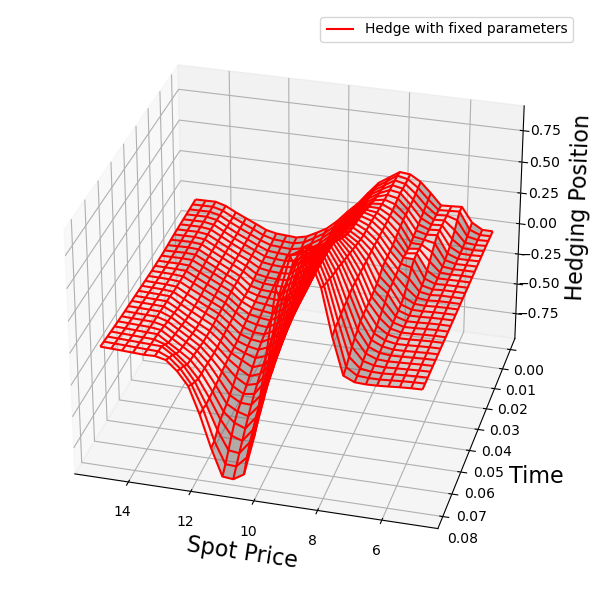

In [12]:
nr_discrete_points = 30 # Number of discrete points for the grid
# Create list of times and values
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
# Empty grid
grid_fix = np.zeros((nr_discrete_points,nr_discrete_points))
#grid_Delta_hedge = np.zeros((nr_discrete_points,nr_discrete_points))
# Fill the grid with the values of the trained hedge
for i in range(len(times)):
    for j in range(len(values)):
        grid_fix[i,j] = hedge_fix([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        #grid_Delta_hedge[i,j] = BS_Delta(0.5,0,values[j],T-times[i],x_0)

# 3D PLOT
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.plot_wireframe(X, Y , grid_Delta_hedge,color = "darkred",label = "Delta-Hedge")
ax.plot_surface(X, Y , grid_fix,color = "mistyrose",alpha = 0.5)
ax.plot_wireframe(X, Y , grid_fix,color = "red",label = "Hedge with fixed parameters")

ax.view_init(30, 105)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
plt.legend()
plt.tight_layout()
plt.savefig('eps/fig_butterfly_uncertain_fix.eps', format='eps')
plt.show()

# Comparison with robust strategy

In [13]:
style.use('ggplot')
BATCH_SIZE = 50000 # Nr of Samples for the Histogram
t_k = np.linspace(0,T,n+1)

# The hedge with fix gamma
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated_fix = [hedge_fix([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S_fix = tf.reduce_sum([hedge_evaluated_fix[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch_fix = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

# The hedge for the model with uncertainty
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)]) 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\julia\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


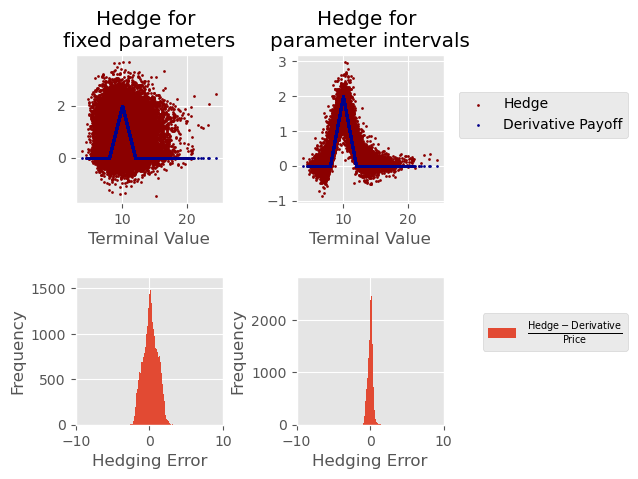

In [21]:
style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5,wspace = 0.5,right=0.7)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price_fix + delta_S_fix,(BATCH_SIZE,1)),
            color = "darkred",label = "Hedge",s=2)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative Payoff",s=2)
axs[0,0].set_xlabel("Terminal Value")
axs[0,0].set_title("Hedge for \nfixed parameters")
axs[0,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "darkred",label = "Hedge",s=2)
axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative",s=2)
axs[0,1].set_xlabel("Terminal Value")
axs[0,1].set_title("Hedge for \nparameter intervals")

hedging_error_fix = ((price_fix + delta_S_fix) - derivative_on_batch).numpy()
axs[1,0].hist(hedging_error_fix,100,label = r"$\frac{\mathrm{Hedge}-\mathrm{Derivative}}{\mathrm{Price}}$")
axs[1,0].set_ylabel("Frequency")
axs[1,0].set_xlim([-10,10])
axs[1,0].set_xlabel("Hedging Error")
axs[1,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

hedging_error = ((price + delta_S) - derivative_on_batch).numpy()
axs[1,1].hist(hedging_error,100)
axs[1,1].set_xlabel("Hedging Error")
axs[1,1].set_xlim([-10,10])
axs[1,1].set_ylabel("Frequency")
fig.savefig('eps/fig_butterfly_example_hedge_error.eps', format='eps')
fig.show()

Adjusted Histogram: Difference between hedging errors

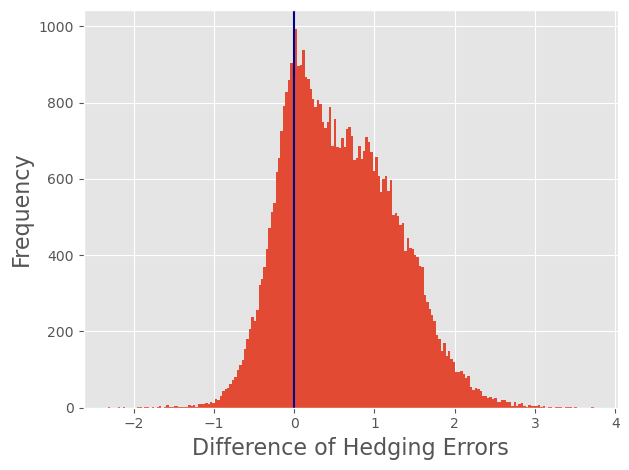

In [24]:
hedging_difference = np.abs(hedging_error_fix)/price_fix - np.abs(hedging_error)/price
plt.hist(hedging_difference,200)
plt.axvline(x=0,color="darkblue")
#plt.xlim([-2,2])
plt.xlabel("Difference of Hedging Errors", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
#plt.title("Difference of Hedging Errors", fontsize=16)
plt.tight_layout()
plt.savefig('eps/fig_histogram_butterfly_difference.eps', format='eps')
plt.show()

## Statistics on Hedging Errors

Hedging Error of the non-robust strategy.

In [16]:
print("Price of the fix hedge: {}".format(price_fix))
print("Price of the robust hedge: {}".format(price))

Price of the fix hedge: 0.8977078795433044
Price of the robust hedge: 0.7616782784461975


### Absolute Error

Hedging Error of the fix strategy.

In [17]:
pd.DataFrame(np.abs(hedging_error_fix)).describe()

,0
count,50000.000000
mean,0.814976
std,0.587897
min,0.000056
25%,0.306572
50%,0.715275
75%,1.253870
max,3.351657


Hedging Error of the robust strategy.

In [18]:
pd.DataFrame(np.abs(hedging_error)).describe()

,0
count,5.000000e+04
mean,2.535498e-01
std,2.017650e-01
min,5.960464e-07
25%,9.838213e-02
50%,2.078586e-01
75%,3.604916e-01
max,2.036920e+00


### Relative Error

In [19]:
pd.DataFrame(np.abs(hedging_error_fix)/price_fix).describe()

,0
count,50000.000000
mean,0.907841
std,0.654887
min,0.000062
25%,0.341505
50%,0.796779
75%,1.396746
max,3.733572


In [20]:
pd.DataFrame(np.abs(hedging_error)/price).describe()

,0
count,5.000000e+04
mean,3.328831e-01
std,2.648953e-01
min,7.825436e-07
25%,1.291649e-01
50%,2.728955e-01
75%,4.732860e-01
max,2.674252e+00
